<h1><center>In depth data analysis of football (soccer) players</center></h1>
<h4><center> By Ali Paracha </center> </h4>

---

# Overview

1. Introduction 
2. Necessary Modules/Libraries
3. Data Pre-processing      
    * 3.1 Cleaning the Data   
    * 3.2 Removing Outliers     
    * 3.3 Distribution of Data
4. Data Visualization and Analysis     
    * 4.1 Preferred Foot     
    * 4.2 Preferred Position     
    * 4.3 a) Variation in Skill Move Rating by Position     
    * 4.3 b) Variation in Skill Move Rating by Nationality     
    * 4.3 c) Variation in Skill Move Rating by Club     
    * 4.5 a) Variation in Free Kick Taking ability by Position    
    * 4.5 b) Variation in Free Kick Taking ability by Country    
    * 4.5 c) Variation in Free Kick Taking ability by Club    
    * 4.5 d) Best Free Kick Takers in the world.    
    * 4.6 a) Variation in Passing Ability by Country     
    * 4.6 b) Variation in Passing Ability by Club     
    * 4.6 c) Best Passers in the World     
    * 4.7 a) Vartion in Speed by Nationality    
    * 4.7 b) Vartion in Speed by Club     
    * 4.7 c) Fastest Players in the world   
    * 4.8 Variation in Jersey Number by Position    
    * 4.9 a) Variation in Strength by Position     
    * 4.9 b) Variation in Strength by Nationality     
    * 4.9 c) Variation in Strength by Club     
    * 4.9 d) Strongest Players in the world     
    * 4.10 Most Famous Players in the world     
    * 4.11 a) How Market Value is effected by Position, Age and Overall    
    * 4.11 b) How Wage is effected by Position, Age and Overall     
    * 4.12 a) Variation of Wages in Clubs by Player Overall     
    * 4.12 c) Variation of International Reputation by Club and Overall
5. Correlation    
6. Machine Learning     
	* Splitting the Data      
	* 6.1 LinearRegression       
         a) Predicting Market Value      
         b) Predicting Wage     
	* 6.2 Random Forest Regressor    
      a) Predicting Market Value             
      b) Predicting Wage             
	* 6.3 K-Nearest Neighbors             
      a) Predicting Market Value             
      b) Predicting Wage             
	* 6.4 Decision Tree             
      a) Predicting Market Value             
      b) Predicting Wage             
	* 6.5 Best Models             
7. Summary and Conclusion

## 1. Introduction

In this tutorial I will first perform an exploratory data analysis on football players, and then use machine learning algorithms to predict different features related to the players. 

The goal of this tutorial is to:
1. Answer interesting queries, like how skill move ratings of players differ by teams.
2. Make useful predictions, such as preciting the market value of a player based off of their overall.

Throughout this kernel I will make use of features such as age, stats (for example shooting, passing etc.), nationality and other subjective ones like, weak foot rating to analyse players.

This analysis will be done through EA Sports' [FIFA 2019 dataset](https://www.kaggle.com/karangadiya/fifa19). This is an extensive dataset which contains entries for almost all professional players in the worlds biggest leagues. It includes features such as players' age, ratings, position, nationality etc. An in-depth description of all the features in the dataset can be found in the link above. Some features whose descrption I deem vague will be explained in this tutorial before they are used.

*Note: Some familiarity with python and statistics is expected. If you are just starting out on Python and comfortable with statistics, I would recommend reading [this](https://www.tutorialspoint.com/python/) before you move forward with this tutorial. Other resources can be found throughout this tutorial to help you with both python and statistics.*

## 2. Necessary Modules/Libraries

I will import all the necessary python modules as we need them, however, there are a few that we will definitely need right off the bat, so let's import them. 

In [1]:
import pandas as pd # Pandas
import matplotlib.pyplot as plt # Matplotlib, for plotting graphs
import numpy as np # NumPy
import math # Math functions
import seaborn as sns # Seaborn library

Refer to [this](https://docs.python.org/3/tutorial/modules.html) website for more information on how python modules work and how you can use them. Information about each of the modules and their functions can be found in the Python Docs. A list of python modules can be found [here](https://docs.python.org/3/py-modindex.html).

## 3. Data Pre-Processing

Now let's read in the data and clean it up. We will be looking for things like outliers, missing values, bad string formats etc. Furthermore, we will also try and gather information by just eyeballing the data. 

In [2]:
# Reading the data into a dataframe
df = pd.read_csv("Fifa19Data.csv")

First let's see the different columns available and decide which ones we will not be using.

In [3]:
list(df.columns)

['Unnamed: 0',
 'ID',
 'Name',
 'Age',
 'Photo',
 'Nationality',
 'Flag',
 'Overall',
 'Potential',
 'Club',
 'Club Logo',
 'Value',
 'Wage',
 'Special',
 'Preferred Foot',
 'International Reputation',
 'Weak Foot',
 'Skill Moves',
 'Work Rate',
 'Body Type',
 'Real Face',
 'Position',
 'Jersey Number',
 'Joined',
 'Loaned From',
 'Contract Valid Until',
 'Height',
 'Weight',
 'LS',
 'ST',
 'RS',
 'LW',
 'LF',
 'CF',
 'RF',
 'RW',
 'LAM',
 'CAM',
 'RAM',
 'LM',
 'LCM',
 'CM',
 'RCM',
 'RM',
 'LWB',
 'LDM',
 'CDM',
 'RDM',
 'RWB',
 'LB',
 'LCB',
 'CB',
 'RCB',
 'RB',
 'Crossing',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'ShotPower',
 'Jumping',
 'Stamina',
 'Strength',
 'LongShots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle',
 'GKDiv

From the above mentioned columns I will not be using the following:
1. 'Unnamed: 0' - does not represent anything in the dataset
2. 'ID' each player has a unique id that was randomly generated, hence it does not give us any useful information
3. 'Photo', 'Flag', 'Club Logo' are all hyperlinks 
4. 'Special' because the data set does not say what this represents, hence I am unsure how to use it
5. 'Body Type' - subjectively defined
6. 'Real Face' - boolean that represents whether face was motion captured for FIFA 2019
7. 'Joined', 'Loaned From', 'Contract Valid Until' - most likely do not a follow any trend 

Now I will drop the above mentioned columns

In [4]:
# axis = 1 represents that we want to drop columns and not rows. If we wanted to drop rows instead we can use axis = 0

# Dropping the mentioned columns from survey dataset
df = df.drop(['Unnamed: 0','ID', 'Photo', 'Flag', 'Club Logo', 'Special', 'Body Type', 
              'Real Face', 'Joined', 'Loaned From', 'Contract Valid Until'], axis = 1)

Let's display some info about the dataset and see if there are any formats we need to change.

Note: LS, ST, RS.... are all positions and the values in these columns represent how a player's overall rating would differ if they played in that position. A full list of FIFA positions can be found [here](https://cdn.mulefactory.com/gallery/uploaded/images/Wiki/FIFA17/formations.png).

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 78 columns):
Name                        18207 non-null object
Age                         18207 non-null int64
Nationality                 18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null object
Position                    18147 non-null object
Jersey Number               18147 non-null float64
Height                      18159 non-null object
Weight                      18159 non-null object
LS                          16122 non-nu

#### 3.1 Cleaning the Data

In [6]:
def checkCond(arr, r):
    for i in arr:
        if r["Position"] == i:
            return True
    return False

In [7]:
for i,r in df.iterrows():
    if(checkCond(['LS','ST','RS','LW','LF','CF','RF','RW', 'LM', 'RM'], r)):
        df.set_value(i,"Position Type", "Attacker")   
    elif (checkCond(['LAM', 'CAM','RAM','LCM','CM','RCM', 'LDM','CDM', 'RDM'], r)):
        df.set_value(i,"Position Type", "Midfielder")
    elif(checkCond(['GK'], r)):
        df.set_value(i,"Position Type", "Keeper")
    else:
        df.set_value(i,"Position Type", "Defender")

In [8]:
df[['Name', 'Position', 'Position Type']][:5]

Name Position Position Type
0           L. Messi       RF      Attacker
1  Cristiano Ronaldo       ST      Attacker
2          Neymar Jr       LW      Attacker
3             De Gea       GK        Keeper
4       K. De Bruyne      RCM    Midfielder

We see that value, wage, height, weight annd all the positions have object types, let us change these to float type so we can accurately analyse them later.

In [9]:
df.head(5)[['Name','Value', 'Wage', 'Height', 'Weight','LS', 'ST', 'RS', 'LW', 'LF', 'CF']]

Name    Value   Wage Height  Weight    LS    ST    RS    LW  \
0           L. Messi  €110.5M  €565K    5'7  159lbs  88+2  88+2  88+2  92+2   
1  Cristiano Ronaldo     €77M  €405K    6'2  183lbs  91+3  91+3  91+3  89+3   
2          Neymar Jr  €118.5M  €290K    5'9  150lbs  84+3  84+3  84+3  89+3   
3             De Gea     €72M  €260K    6'4  168lbs   NaN   NaN   NaN   NaN   
4       K. De Bruyne    €102M  €355K   5'11  154lbs  82+3  82+3  82+3  87+3   

     LF    CF  
0  93+2  93+2  
1  90+3  90+3  
2  89+3  89+3  
3   NaN   NaN  
4  87+3  87+3

Value is in millions of euros so we will change the value to floats and represent the scale in the column title. We will do the same with the wage column except represent wage in thousands of euros. 

In [10]:
# Replacing Euro and Million/Thousand in Value column, converting remaining string to float.
df['Value'] = [float(i .replace('K', '').replace('€',''))/1000 if "K" in i else 
               float(i.replace('€', '').replace('M', '')) for i in df['Value']]

# Doing the same as above for Wage column
df['Wage'] = [float(i .replace('K', '').replace('€','')) if "K" in i else 
               float(i.replace('€', '').replace('M', ''))*1000 for i in df['Wage']]

# Renaming Value and Wage columns to reflect that value and wage are in millions of euros.
df = df.rename(columns = {'Value':"Value (€ Millions)", "Wage": "Wage (€ Thousands)"})

For the Position columns I will remove the plus sign and add the values up as the plus sign represents the best that player can be in that particular position. Furthermore, I will also remove the NaN and replace it with 0 as NaN is there only for goalkeepers and they can not play in outfield positions.

In [11]:
# Fuunction that takes in an array of positions ad replaces dataframe values in those positions.
def replacePosOveralls(arr):
    for i in arr:
        df[i] = [float(x.split('+')[0]) + float(x.split('+')[1]) if type(x) == str else 0 for x in df[i]]

In [12]:
replacePosOveralls(['LS', 'ST', 'RS', 'LW', 'LF','CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 
                    'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB'])

Now let us change the format of the weight and height columns as well.

In [13]:
# Weight in Pounds
df['Weight'] = [float(i.replace("lbs", '')) if type(i)==str else float('NaN') for i in df['Weight']]
# Converting height to centimetres and then storing it
df['Height'] = [(float(i.split("'")[0])*30.48) + (float(i.split("'")[1])*2.54) if type(i) == str else float('NaN') for i in df['Height']]

df = df.rename(columns = {'Height':"Height (cm)", "Weight": "Weight (Pounds)"})

In [14]:
# Displaying dataframe
df.head(5)[['Name','Value (€ Millions)', "Wage (€ Thousands)", 'Height (cm)', 'Weight (Pounds)','LS', 'ST', 'RS', 'LW', 'LF', 'CF']]

Name  Value (€ Millions)  Wage (€ Thousands)  Height (cm)  \
0           L. Messi               110.5               565.0       170.18   
1  Cristiano Ronaldo                77.0               405.0       187.96   
2          Neymar Jr               118.5               290.0       175.26   
3             De Gea                72.0               260.0       193.04   
4       K. De Bruyne               102.0               355.0       180.34   

   Weight (Pounds)    LS    ST    RS    LW    LF    CF  
0            159.0  90.0  90.0  90.0  94.0  95.0  95.0  
1            183.0  94.0  94.0  94.0  92.0  93.0  93.0  
2            150.0  87.0  87.0  87.0  92.0  92.0  92.0  
3            168.0   0.0   0.0   0.0   0.0   0.0   0.0  
4            154.0  85.0  85.0  85.0  90.0  90.0  90.0

Finally, let's also see which other entries contain missing values. This is necesarry to do because before performing data analysis we need to know which columns contain missing values that can not be used. If we just drop each row with one or missing values entirely we will lose a tremendous amount of data which will in turn lead to our machine learning models losing a tremendous amount of learning potential. So in order to avoid this we will drop each row when need be while performing Machine Learning. 

In [15]:
# Check which columns have null values
df.isnull().any()

Name                        False
Age                         False
Nationality                 False
Overall                     False
Potential                   False
Club                         True
Value (€ Millions)          False
Wage (€ Thousands)          False
Preferred Foot               True
International Reputation     True
Weak Foot                    True
Skill Moves                  True
Work Rate                    True
Position                     True
Jersey Number                True
Height (cm)                  True
Weight (Pounds)              True
LS                          False
ST                          False
RS                          False
LW                          False
LF                          False
CF                          False
RF                          False
RW                          False
LAM                         False
CAM                         False
RAM                         False
LM                          False
LCM           

We see that almost all stats (Finishing, FKAccuracy etc.) contain some missing values, so we will drop these if we use that column later on when visualizing our data. We also see that Preferred Foot, body type and skill moves are missing some entries as well. Since these entries are categorical we will have to check whether we have enough values in each category to reach meaningful conclusions (this should be done for categorical variables even if we do not have missing values).     

#### 3. 2 Removing Outliers

Now we will work on removing outliers.

Let's look at how market value for players changes based off of age. 

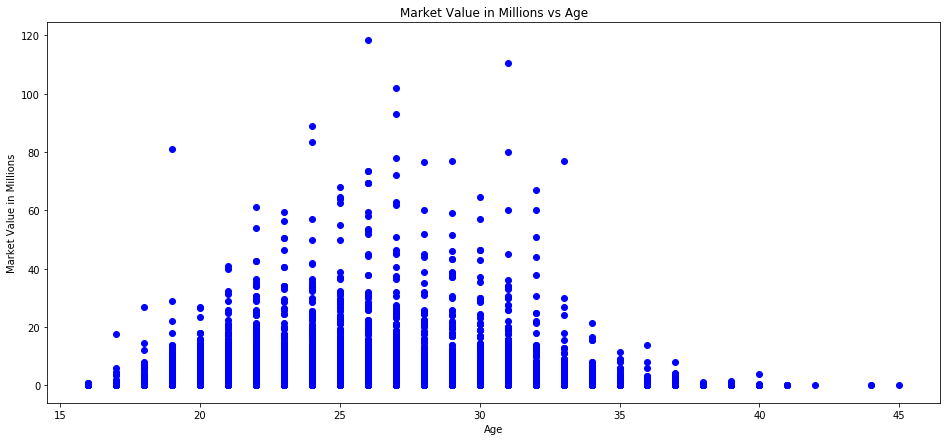

In [16]:
plt.figure(figsize=(16,7))
plt.scatter(df['Age'], df['Value (€ Millions)'], c = "b")
plt.title("Market Value in Millions vs Age")
plt.xlabel("Age")
plt.ylabel("Market Value in Millions")
plt.show()

We see that there are not many apparaent outliers. We also notice that age has an effect on market value, it seems to be that players within the age 24 - 31 have the highest market value. We can also see that Market value has a non linear relationship with age, first as age increases market value increases as well, but after age 30 when age increases market value decereases. 

The only outlier in the above plot is the player whose age is less than 20 but market value is more than 80 million (probably Mbappe) so let us remove this outlier from the dataset.

In [17]:
# Dropping Outlier from dataset
i = df[df['Age'] < 20][df['Value (€ Millions)'] > 75]['Name'].index
df = df.drop(i)

C:\Users\Paracha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Now let us look at how market value differs by Overall.

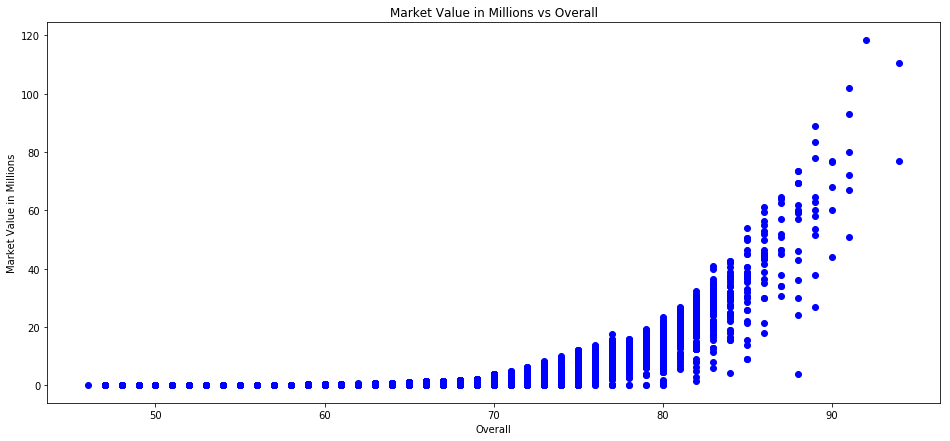

In [18]:
plt.figure(figsize=(16,7))
plt.scatter(df['Overall'], df['Value (€ Millions)'], c ="b")
plt.title("Market Value in Millions vs Overall")
plt.xlabel("Overall")
plt.ylabel("Market Value in Millions")
plt.show()

Only apparent oulier here is the player with an overall just short of 90 but a market valye of less than 10 million (most likely Buffon because of his age) so let's remove this outlier.

In [19]:
# Dropping Outlier from dataset
i = df[df['Overall'] > 85][df['Value (€ Millions)'] < 10]['Name'].index
df = df.drop(i)

C:\Users\Paracha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In the above plot we also see that two different trends are folllowed. Before Overall 70 market value increases very slowly/does not increase at all as the overall increases, but after overall 70 there seems to be a linear relationship between overall and market value, the higher the overall the higher the market value. 

Let's look how skill moves effect market value now.

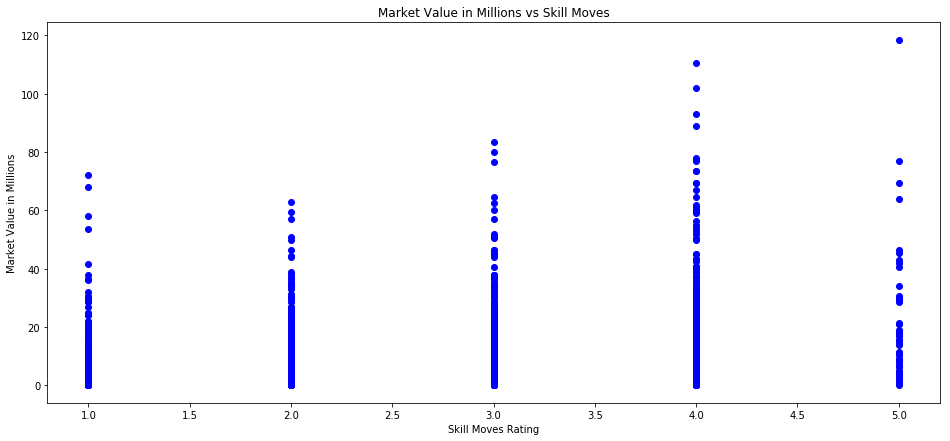

In [20]:
plt.figure(figsize=(16,7))
plt.scatter(df['Skill Moves'], df['Value (€ Millions)'], c ="b")
plt.title("Market Value in Millions vs Skill Moves")
plt.xlabel("Skill Moves Rating")
plt.ylabel("Market Value in Millions")
plt.show()

Skill moves seems to be unrelated to market value, hence we have no outliers. We also have enough entries in each category to meaningfully use skill moves as a feature/predictor for machine learning and a variable in data visualization.

Now I will create age bins and see if we have a similar amount of entries in each bin, if we do not that means that there are a very few professional players with that age and hence their stats are not representative of the entire population and can be removed. 

In [21]:
# Creating age bins
df['Age Bins'] = pd.cut(df['Age'], 5)

In [22]:
# Function that returns counts and possible values of the variable var in the dataframe data
def indValues(data, var):
 return data[var].value_counts().index.tolist(), data[var].value_counts()

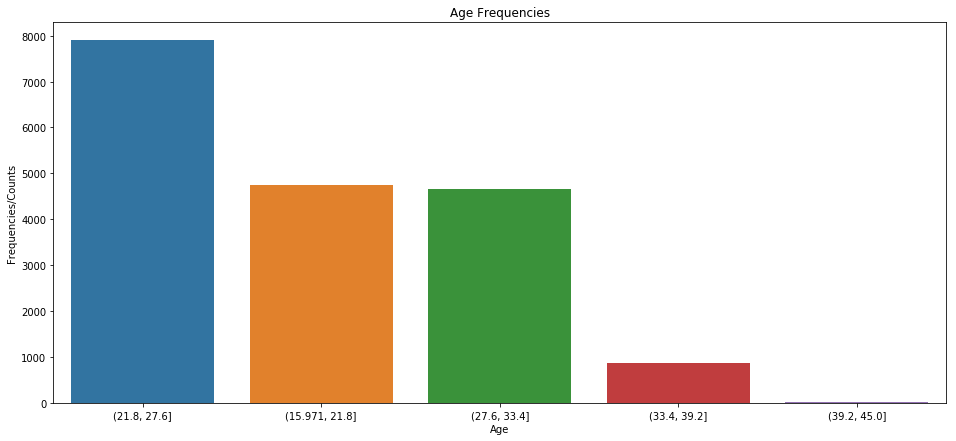

In [23]:
data = indValues(df, "Age Bins")
plt.figure(figsize=(16,7))
sns.barplot(data[0], data[1])
plt.xlabel("Age")
plt.ylabel("Frequencies/Counts")
plt.title("Age Frequencies")
plt.show()

We see that the dataset contains very few entries for ages greater than or equal to 39.2, so let us remove all players with an age of 39 and greater. 

In [24]:
# Dropping all player with age greather than or equal to 37
df = df[df['Age'] < 37]

### 3.3 Distribution of Data

Let's move on to seeing how our data is distributed. 

We want the data to be normally distributed (bell shape), because the more normal it is the more representative the data is of the entire population. 

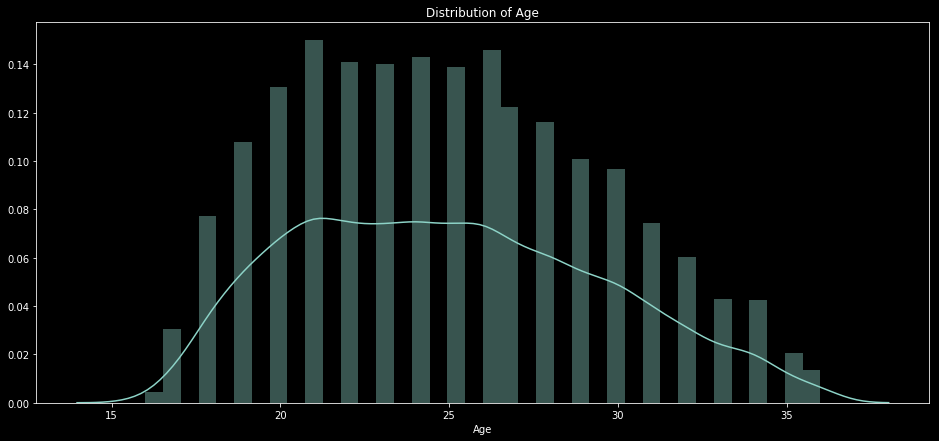

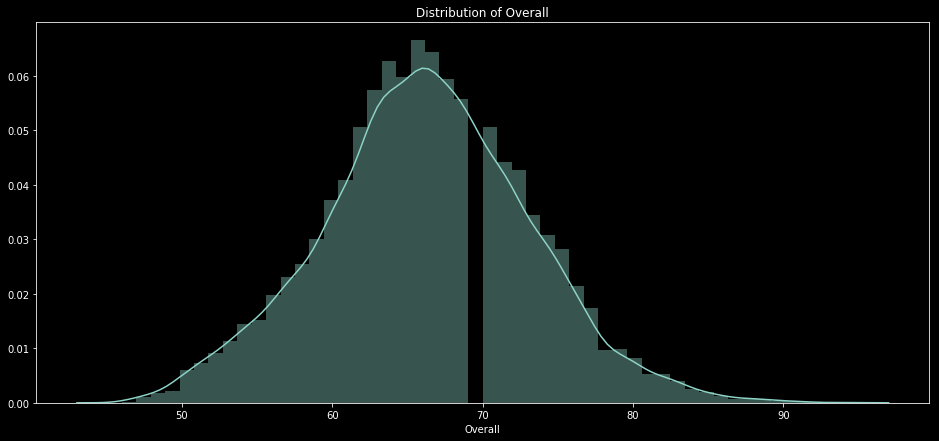

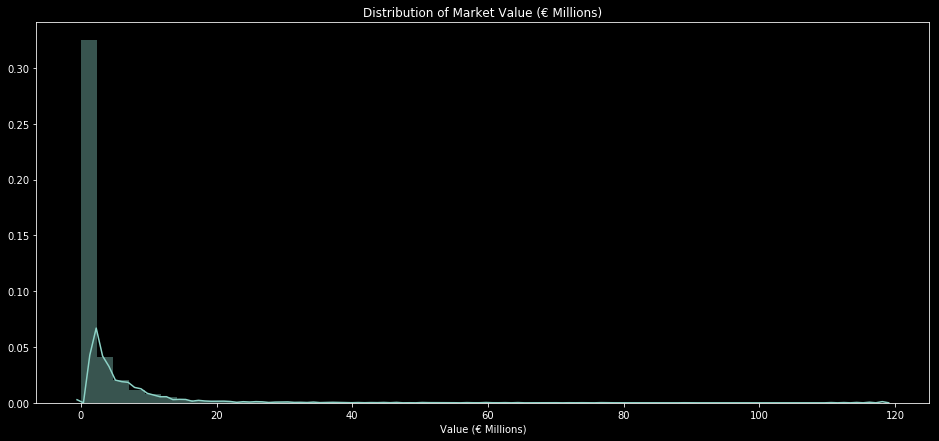

In [25]:
plt.style.use('dark_background') # Give plots a black backroung

plt.figure(figsize=(16,7)) # Set figure size
sns.distplot(df.dropna(subset=['Age'])['Age']) # Display distribution of Age after dropping all null/missing values
plt.title("Distribution of Age") # Give Plot a Title
plt.xlabel("Age") # Label the x-axis
plt.show()

plt.figure(figsize=(16,7))
sns.distplot(df.dropna(subset=['Overall'])['Overall'])
plt.title("Distribution of Overall")
plt.xlabel("Overall")
plt.show()

plt.figure(figsize=(16,7))
sns.distplot(df.dropna(subset=['Value (€ Millions)'])['Value (€ Millions)'])
plt.title("Distribution of Market Value (€ Millions)")
plt.xlabel("Value (€ Millions)")
plt.show()

We see that both Age and Overall are normally distributed. However, market value is not. This is expected because market value differs by both overall, age, skill moves and other features and there are relatively only few players who have a high market value but there are many more less skilled players who have a smaller one, hence we see that the graph for market value is right skewed.

## 4. Data Visualization and Analysis

We will visualize and analyze data using different stats and variables from the dataframe in this part.    

Throughout the tutorial we will be grouping by club and/or nation, however, since there are too many different values for clubs and nations in the dataframe I will only use the top 11 clubs in the world (According to [Football Database](https://footballdatabase.com/ranking/world/1)) and the top 10 international teams (According to [FIFA World Rankings](https://en.wikipedia.org/wiki/FIFA_World_Rankings)).

In [26]:
# Creating condition variables to choose specific clubs from the dataframe when need be
clubCon1 = df['Club'] == 'Juventus'
clubCon2 = df['Club'] == 'FC Barcelona'
clubCon3 = df['Club'] == 'Manchester City'
clubCon4 = df['Club'] == 'Paris Saint-Germain'
clubCon5 = df['Club'] == 'Liverpool'
clubCon6 = df['Club'] == 'Atlético Madrid'
clubCon7 = df['Club'] == 'Bayern München'
clubCon8 = df['Club'] == 'Tottenham Hotspur'
clubCon9 = df['Club'] == 'Napoli'
clubCon10 = df['Club'] == 'Borussia Dortmund'
clubCon11 = df['Club'] == 'Real Madrid'
# Creating dataframe with only the clubs defined above
df_club = df[clubCon1 | clubCon2 | clubCon3 | clubCon4 | clubCon5 | clubCon6 | 
             clubCon7 | clubCon8 | clubCon9 | clubCon10 | clubCon11] 

In [27]:
# Creating condition variables to choose specific International Teams from the dataframe when need be
intlCon1 = df['Nationality'] == 'Belgium'
intlCon2 = df['Nationality'] == 'France'
intlCon3 = df['Nationality'] == 'Brazil'
intlCon4 = df['Nationality'] == 'Croatia'
intlCon5 = df['Nationality'] == 'England'
intlCon6 = df['Nationality'] == 'Portugal'
intlCon7 = df['Nationality'] == 'Uruguay'
intlCon8 = df['Nationality'] == 'Switzerland'
intlCon9 = df['Nationality'] == 'Spain'
intlCon10 = df['Nationality'] == 'Denmark'
# Creating dataframe with only the international teams defined above
df_intl = df[intlCon1 | intlCon2 | intlCon3 | intlCon4 | intlCon5 | intlCon6 | intlCon7 | intlCon8 | intlCon9 | intlCon10] 

In [28]:
# This function groups the dataframe data first by group1 and then group2 and creates a line graph for the column col 
# in the datframe data
def createGroupedLineGraph(data, group1, group2, col, title):
    fig = plt.figure(figsize=(17,6)) # Set figure size 
    plt.rc('font', size = 15)
    ind = 0 # index to choose different colors from color array
    for key, item in data.groupby(group1): # grouping by group1
        y=[] # values for y axis
        x=[] # values for x axis
        for k,i in item.groupby(group2): # grouping by group 2
            y.append(i[sales]) # appending sum of sales column in dataframe to y values
            x.append(k)  
        plt.plot(x, y, label = key, color = colors[ind]) # Add to plot a new line where the legend label is the name of each of
        # the values we are grouping, and also choose a new color from color array
        ind+=1
    plt.xlabel(group2) # Add xlabel
    plt.ylabel(col) # Add ylabel
    plt.title(title) # Add title
    plt.legend(bbox_to_anchor = (-0.1,1),prop={'size':17}) # Add legend
    plt.show() # display graph

In [29]:
# Set white background
plt.style.use('default')

#### 4.1 Preferred Foot
First off let's see which strong foot most players have.

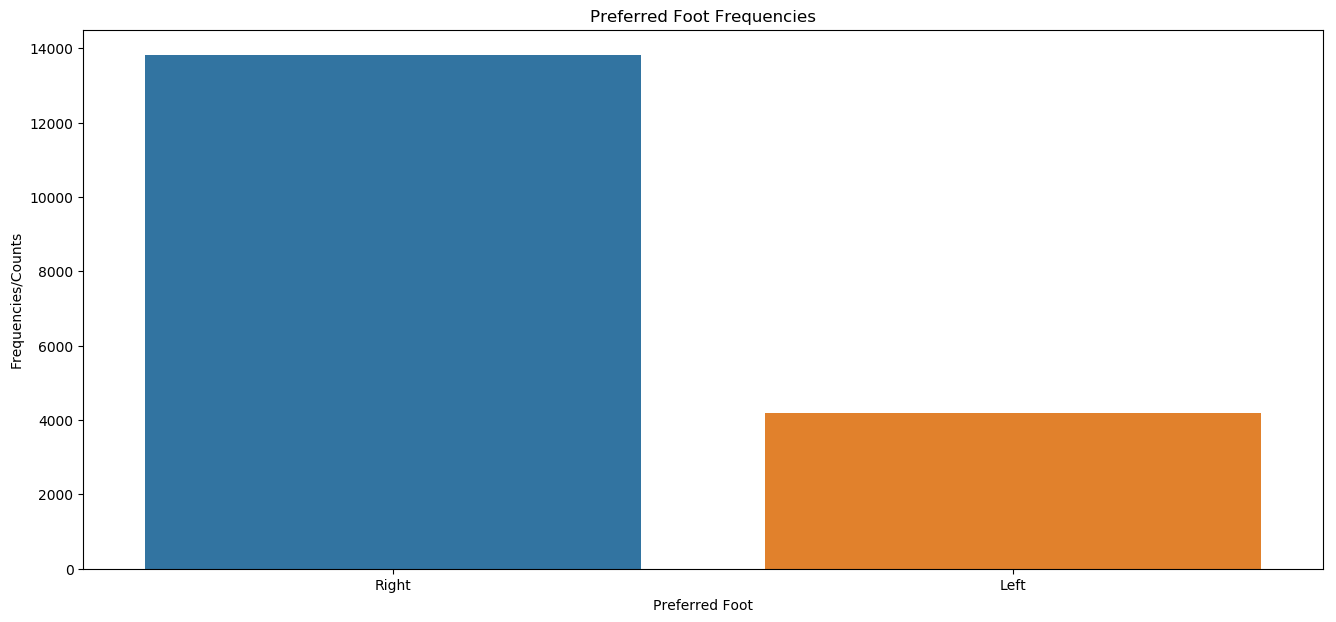

In [30]:
data = indValues(df, "Preferred Foot") # Get counts
plt.figure(figsize=(16, 7)) # figure size
sns.barplot(data[0], data[1]) # plot bar graph
# Give graph labels and titles
plt.xlabel("Preferred Foot")
plt.ylabel("Frequencies/Counts")
plt.title("Preferred Foot Frequencies")
plt.show()

As expected more players have their right foot as their stronger foot. In our dataset more than 75% of players have their right foot as their stronger foot.

#### 4.2 Preferred Position

Next up, let's see how many players are present for each position.

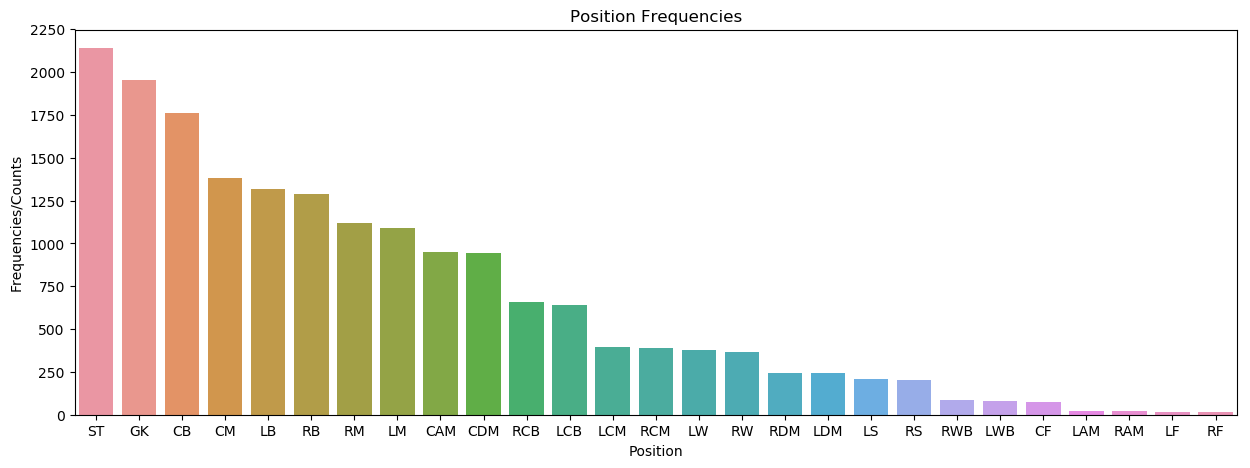

In [31]:
data = indValues(df, "Position") # Get counts
plt.figure(figsize=(15,5)) # figure size
sns.barplot(data[0], data[1]) # plot bar graph
# Give graph labels and titles
plt.xlabel("Position")
plt.ylabel("Frequencies/Counts")
plt.title("Position Frequencies")
plt.show()

Interestingly, we see that according to our dataset, most professional players in the world prefer playing as a striker (more than 2000 players). Furthermore, players' most preferred position after striker is playing as a goalkeeper and then a Center Back, which is rather surprising. 

Next up I will analyze multiple stats based off of position, nationality and club. Additionally, I will also display the best players in the world with the stat that is being analyzed. Below Are a few functions that I have written that will make the process of displaying data easier. 

In [32]:
# Creates Violin Plot with x values (column name defined by x) and y values (column name defined by y) from dataframe
def plotViolin(dataframe, x, y):
    plt.figure(figsize=(15,5))
    sns.violinplot(dataframe[y], dataframe[x])
    plt.title("Distribution of " + x + " by " + y)
    plt.show()

In [33]:
# Creates Bar graph, that groups the dataframe data by the parameter y, it then takes the median of the top num var values
# and displays the plot 
def plotBar(dataframe, var, y, num = 5):
    x= []
    z= []
    for k, i in dataframe.groupby(y):
        x.append(k)
        z.append(i.sort_values(var, ascending = False)[var][:num].mean())
    
    plt.figure(figsize=(15,5))
    plt.ylabel("Average (mean) " + var + " Rating")
    plt.xlabel(y + "s")
    plt.title("Averge " + var + " rating for " + y + "s")
    sns.barplot(x, z)
    plt.show()

In [34]:
# Creates a bar graph of the percentage of values. This function groups them by the parameter x and finds 
# the percentage of frequencies for each category defined by parameter y. Legend is Displayed with it where location of legend
# on plot is defined by loc parameter. Creates vertical bars if Vertical is true.
def plotCount(dataframe, x, y, legend = False, size = 15, loc = 'upper right', vertical = False, bbox = None):
    plt.figure(figsize=(15,5))
    plt.ylabel("Percentage")
    dataframe = (dataframe.groupby([x])[y] # Group by x and then find perentage of frequencies of column y
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index() # reset index and sort the values
                     .sort_values(x))
    if(vertical):
        sns.barplot(x=y, y="percentage", hue=y, data=dataframe) # display plot vertically
    else:
        sns.barplot(x=x, y="percentage", hue=y, data=dataframe) 
    plt.title(x + " Percentage by " + y)
    if(legend):
        if(bbox == None):
             plt.legend(prop={'size':size}, loc = loc) # add legend with custom location else use default location
        else:
             plt.legend(bbox_to_anchor = bbox, prop={'size':size})
    plt.show()    

In [35]:
# Create Violin and Frequency Percentage Bar Graph by category. Uses the two functions above to display necessary data.
def plotVariations(dataframe, x, y, legend = False, size = 15, loc = 'upper right', bbox = None):
    plotViolin(dataframe, x, y)
    plotCount(dataframe, x, y, legend, size, loc, bbox = bbox)  

In [36]:
# This function plots the top 10 players in database df after sorting them by column, defined by sortby, in descending order. 
# Variation parameter gives entries of different df[variation] value different colors. 
def plotTopPlayers(df, sortby, title, variation = None):
    colors =[]
#     Give different colors to differnt variation values
    for i in df[variation][:10]:
        if(i == "Attacker"): 
            colors.append('r')
        elif(i=="Midfielder"):
            colors.append('g')
        else:
            colors.append('b')
    colors = np.asarray(colors) # Color array to use for colors
    plt.style.use('dark_background') # Give figure black backround
    plt.figure(figsize=(15,5)) # set figure size
    plt.grid(c='b') # Set grid color
    plt.rc('font', size=13) # Set Font Size
    df = df.sort_values(sortby, axis = 0, ascending = False) # Sort Values
    xPoints  = df['Overall'][:10].reset_index(drop = True) # Take top 10 values after sorting and reset index
    yPoints = df['Value (€ Millions)'][:10].reset_index(drop = True)
    names  = df['Name'][:10].reset_index(drop = True) # annotation values for points
    legend  = df['Position Type'][:10].reset_index(drop = True)  # legend values for plot
    plt.scatter(x = xPoints, y = yPoints, label = legend, c = colors) # Create scatter plot 
    for index,name in enumerate(names):
        plt.annotate(name,(xPoints[index],yPoints[index])) # give annotation to points on plot
    plt.title("Best " + title + " in the world") 
    plt.xlabel("Overall")
    plt.ylabel("Market Value (€ Millions)")
    plt.show()

** Note for 4.3:**

I will reach a conclusion for each category based off of three plots: 
1. A violin plot that displays the average of the entire team and shows us the distribution of the statistic in question. This plot is just to see how the entire grouping differs from others. 
2. A count plot that shows us the percentage of entries each grouping has in a specific bin (bins are intervals for the statistic). This plot will show us the potential of each team for the statistic in question. The more entries a group has in the highest rating bin (last bin) the more potential it has to be the best if we rate them by that statistic. Since there can only be 11 outfield players on the pitch at one time and because I have ensured that there will be a decent amount of players in each bin, (ensured by the way I grouped our entries (nation/club/position) and because of the way I created the bins of the statistic in question, so we will atleast 11 entries for each team in each bin which is the maximum number of outfield players so the first team has the potential to be the best if measured by that statistic, if 11 of the players present in that bin play) we can make an informed decision about the potential for each team in the statistic we are looking at. If a team dominates one bin with many entries then they have the potential to be the strongest team if rated by that statistic in question.  
3. A bar graph that shows the average of that statistic for the top x players with that statisitic for each team. The reason I choose 'x' players is because for each stat the number required to measure a team's ability for that stat changes, so for example if we were looking at FKAccuracy and a team had 5 really good players to take free kicks and 10 really bad ones, their average would be low because of the bad ones, however, since usually a team only has the same 3 or 4 players take free kicks, their ability should be much higher because they have 5 good players, which is why the number of entries I will take an average of will differ by stat. So, the higher average a team has the better it is. These will help us decide which team is the best if measured by a specific statistic.

Plots 2 and 3 will help us decide which team is the best when rated by the statistic in question.

#### 4.3 a) Variation in Skill Move Rating by Position

*Note: Skill Moves are defined to be the ability of a player to perform tricks with the ball. They are rated on a scale of 1 to 5 where 5 is the most skillful a player can be.*      


Now let us see the distribution of skill moves across positions and see which position contains the most players with a particular skill rating.   

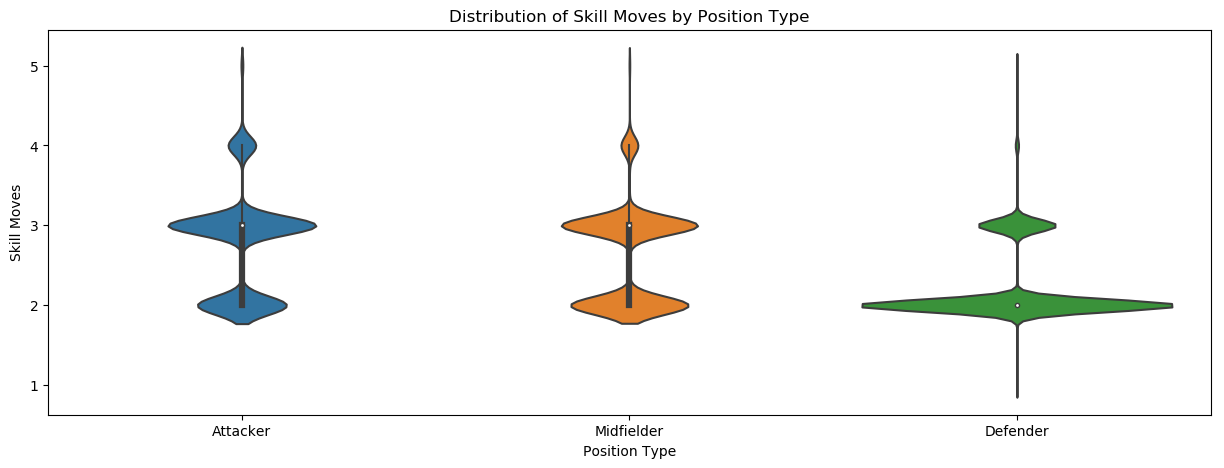

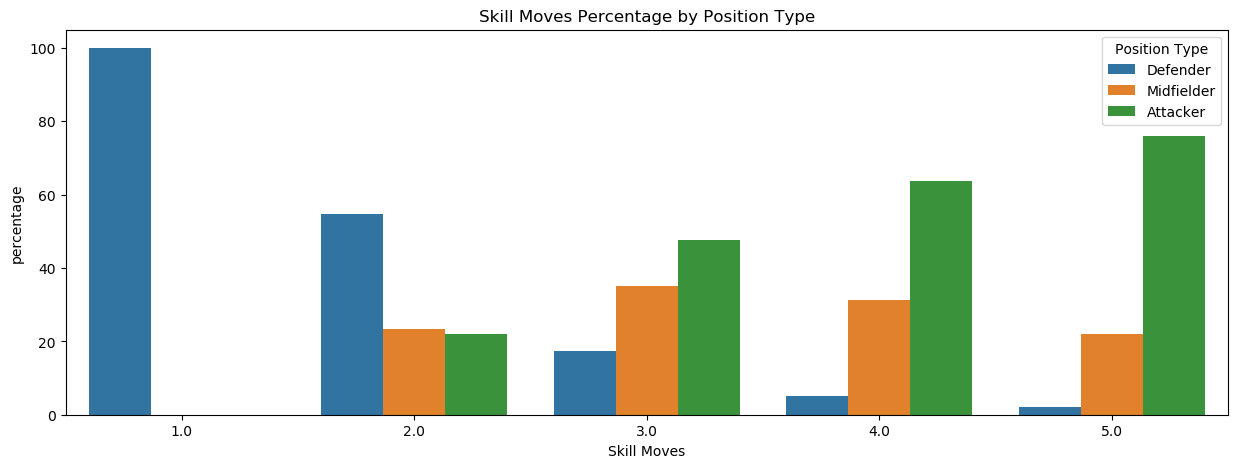

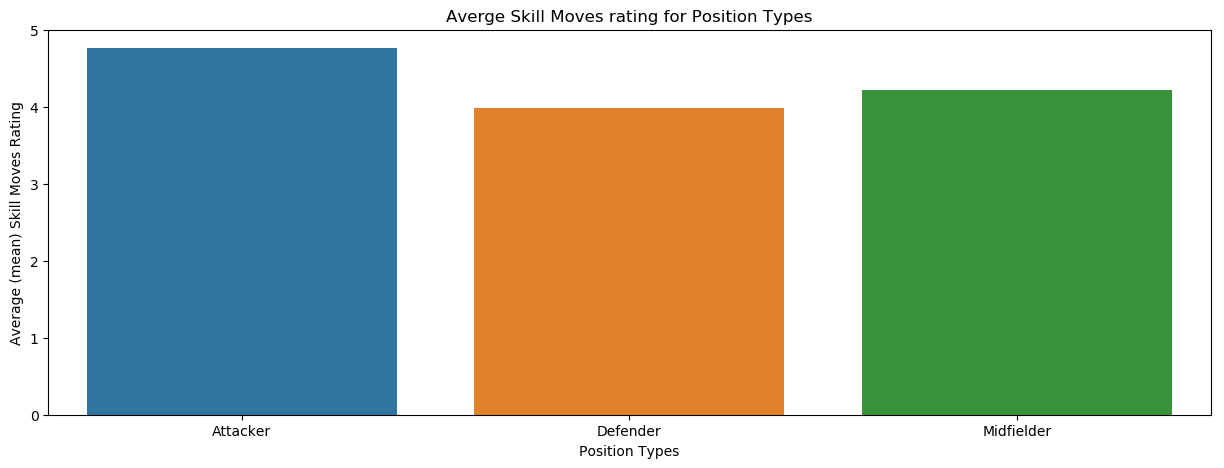

In [37]:
plotVariations(df[df['Position Type'] != "Keeper"], "Skill Moves", "Position Type")
plotBar(df[df['Position Type'] != "Keeper"], "Skill Moves", "Position Type", num = 50)

 Plot 1 Violin:      
    From the first plot (violin) we can see that the mean skill move rating for both attackers and midfielders is 3 stars, where as for defenders it is 2 stars. Most attackers seem to have a rating of 3, hence the mode of the attacking distribution is at three stars. For midfielders the mode is also at three stars but the distribution seems bimodal as there are almost as many 2 star midfielders as well. For the defenders more than 90 percent seems to have a skill move rating of 2 or below, with only a very slect few having a rating of 3 or higher. Both attackers and midfielders contain some entires with a skill move rating of 4, attackers have more though. There also seem to be a few attackers with skill rating of 5 and only a select few midfielders seem to have that rating as well.          
    
 Plot 2 Bar:      
    We see that only defenders have a rating of 1 skill star, they make up hundered percent of the entries with skill rating 1.
    Defenders also seem to be the dominant entry in skill rating 2 covering around 50 percent of those entries, where 
    as there are even number of midfielders and attackers with skill rating 2.
    Attackers are dominant in skill rating 3 being above midfielders by around 15% and defenders around 25%.
    Attackers are extremely dominant in skill ratings 4 and 5, this means that in our dataset the number of players with skill rating greater than or equal to 4 are laregely attackers. Infact more than 60% of players in our datasets with a rating of 4 are attackers and more than 70% of players with a rating of 5 are attackers as well. Hence, we can say that according to our dataset, attackers are more skillful (in terms of skill moves) than both midfielders and defenders.
                                 
 Plot 3: The average skill move ratings of the top 50 players in each category (attacker, midfielder and defender) are displayed in this plot, we can see that attackers on average have a higher skill rating then midfielders and defenders.
    
**Conclusion**: We can say that according to our dataset, attackers are more skillful (in terms of skill moves) than both midfielders and defenders. Defenders are the worst in terms of skill moves.

#### 4.3 b) Variation in Skill Move Rating by Nationality

Same as above but this time we will be looking at the top 10 International Teams as a whole.

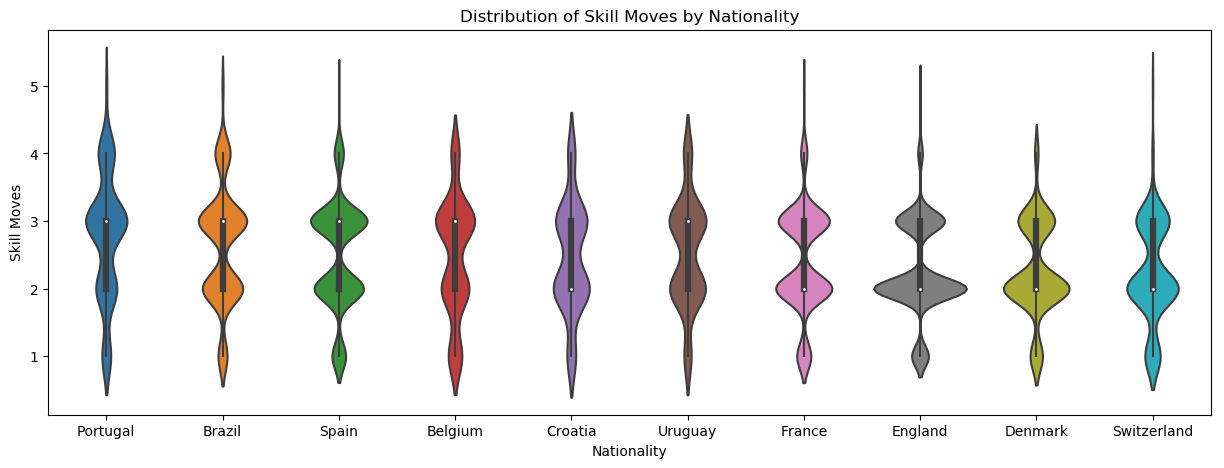

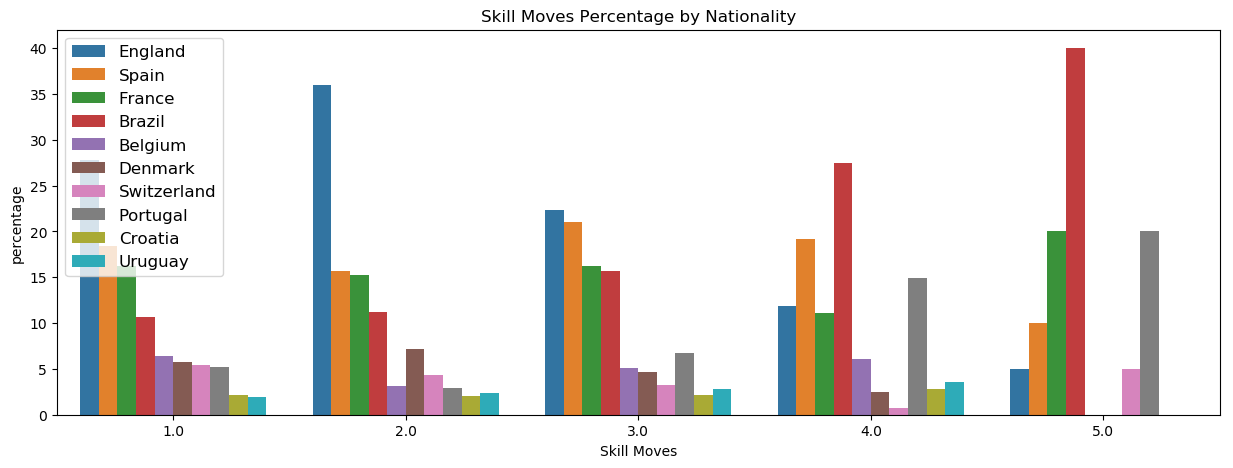

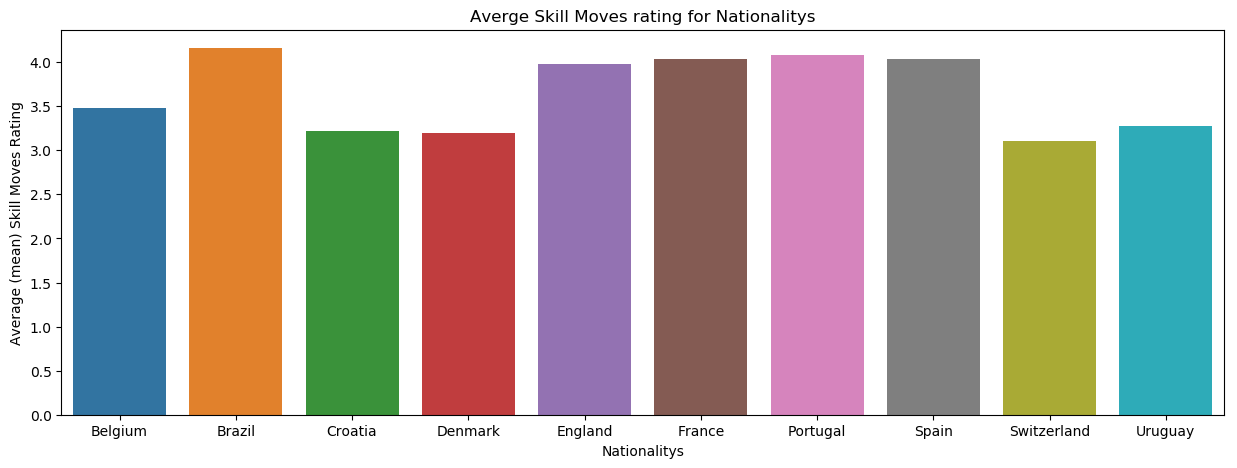

In [38]:
plotVariations(df_intl, "Skill Moves", "Nationality", True, loc = 'upper left', size = 12)
plotBar(df_intl, "Skill Moves", "Nationality", num = 50)

Plot 1 Violin:
    First and foremost we can see that Portugal, Brazil, Spain, Belgium, Uruguay have an average skill move rating of 3. Wheeras the rest have an average rating of 2. Portugal Brazil and Spain have the largest distribution of skilled players, meaning they have many players having skill ratings ranging from one star to five star. Lastly, we can see that France, Switzerland and Brazil have very few players with a rating greater than or equal to 4.    
          
Plot 2 Bar:
    We see that brazil seems to have the most skilled players in both the 4 star and 5 star skill rating categories. More than 35% of players witha  5 star skill rating belong to Brazil. Hence it seems to be the most skilled (in terms of skill moves) International team. Spain beats France in the 4 star category and has more players with skill rating 4 than France, however the opposite is true in the 5 star category. Portugal seems to also be very skillful in both the 4 and 5 star rating category. It is hard to say who the second most skillful team is after Brazil but France, Spain and Portugal are good contenders. Croatia seems to be the least skilled team having very few entries in the 4 star rating category and zero in the five star category. 

Plot 3 Bar: Average skill move rating (of the top 50 players) for brazil is the highest, followed by Portugal, Spain France and then England.  
    
**Conclusion**: Brazil has the most amount of skillful players (in terms of skill moves). It is followed by all of France, Spain and Portugal. Croatia and Denmark seem to have the least amount of skillful players.

#### 4.3 c) Variation in Skill Move Rating by Club

Same as above but this time we will be looking at the top 10 Clubs.

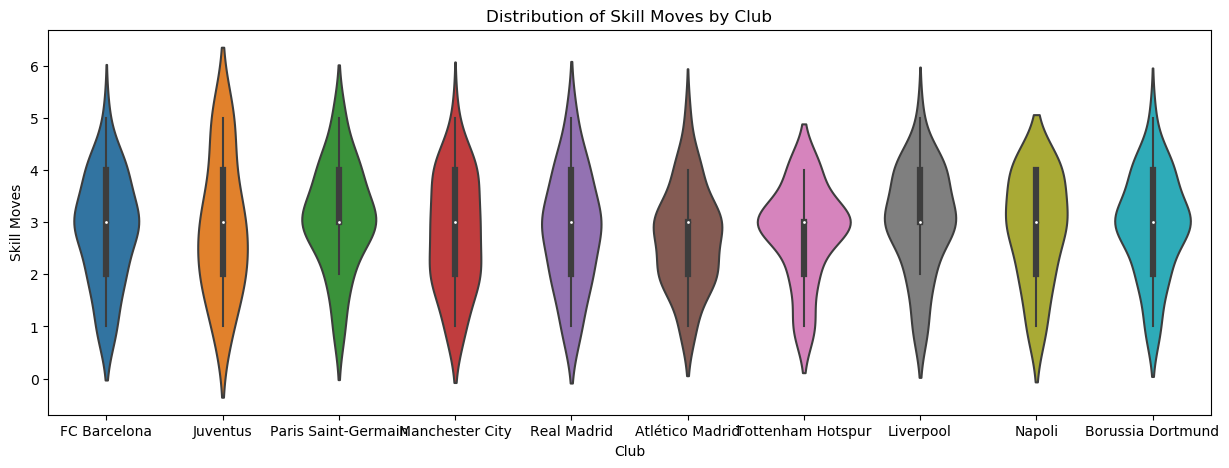

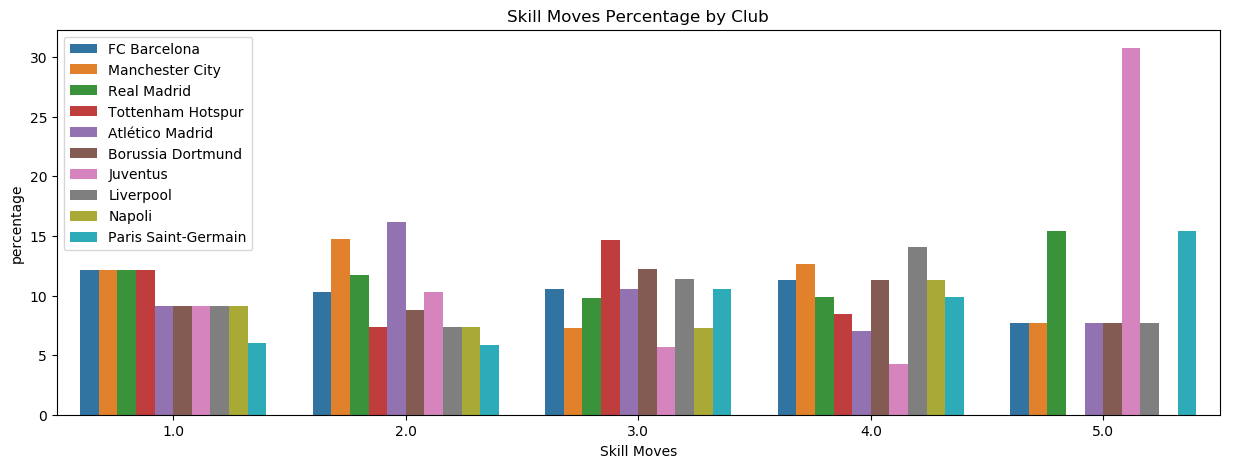

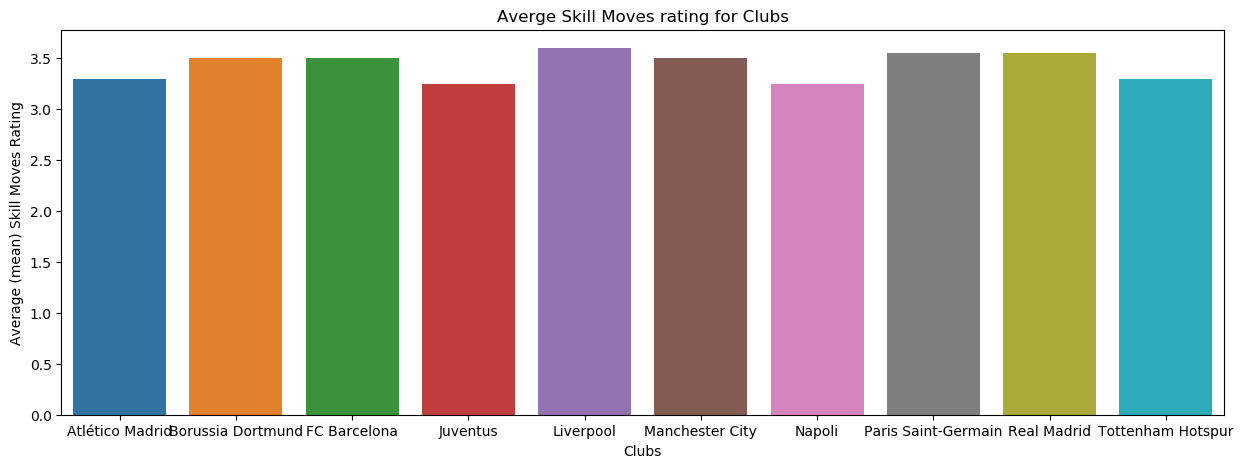

In [39]:
plotVariations(df_club, "Skill Moves", "Club", True, size = 10, loc = 'upper left')
plotBar(df_club, "Skill Moves", "Club", num = 20)

Plot 1 Violin:
    We see that all the teams have an average skill move rating of 3. Although this average is on the lower end of the IQR for PSG and Liverpool and on the higher end for Spurs and Ateltico. The skill move distribution for all teams seems to be evenly distributed. Most of Spurs players have a skill rating of 3.0 and no players for either Spurs or Napoli have a rating greater than 4. Juventus seems to have the most playyers with a skill rating reater than 5.    
           
Plot 2 Bar:
    Juventus has the most players (30%) with a skill level of 5. Juventus is followed by an even number of players from both Real Madrid and PSG (15%) with rating 5. Both Napoli and Spurs have no players with this rating. Furthermore, we see that Liverpool has the most number of players with rating 4, followed by Manchester City which is closely followed by Barcelona, Napoli, PSG to name a few. It is hard to say which one of these teams is most skilled in terms of skill moves as all of them have a similar distribution in the three and four skill rating category and very few values exist in the 5 rating category to make a good conclusion. Liverpool maybe one as it has a good percentage in categories 3 and above. However, we can say that Spurs are the worst in terms of skill moves as they have very few entries in each category.
    
** Conclusion: ** Hard to say which team is the best in terms of skill moves (maybe Liverpool?), it's top 20 players have the highest skill move average than any other team. However, Juventus has the most skilled players in their team with a rating of 5. Spurs are the worst in terms of skill moves.

#### 4.5 a) Variation in Free Kick Taking ability by Position

Now let's look at how Free Kick Taking ability differs by position. I will decide which poition/club/nationality is the best free kick taker by seeing how there free kick taking ability compares to others, the more players they have with a high free kick taking ability the better they are. 

In [40]:
df_intl['FK Bins'] = pd.cut(df_intl["FKAccuracy"], 5)
df_club['FK Bins'] = pd.cut(df_club["FKAccuracy"], 5)

C:\Users\Paracha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Paracha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


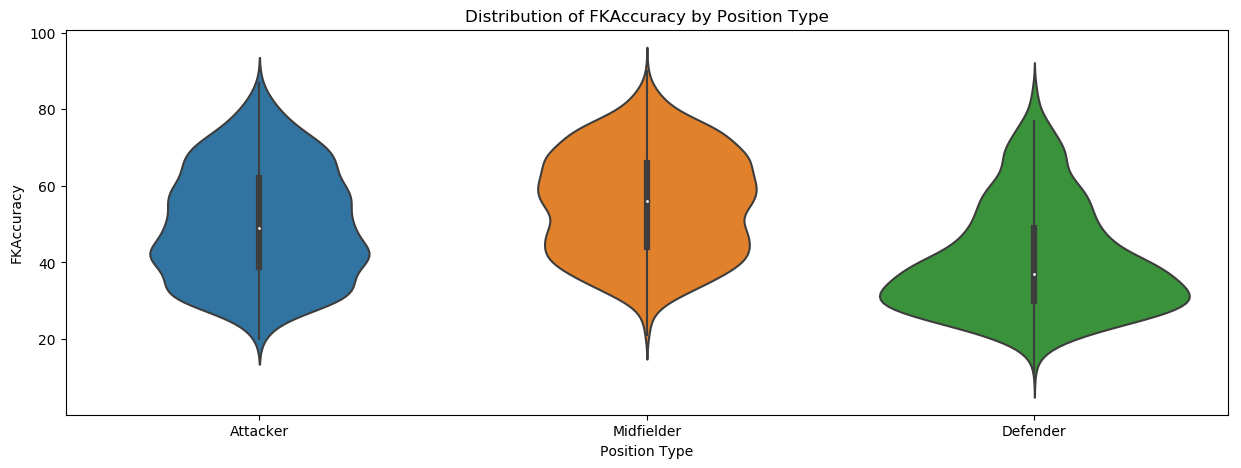

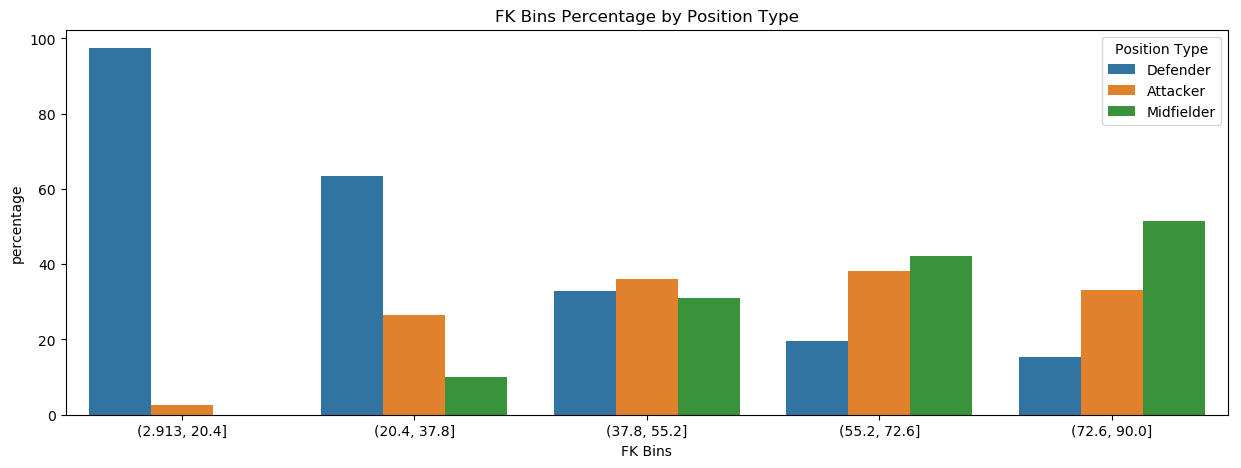

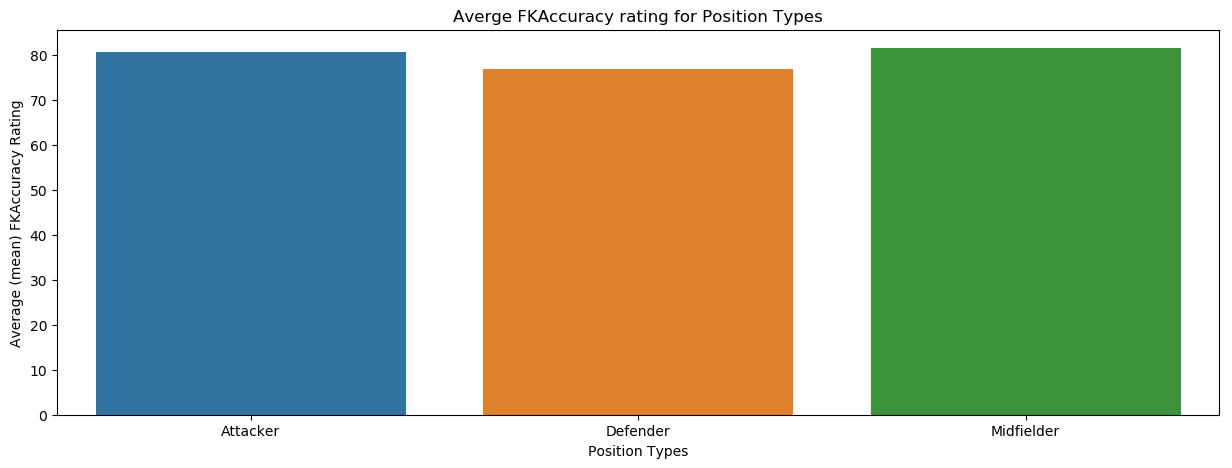

In [41]:
plotViolin(df_intl[df_intl['Position Type'] != "Keeper"], "FKAccuracy", "Position Type")
plotCount(df_intl[df_intl['Position Type'] != "Keeper"], "FK Bins", "Position Type", loc = 'upper right')
plotBar(df_intl[df_intl['Position Type'] != "Keeper"], "FKAccuracy", "Position Type", 50)

**NOTE: The bin (72.6,90] will contain a large amount of players, this applies to other bins in further parts as well. Refer to note for 4.3**

Plot 1: We see that Midifelders have a higher average of free kick accuracy then attackers. We also see that the most of have a FKAccuracy greater than or equal to 60. For defenders the average FK Accuracy is very low (less than 40), hence they are the worst free kick takers position wise.

Plot 2: The fact mentioned above is backed up by this plot. We see that more than 40% of free kick takers who have a free kick accuracy rating greater than 72 are midfielders whereas only 25% of attackers have this rating. Hence this hints that the best free kick takers are midfielders, who are then followed by attackers and finnaly defenders.

Plot 3: We see that amongst the top 50 players of each category (by FKAccuracy), Midfielders have the highest average FKAccuracy.

**Conclusion: ** Midfielders are best free kick takers, with average FKAccuracy more than 60. Strikers are second best kick takers and defenders the last.  

#### 4.5 b) Variation in Free Kick Taking ability by Country

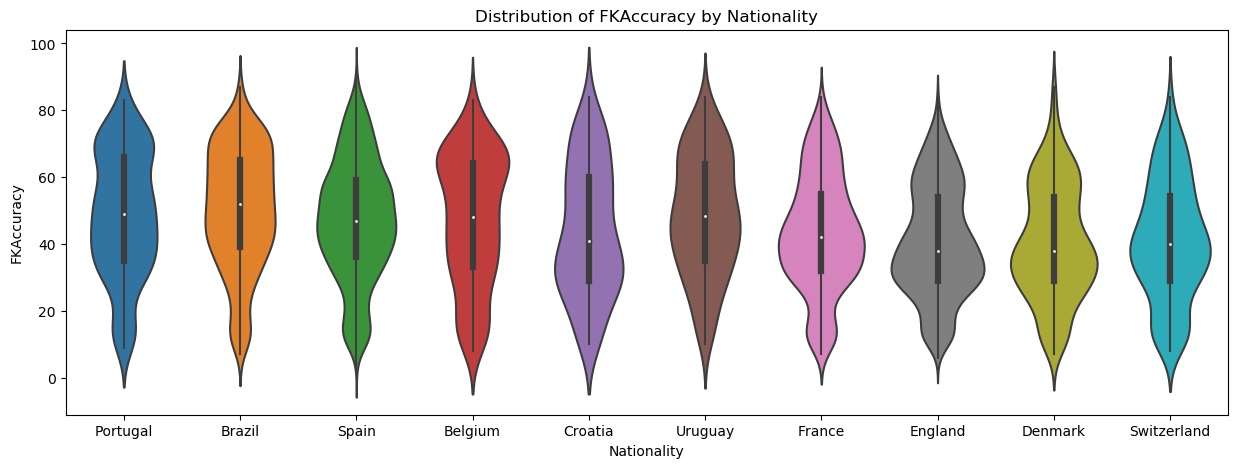

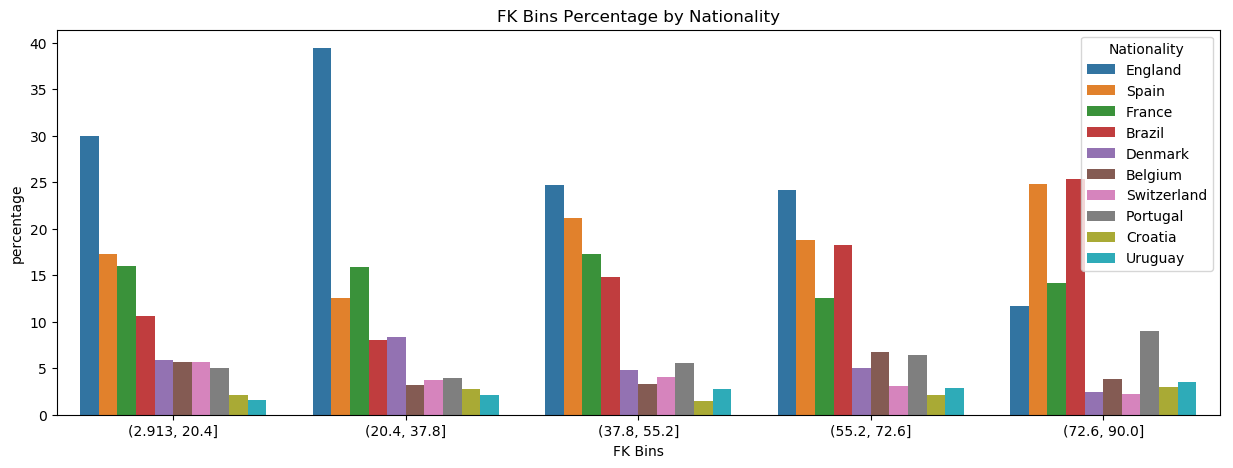

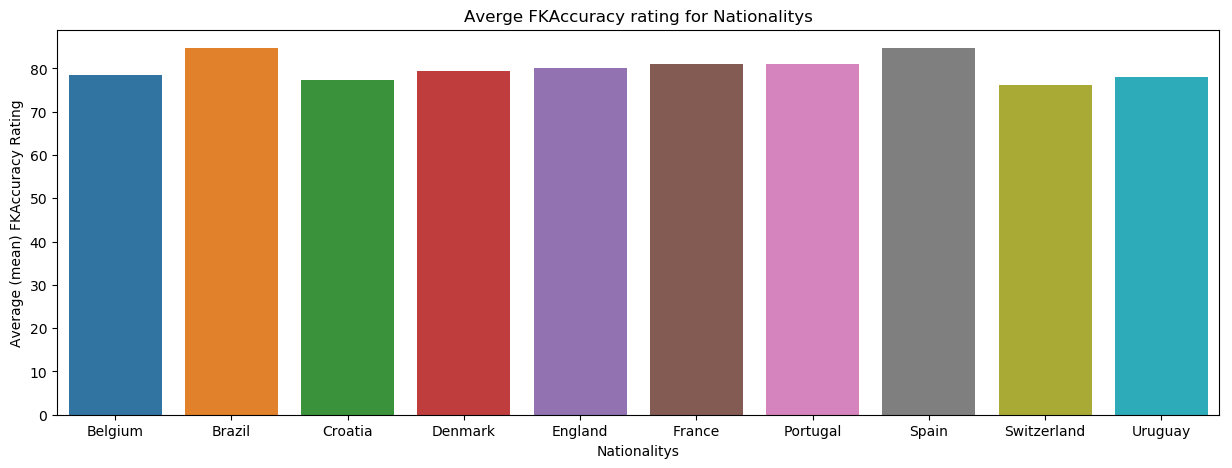

In [42]:
plotViolin(df_intl, "FKAccuracy", "Nationality")
plotCount(df_intl, "FK Bins", "Nationality", loc = 'upper right')
plotBar(df_intl, "FKAccuracy", "Nationality", num = 10)

Plot 1: We see that Brazil has the highes FKAccuracy Mean and that the distributions for FKAccuracy are evenly distributed for each country. We also notice that England has the lowest mean and mode compared to all other national sides.

Plot2: Brazil has the most amount of players with a FKAccuracy greater than 73 (Bin 4), and is closely followed by Spain. More than 50% of free kick takers with an accuracy rating greater than 73 belong to Brazil and Spain. Switzerland, Denmark and Croatia seem to be the worst at freekicks, have less than 5% of players with the above mentioned rating. 

Plot3: The Average free kick accuracy of Brazil's top 10 free kick takers is higher than that of any other nation. Followed by Spain, and then France. 

** Conclusion: **
    Best Free kick taking national side is Brazil followed by Spain and then France. Switzerland, Denmark and Croatia are the worst at freekicks in the top 10 international sides.

#### 4.5 c) Variation in Free Kick Taking ability by Club

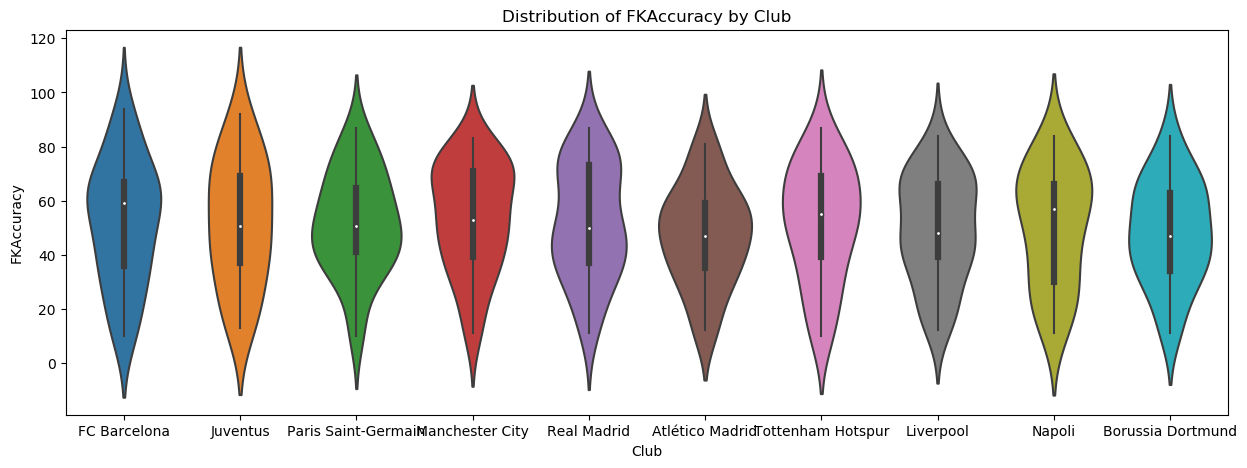

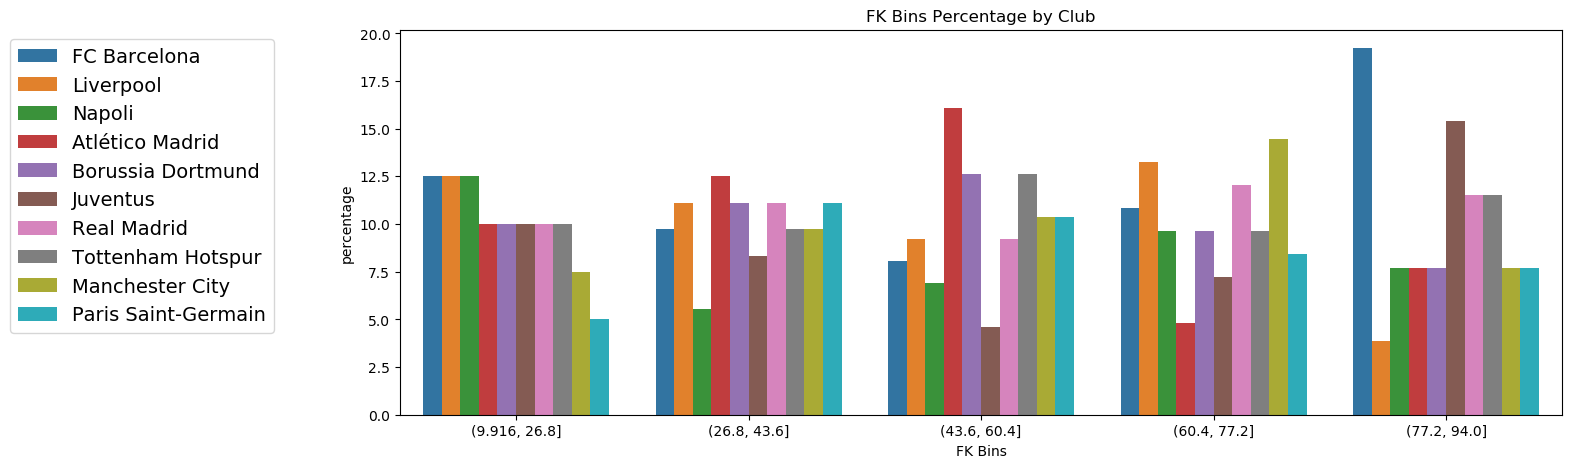

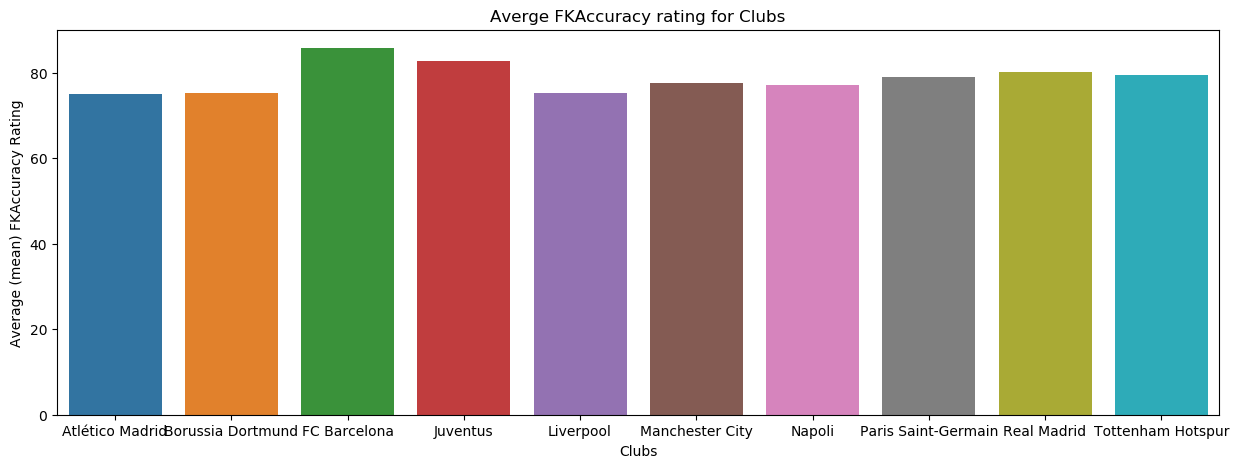

In [43]:
plotViolin(df_club, "FKAccuracy", "Club")
plotCount(df_club, "FK Bins", "Club", loc = 'upper left', size = 14, legend = True, bbox = (-0.1,1))
plotBar(df_club, "FKAccuracy", "Club", num = 5)

Plot 1 Violin: Liverpool, Ataletico Madrid and Borussia Dortmund have the lowest FKAccuracy mean and Atletico Madrid has the lowest highest FKAccuracy value compared to other teams.

Plot 2 Bar: Barcelona is the best Free Kick taking side, it has the most players with accuracy greater than 77. 19% of all players with accuracy greater than 77 belong to Barcelona, Juventus is second with 15%. 

Plot 3: Barcelona's top 5 players have the highest average free kick taking ability than any other team. 

**Conclusion: ** Barcelona has the best free kick taking ability in the worlds top 10 clubs, followed by Juventus. Real Madrid and Spurs are tied for third place.

#### 4.5 d) Best Free Kick Takers in the world.

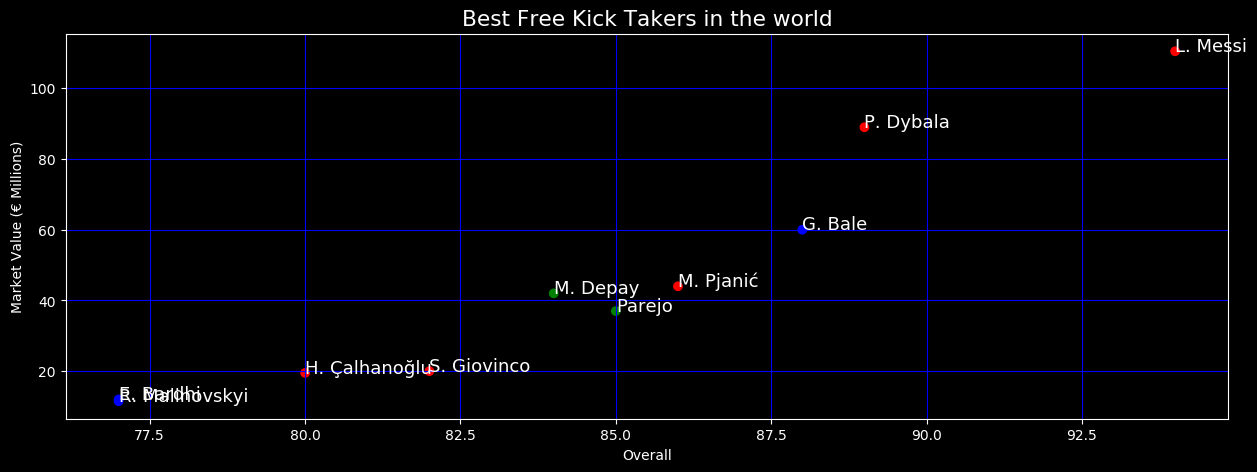

In [44]:
plotTopPlayers(df, "FKAccuracy","Free Kick Takers",  "Position Type")

#### 4.6 a) Variation in Passing Ability by Country

Now let's look at Passing ability. 

In order to remove redundancy, I will just write the conclusions that can be reached from the plots.

In [45]:
df_intl['ShortPassing Bins'] = pd.cut(df_intl["ShortPassing"], 6)
df_club['ShortPassing Bins'] = pd.cut(df_club["ShortPassing"], 6)
df_intl['LongPassing Bins'] = pd.cut(df_intl["LongPassing"], 6)
df_club['LongPassing Bins'] = pd.cut(df_club["LongPassing"], 6)

C:\Users\Paracha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Paracha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Paracha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

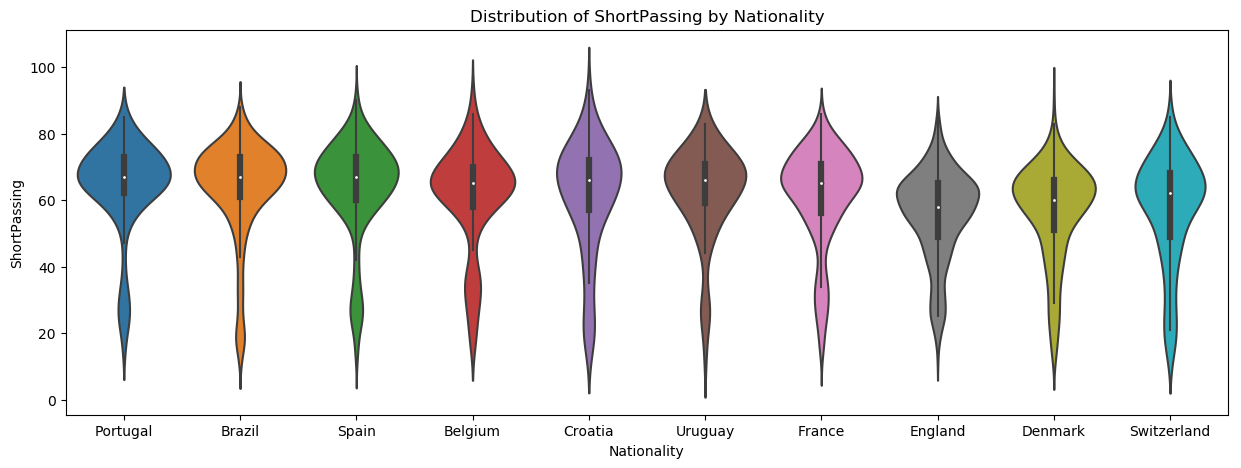

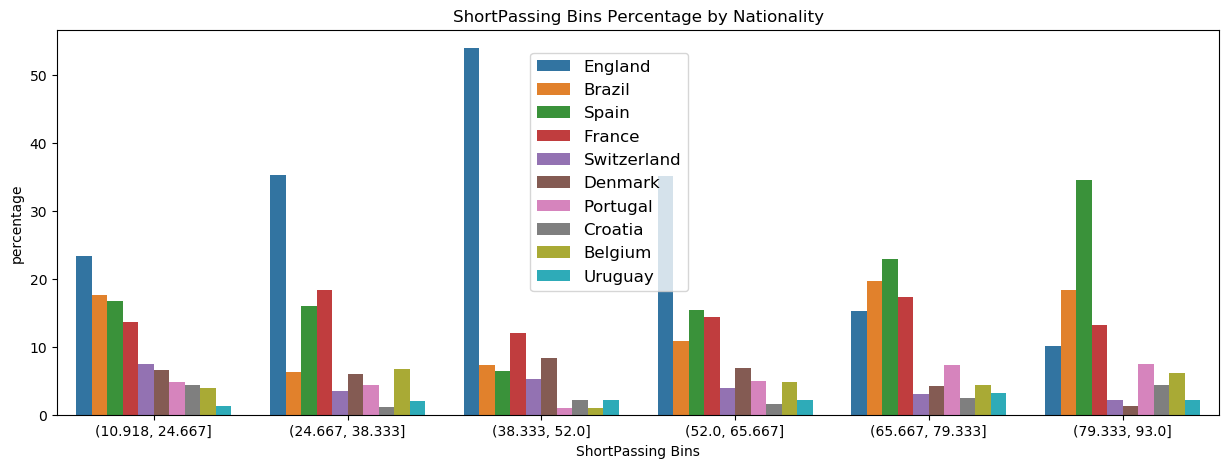

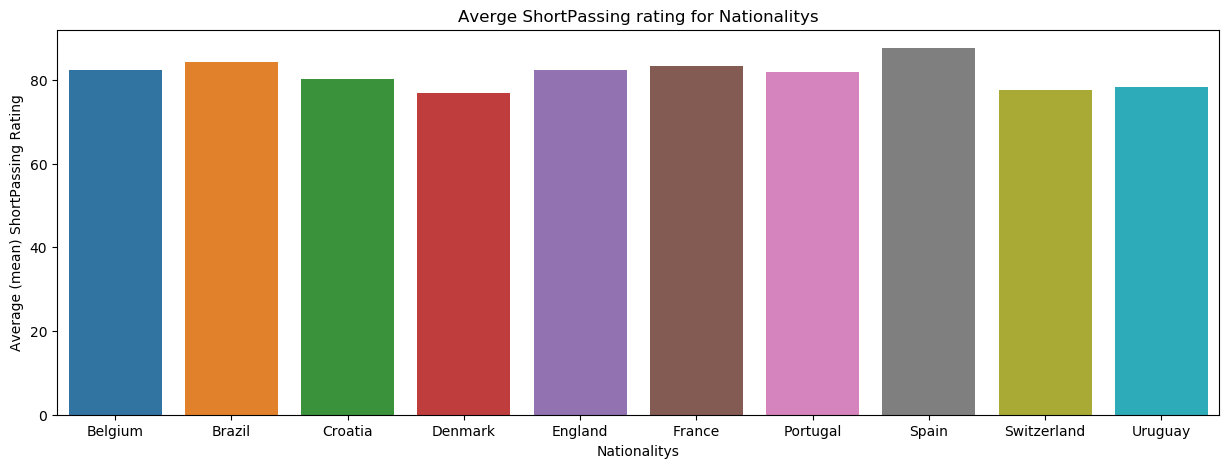

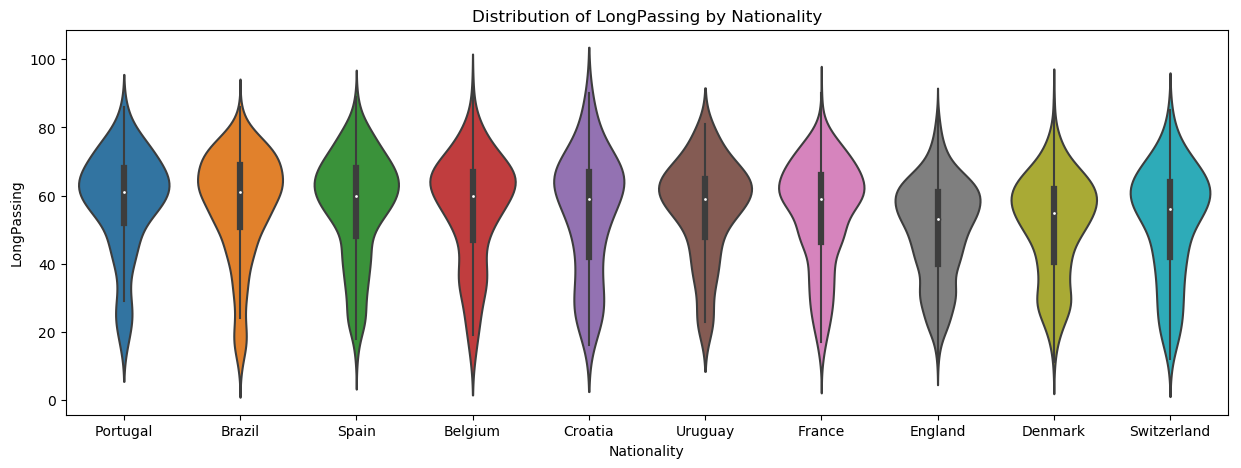

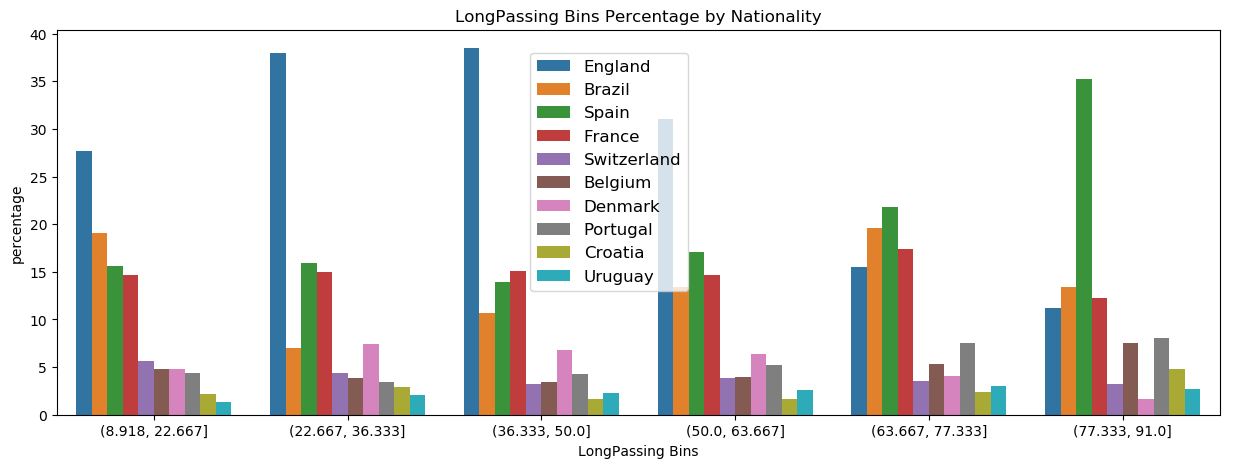

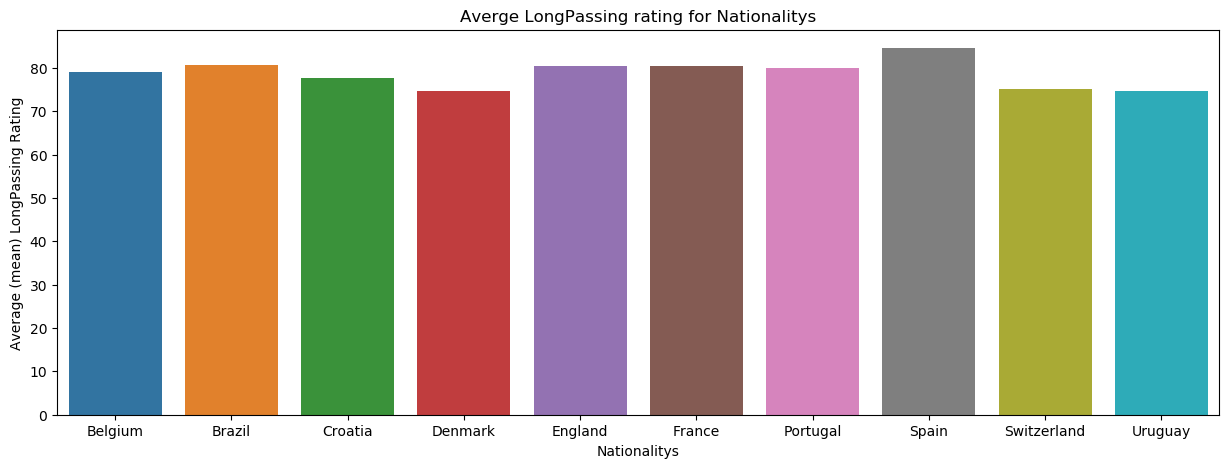

In [46]:
plt.style.use('default')
plotViolin(df_intl, "ShortPassing", "Nationality")
plotCount(df_intl, "ShortPassing Bins", "Nationality", loc = 'center right', size = 12, legend = True, bbox = (0.4, 0.3))
plotBar(df_intl, "ShortPassing", "Nationality", num = 20)
plotViolin(df_intl, "LongPassing", "Nationality")
plotCount(df_intl, "LongPassing Bins", "Nationality", loc = 'center right', size = 12, legend = True, bbox = (0.4, 0.3))
plotBar(df_intl, "LongPassing", "Nationality", num = 20)

** Conclusion: ** Spain has the best passing ability, it has the most amount of best short and long passers. More than 30% of all passers with such attributes play for Spain. Denmark and Switzerland have the worst passing ability in the top 10 sides. Spain's best (top 20) passing ability players have the highest average passing ability (both long and short) in the top 10 sides. Brazil and France are the second best short passing teams, where as england is the second best long passsing teams. Denmark has teh lowest average in both categories. Spains' average short and long passing ability is better than ny other team.

#### 4.6 b) Variation in Passing Ability by Club

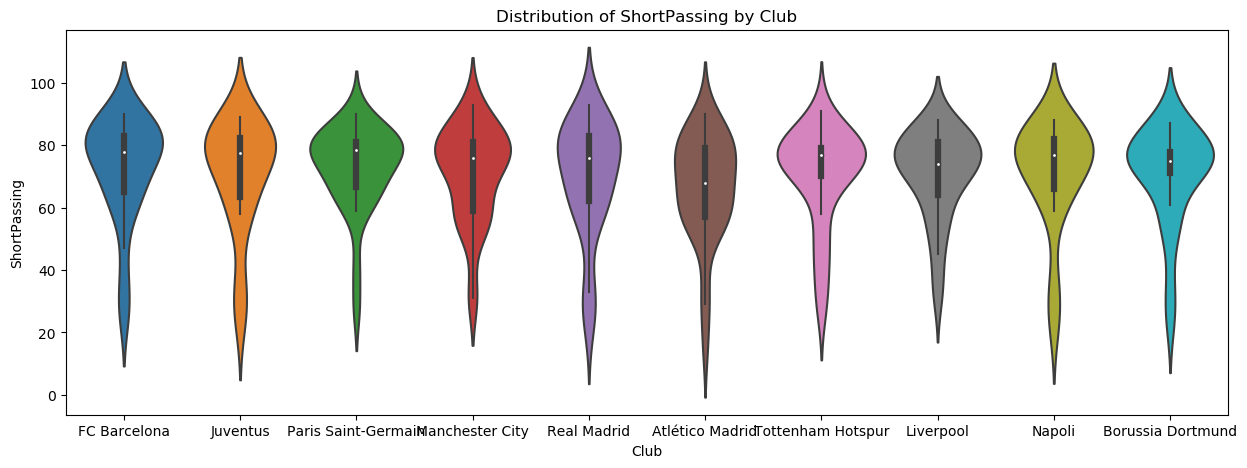

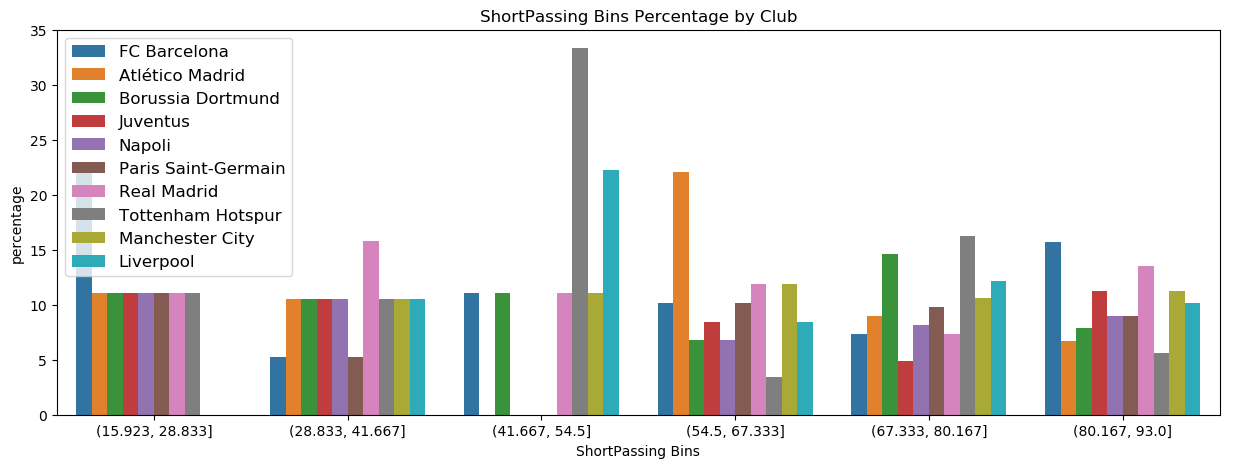

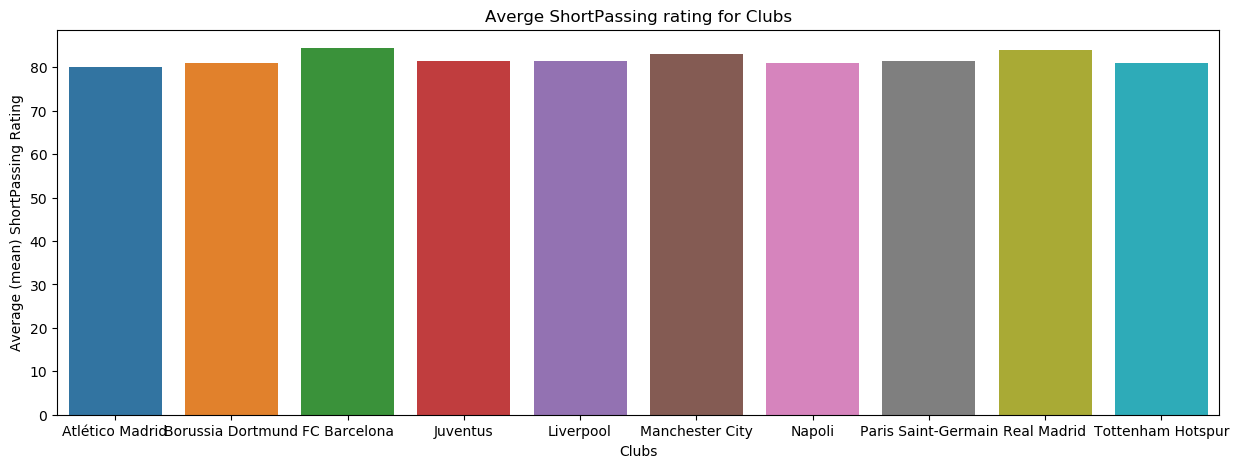

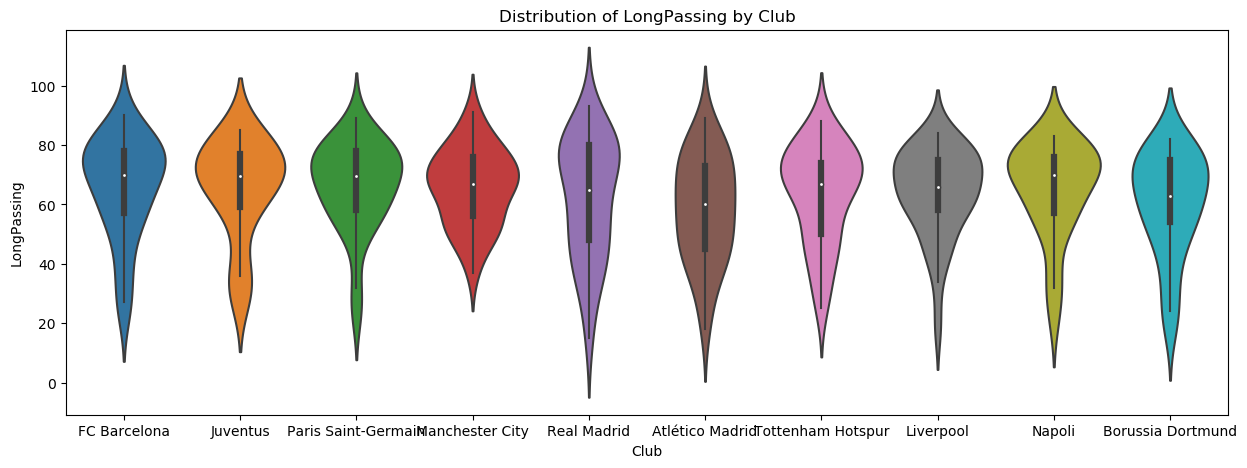

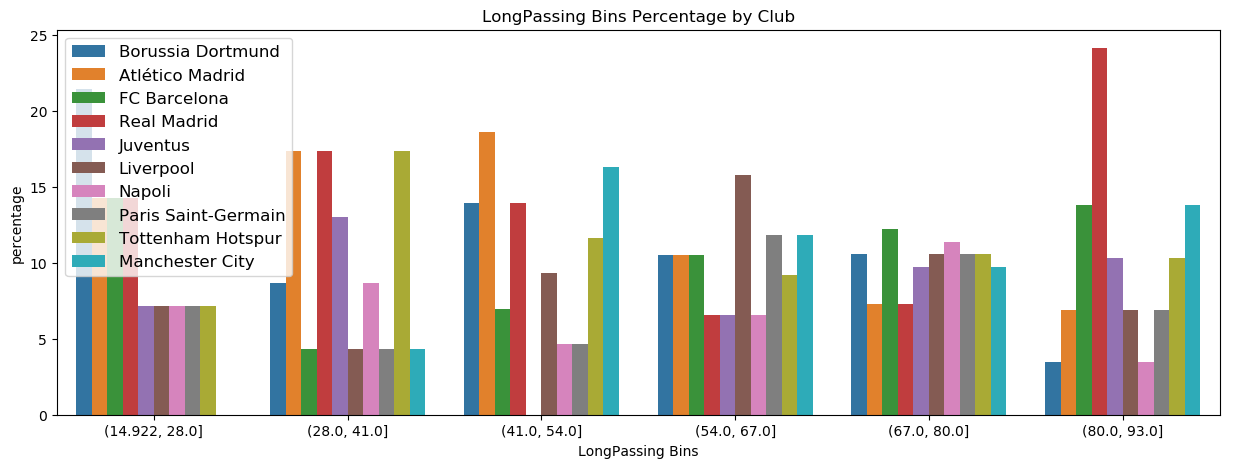

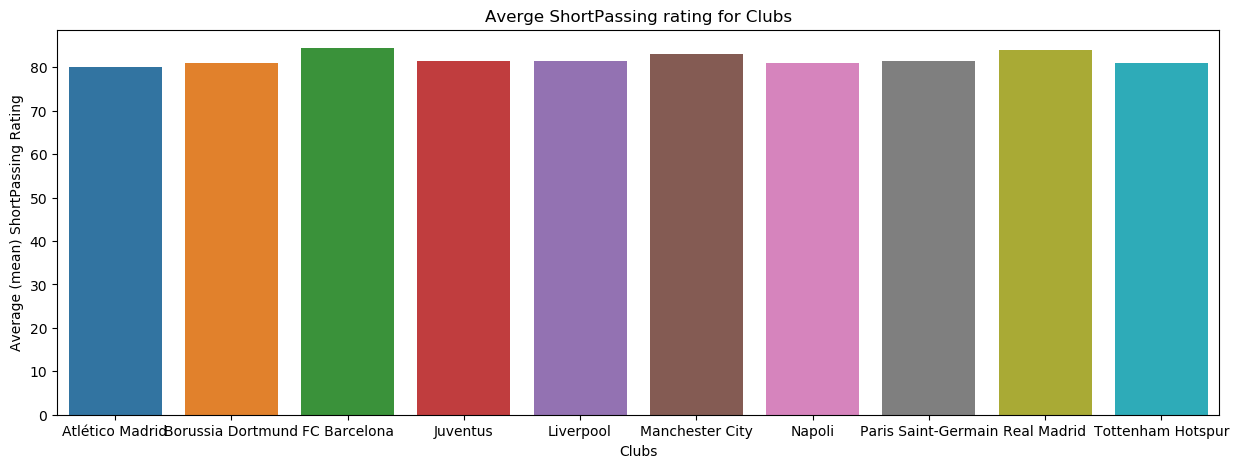

In [47]:
plotViolin(df_club, "ShortPassing", "Club")
plotCount(df_club, "ShortPassing Bins", "Club", loc = 'upper left', size = 12, legend = True)
plotBar(df_club, "ShortPassing", "Club", num = 15)
plotViolin(df_club, "LongPassing", "Club")
plotCount(df_club, "LongPassing Bins", "Club", loc = 'upper left', size = 12, legend = True)
plotBar(df_club, "ShortPassing", "Club", num = 15)

** Conclusion: ** Barcelona has the best short passing ability, it has the most amount of short passers with passing attribute greater than 80. 15% of all such players belong to Barcelona. Barcelona is followed by Real Madrid (12.5%) who is then followed by both Spurs and PSG (8%). Real Madrid has the best long passing ability almost 25% percent of players with long passing attribute greater than 80 belongs to Real Madrid who is then followed by Barcelona and Manhester city that stand at 15%. Barcelona' top 15 passing players have an average short passing ability greater than 80, they are then closely followed by real madrid. Atletico Madrid has the worst sort passing ability.

#### 4.6 c) Best Passers in the World

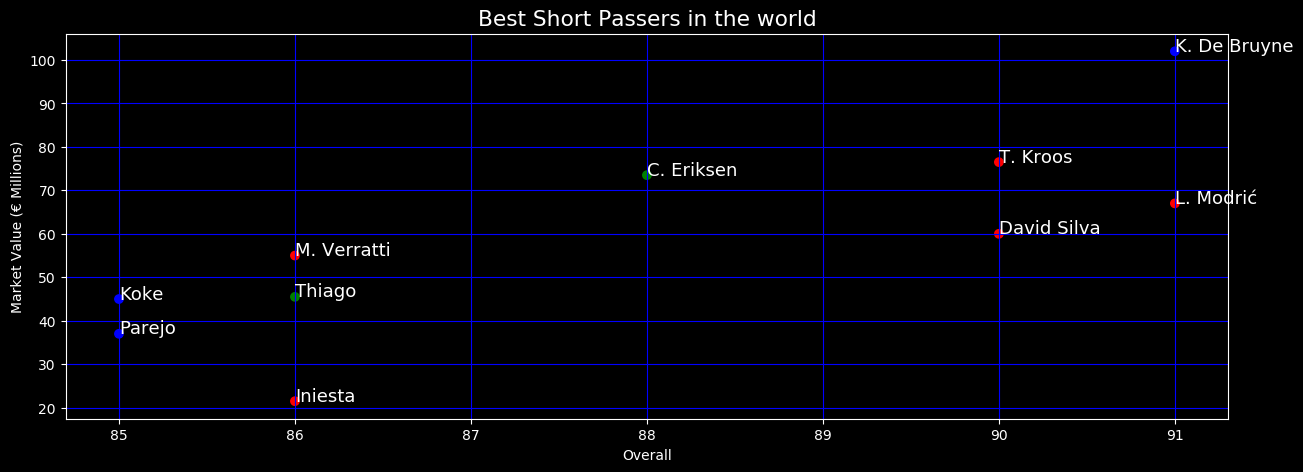

In [48]:
plotTopPlayers(df, "ShortPassing","Short Passers", "Position Type")

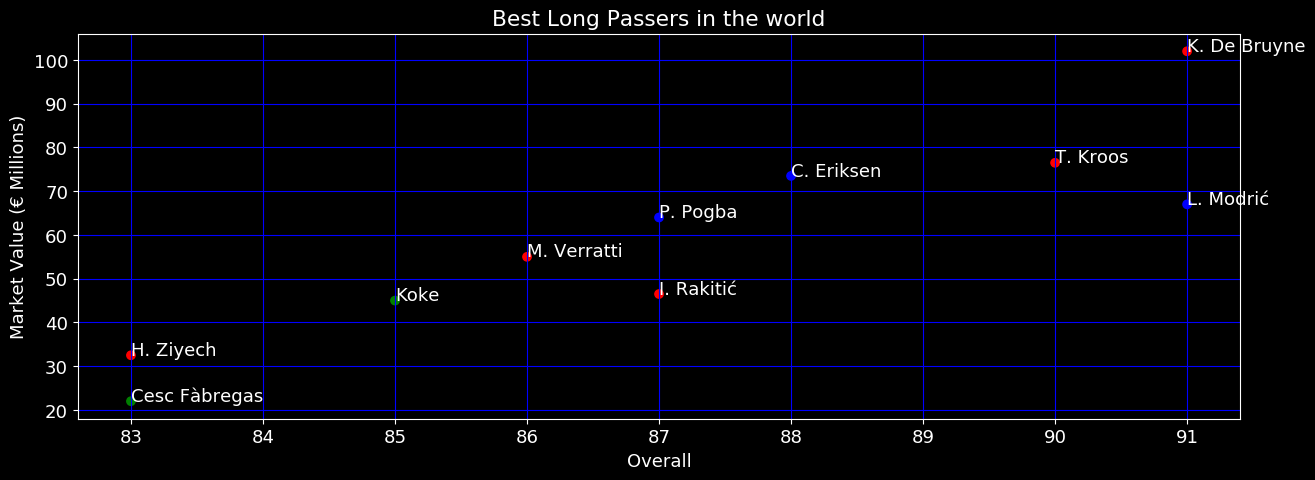

In [49]:
plotTopPlayers(df, "LongPassing","Long Passers", "Position Type")

#### 4.7 a) Vartion in Speed by Nationality

In [50]:
df_intl['SprintSpeed Bins'] = pd.cut(df_intl["SprintSpeed"], 5)
df_club['SprintSpeed Bins'] = pd.cut(df_club["SprintSpeed"], 5)

C:\Users\Paracha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Paracha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


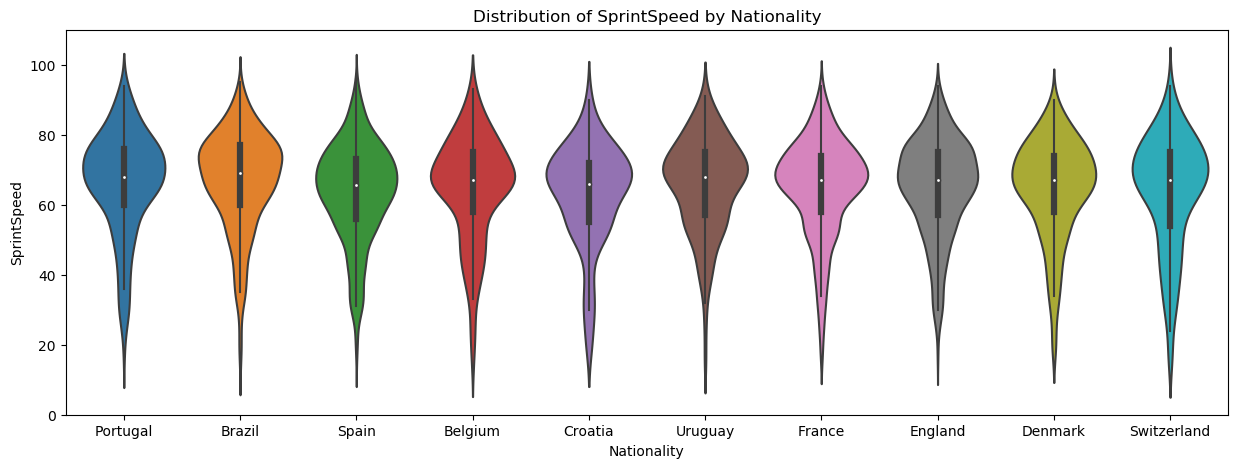

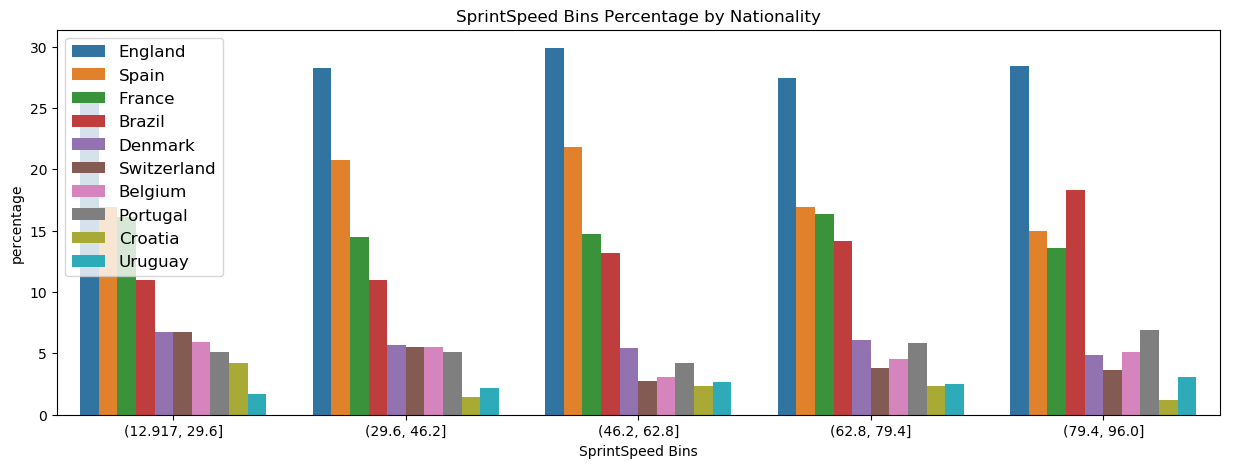

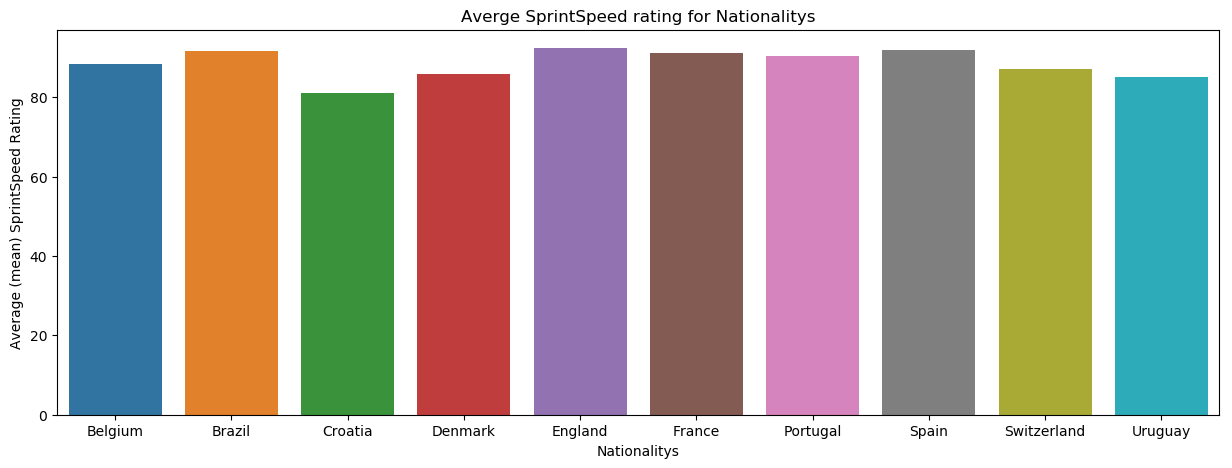

In [51]:
plt.style.use('default')
plotViolin(df_intl, "SprintSpeed", "Nationality")
plotCount(df_intl, "SprintSpeed Bins", "Nationality", loc = 'upper left', size = 12, legend = True)
plotBar(df_intl, "SprintSpeed", "Nationality", 15)

** Conclusion: ** England is the country with the most amount of fastest players in the top 10 international teams. They have the most amount of players with Sprint Speed greater than 79. Around 30% of players with speed greater than 79 beong to England. Brazil is the second but has about 10% less players than England whose SprintSpeed is grater than 79. Croatia is last having less than 5% players with this speed compared to other teams. Top 15 of England's fastest players have a average sprint speed greater than 85, they are closely followed by Brazil, Spaind and then France. Croatia's top 15 fastest players have the slowest average amongst the top 10 international teams. 

#### 4.7 b) Vartion in Speed by Club

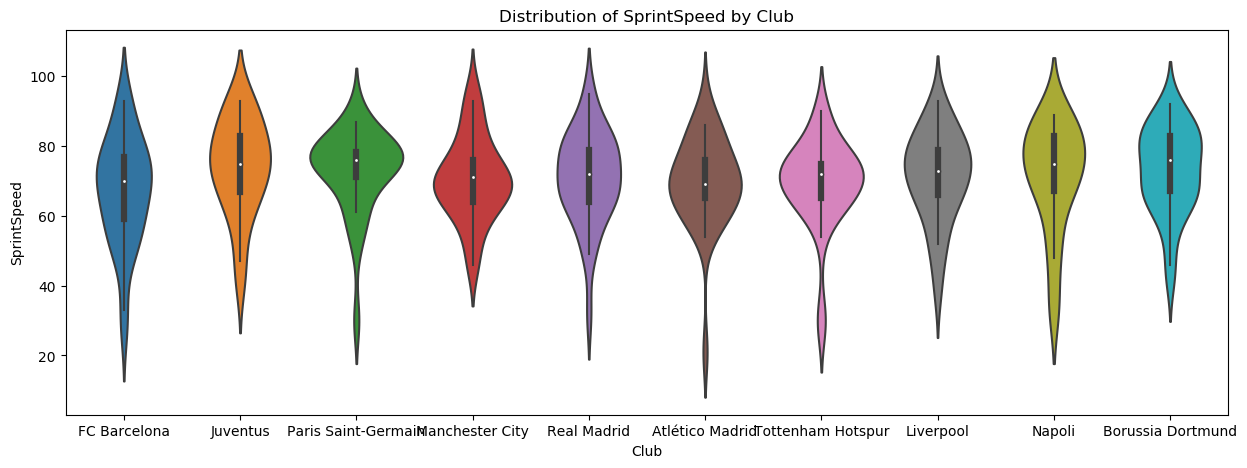

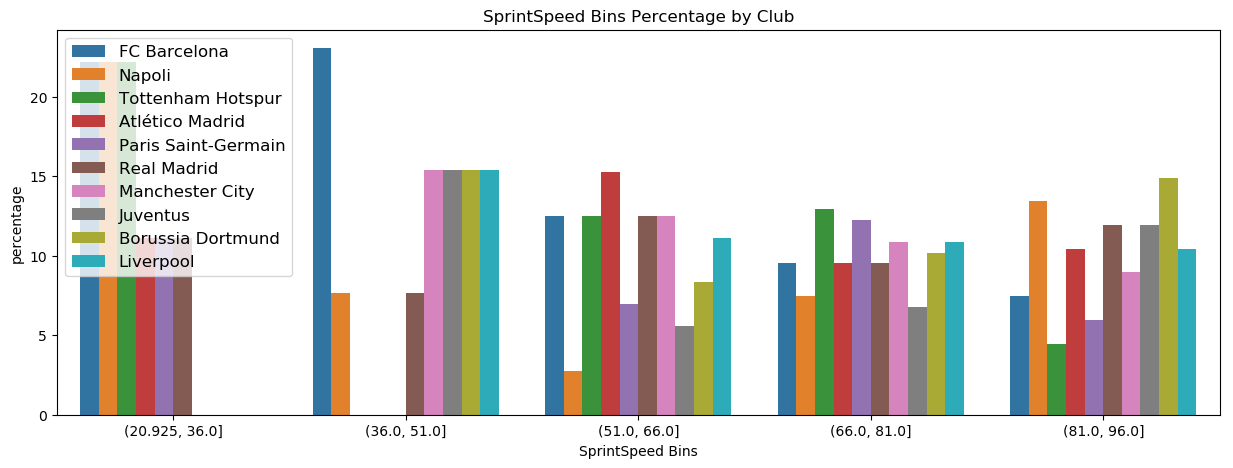

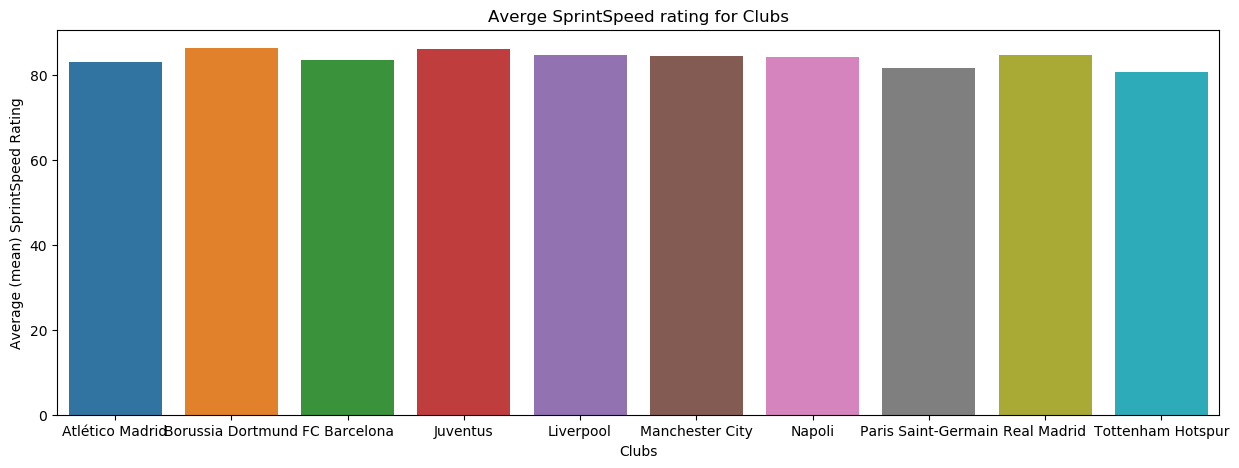

In [52]:
plotViolin(df_club, "SprintSpeed", "Club")
plotCount(df_club, "SprintSpeed Bins", "Club", loc = 'upper left', size = 12, legend = True)
plotBar(df_club, "SprintSpeed", "Club", num = 10)

** Conclusion: ** Borussia Dortmund has the fastest players, around 15% of players with speed greater than 81 belong to Dortmund. Napoli is the second, having 12.5% of such players. Real Madrid and Juventus are third. Borrusia Dortmund's top 10 fastest players have an average sprint speed greater than 90, they are closely followed by Juventus however. Paris Saint Germain's top 10 fastest players have the slowest average. 

#### 4.7 c) Fastest Players in the world

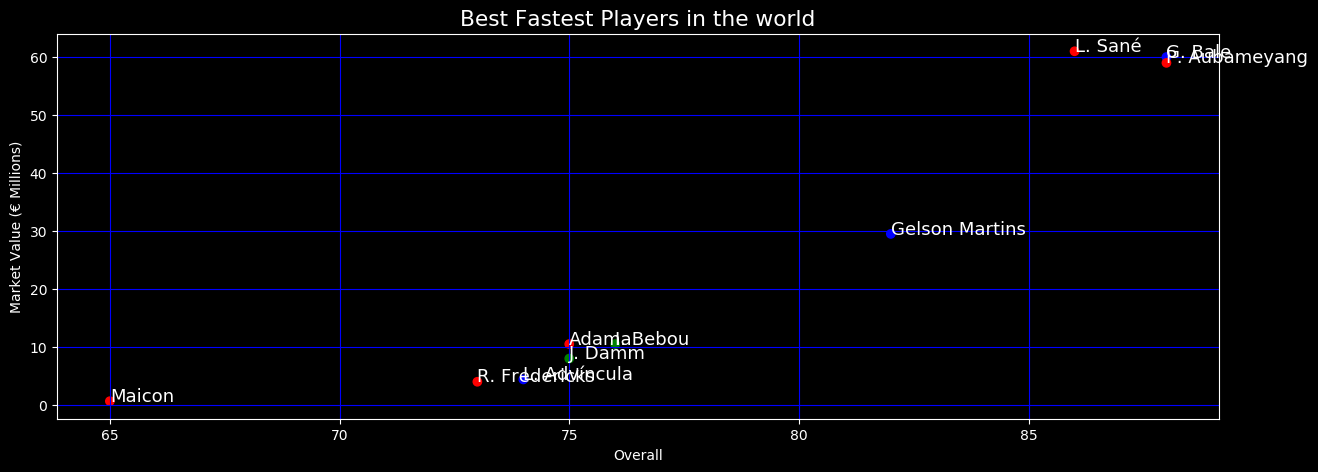

In [53]:
plotTopPlayers(df, "SprintSpeed","Fastest Players", "Position Type")

#### 4.8 Variation in Jersey Number by Position

Next let's see if Jersey Numbers are related to Position, that is to say are players of a specific position more likely to have a particular jersey number?

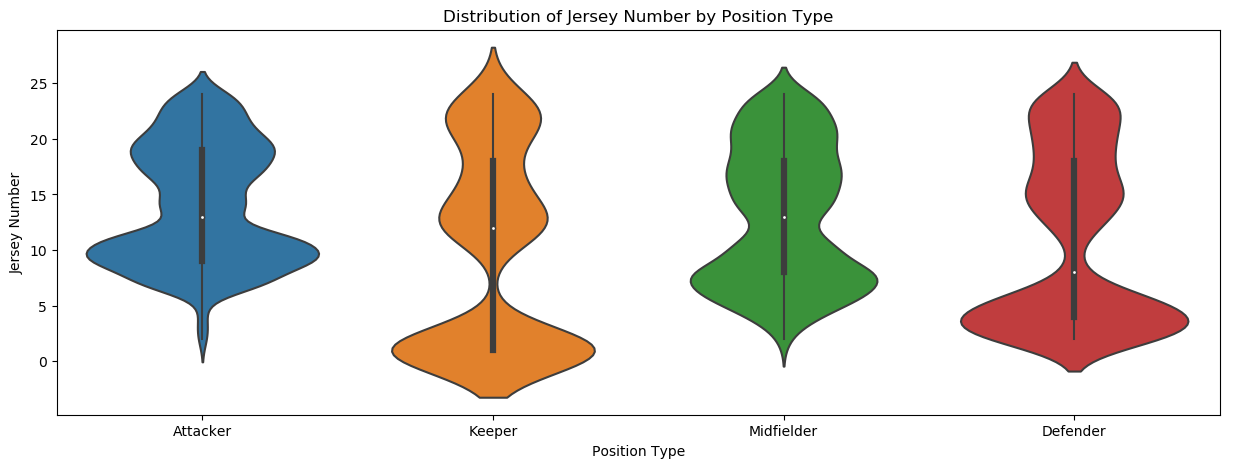

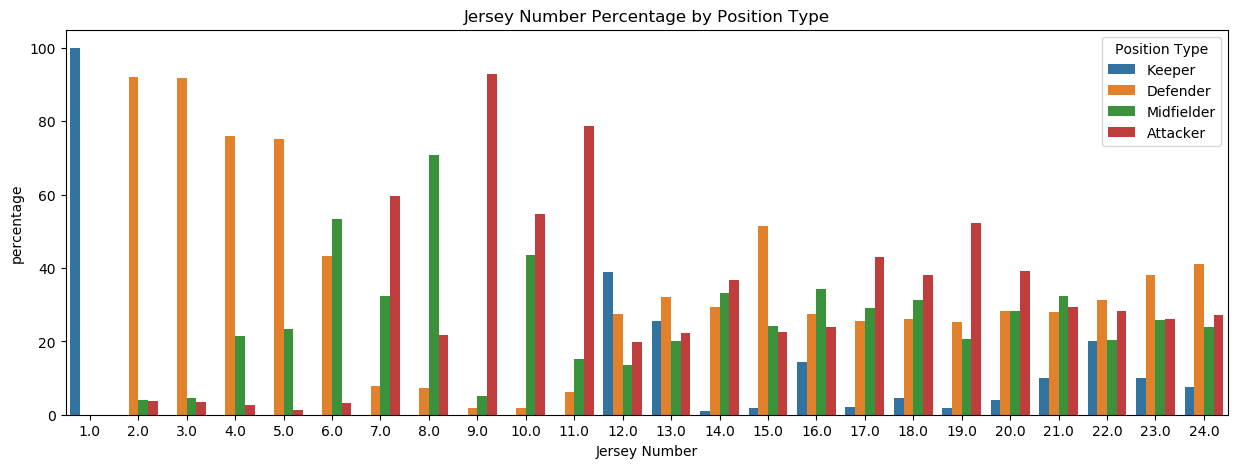

In [54]:
plt.style.use('default')
plotVariations(df[df["Jersey Number"] < 25], "Jersey Number", "Position Type")

PLot 1: We see that the mode Jersey Number for attackers is 10, and for goal keepers it is 1. We also see that midfielders prefer numvbers within the 5-10 range (median lies within this range) and defenders numbers with in the 0-5 range.

Plot 2: Wow we see that 100% of players with the Jersey Number are 1, that is to say if a player has a Jersey Number of 1 he/she most likely plays as a goalkeeper. We also see that attackers dominate the numbers 7,9,10 or 11. For midfielders the number that midfierlders use the most is 8 and for defenders the numbers 2,3,4 and 5 are the ones they use more compared to other positions.

** Conclusion: ** The number 1 exclusively belongs to goal keepers. Defenders use the numbers 2,3,4 and 5 more than players of other positions. Midifelers only use 6,8 and 16 more than players of other positions do. Strikers use 7,9,10 and 11 significantly more than other players.  


#### 4.9 a) Variation in Strength by Position

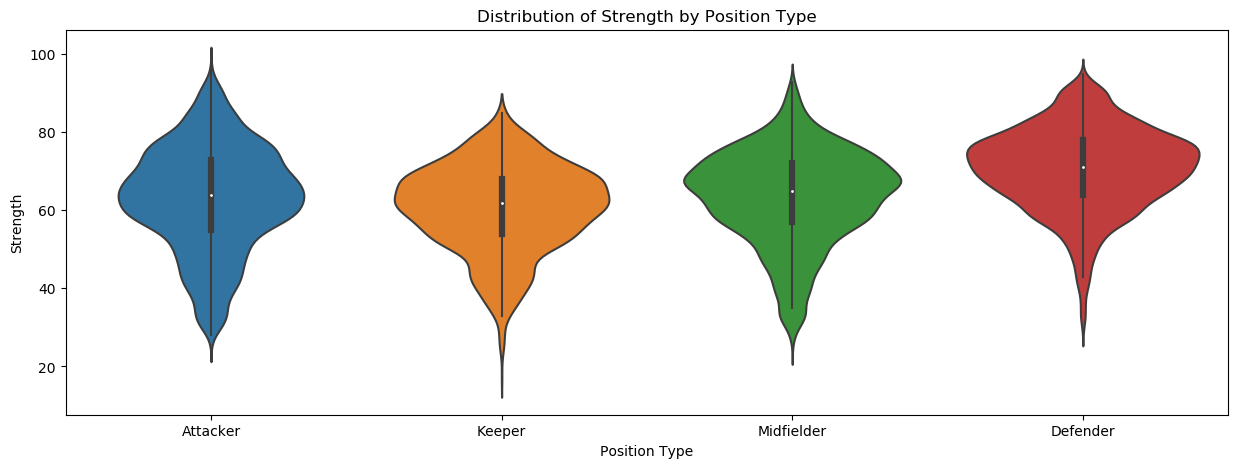

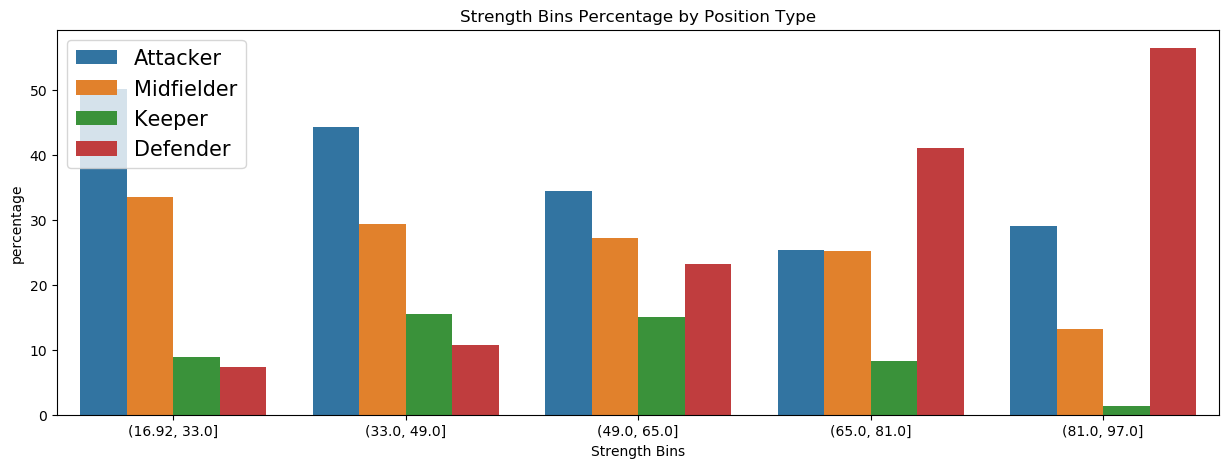

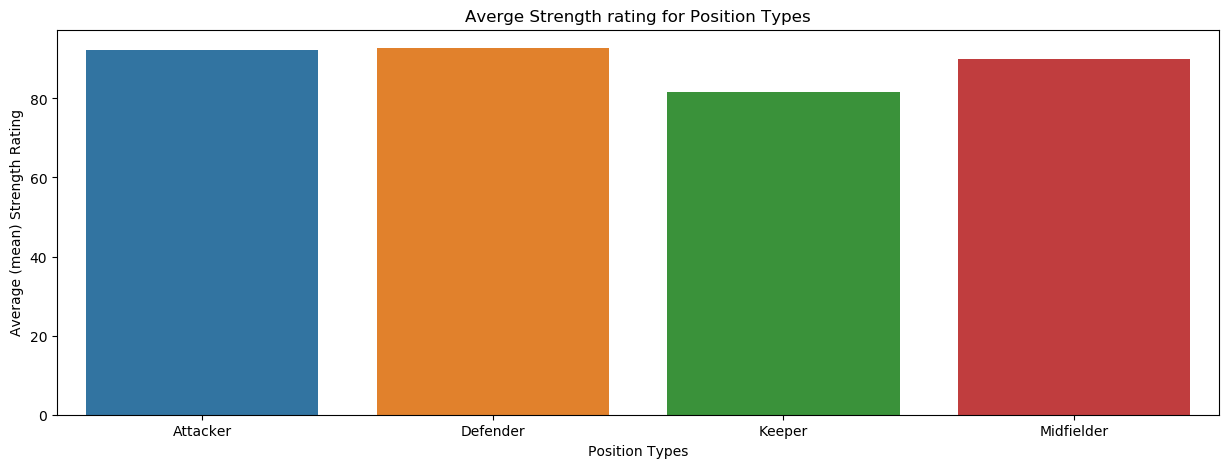

In [55]:
df['Strength Bins'] = pd.cut(df["Strength"], 5)
plotViolin(df, "Strength", "Position Type")
plotCount(df, "Strength Bins", "Position Type", loc = 'upper left', size = 15, legend = True)
plotBar(df, "Strength", "Position Type", num = 50)

** Conclusion: ** The top 50 defenders with the highest strength have an average strength greater than players of other positions. More than 50% of players with a strength rating greater than 81 belong are defenders, hence we can say that defenders are the strongest players (Strength wise). Followed by Attackers and then midfielders. 

#### 4.9 b) Variation in Strength by Nationality

C:\Users\Paracha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


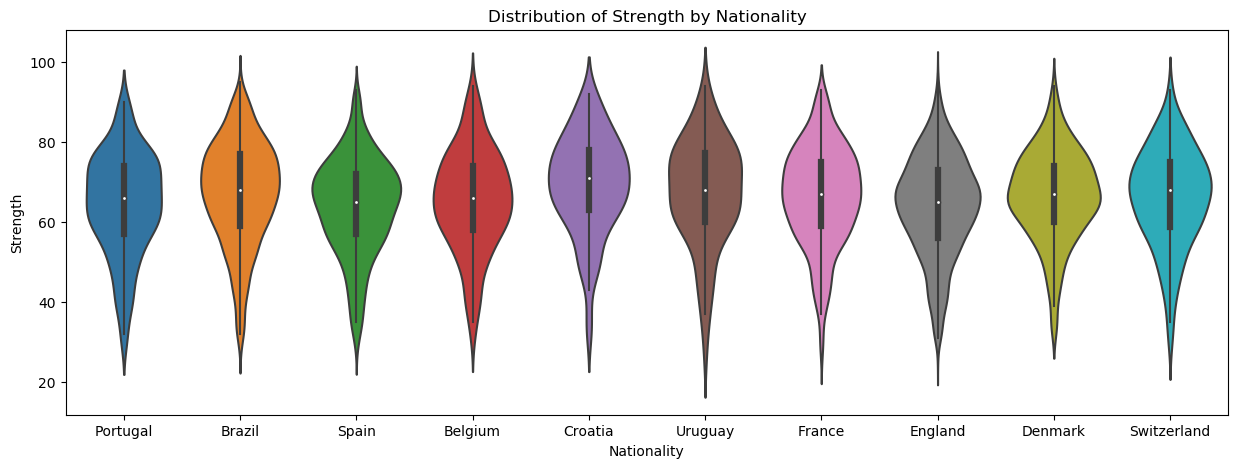

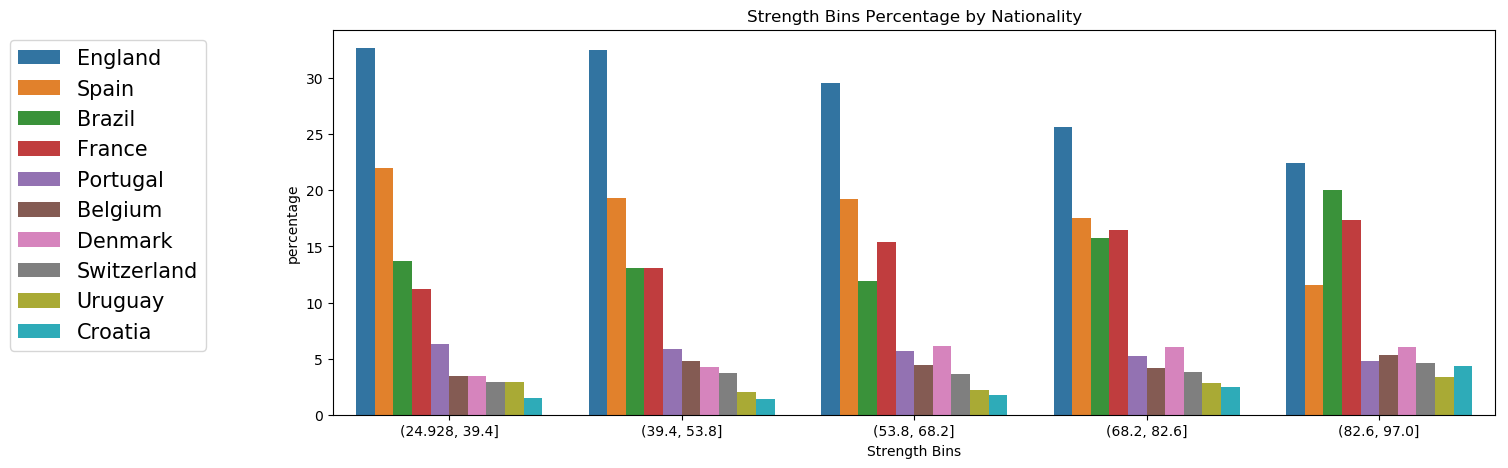

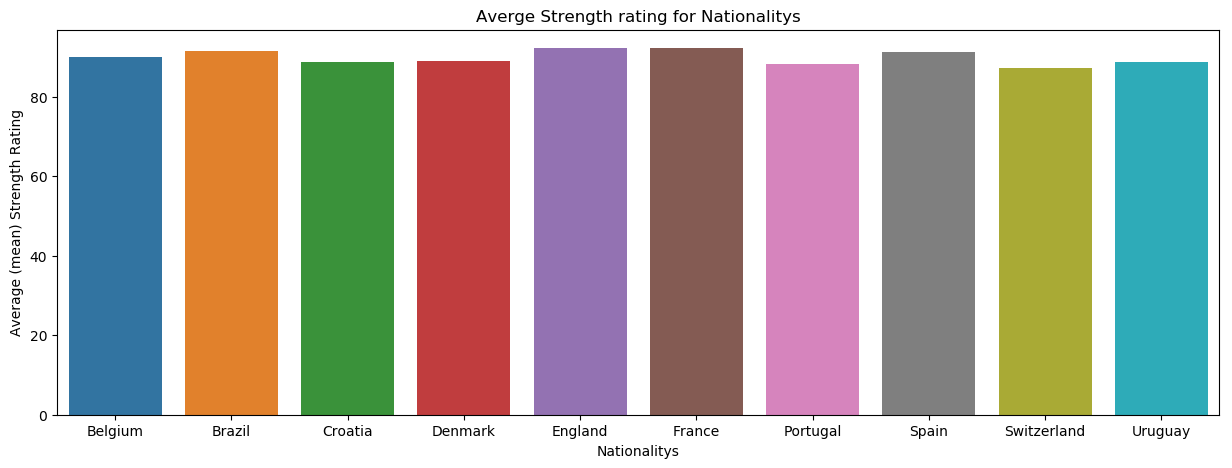

In [56]:
df_intl['Strength Bins'] = pd.cut(df_intl["Strength"], 5)
plotViolin(df_intl, "Strength", "Nationality")
plotCount(df_intl, "Strength Bins", "Nationality", loc = 'upper left', size = 15, legend = True, bbox = (-0.1, 1))
plotBar(df_intl, "Strength", "Nationality", num = 12)

** Conclusion: ** England is the most physcial international team having the most amount of players with strength greater than 82, followed by Brazil and France who are almost tied. The average strngth of England's top 12 strongest players is greater than 85 and so is that of the Frane players, who are closely followed by Brazil and Spain.

#### 4.9 c) Variation in Strength by Club

C:\Users\Paracha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


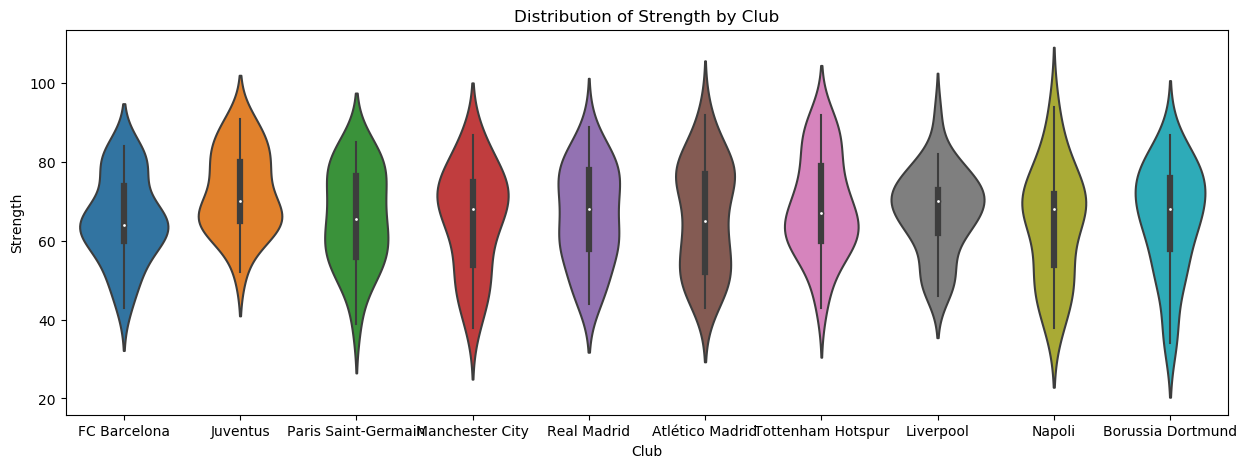

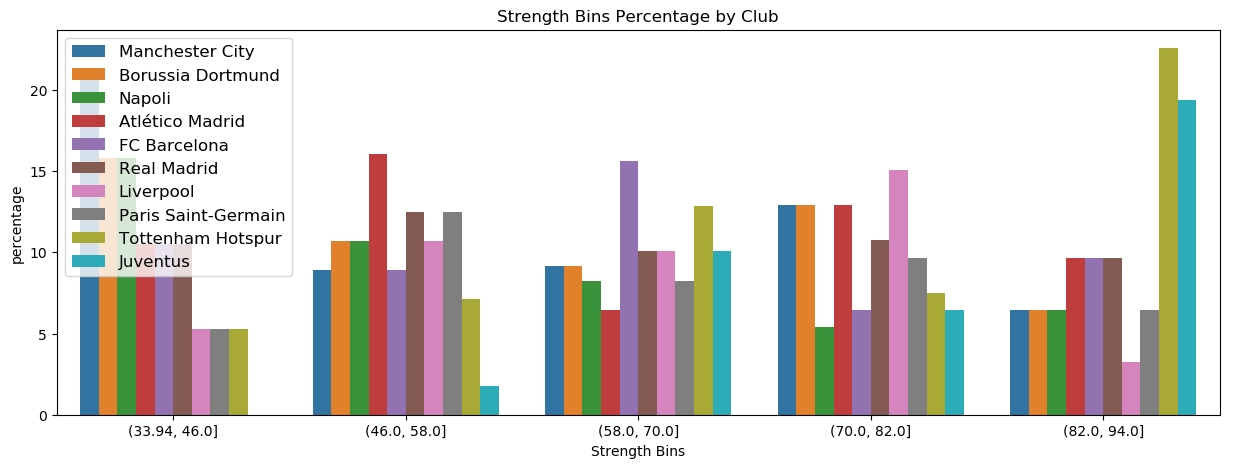

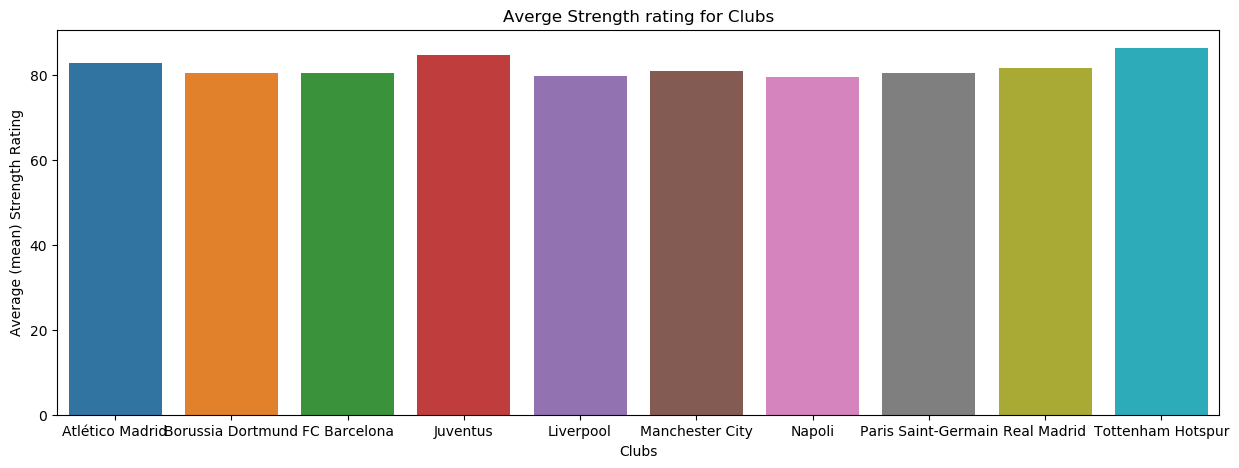

In [57]:
df_club['Strength Bins'] = pd.cut(df_club["Strength"], 5)
plotViolin(df_club, "Strength", "Club")
plotCount(df_club, "Strength Bins", "Club", loc = 'upper left', size = 12, legend = True)
plotBar(df_club, "Strength", "Club", num = 8)

** Conclusion: ** Spurs is the most physcial team having the most amount of players with strength greater than 82. Spurs has the most amount of physical (Strength) players, followed by Juventus. Average strength of spurs top 8 strongest players is greater than that of any other side, Juventus is the second.

#### 4.9 d) Strongest Players in the world

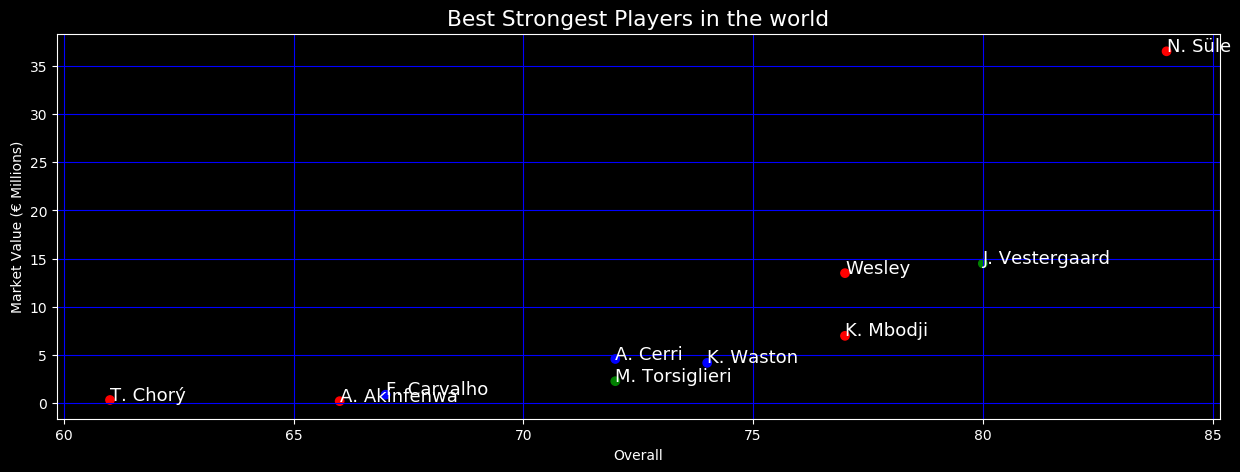

In [58]:
plotTopPlayers(df, "Strength","Strongest Players", "Position Type")

#### 4.10 Most Famous Players in the world

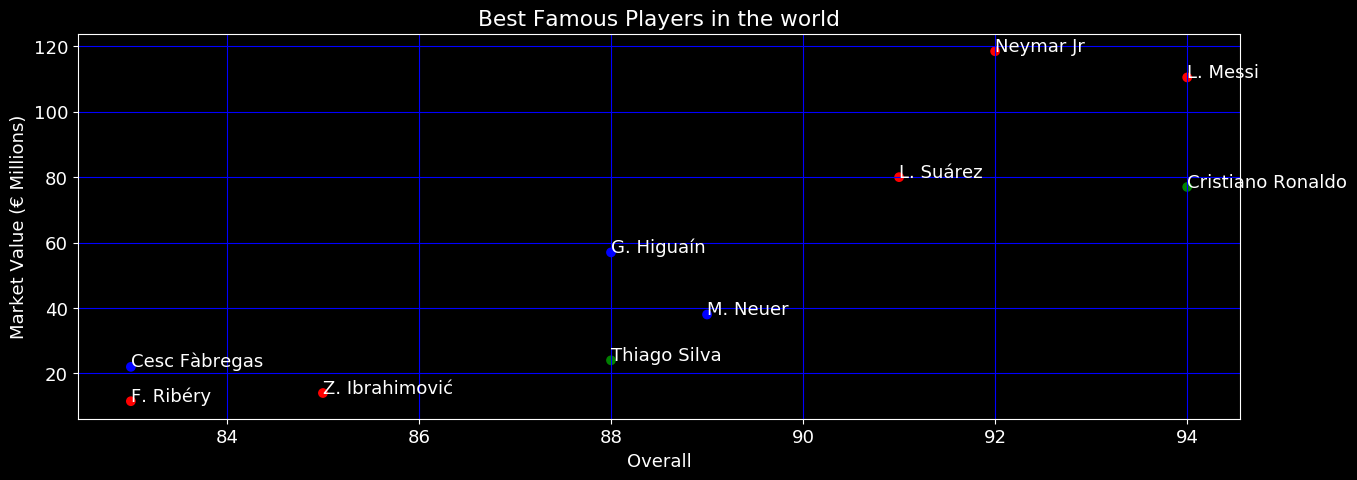

In [59]:
plotTopPlayers(df, "International Reputation","Famous Players", "Position Type")

Next let's see how the market values is effect by position, age and overall of players.

#### 4.11 a) How Market Value is effected by Position, Age and Overall

In [60]:
plt.style.use('default')

In [61]:
def colorLineGraphGroup2(df, group1, group2, var):
    ind=0
    plt.figure(figsize=(17,7))
    for k,i in df.groupby(group1):
        if(k != "Keeper"):
            for key, item in i.groupby(group2):
                if(len(item) != 0):
                    x= []
                    y= []
                    for kee, ite in item.groupby("Overall"):
                        x.append(ite['Overall'].median())
                        y.append(ite[var].median())
                    plt.plot(x,y,
                    label = str(math.ceil(key.left)) + "-" + str(math.ceil(key.right)) +  " " + str(k), color = colors[ind])
                    ind+=1
                    if(ind >= len(colors)):
                        ind = 0
    plt.legend(prop={'size':13}, loc = 'upper left') 
    plt.title("Average " + var + " by " + group1 + ", " + group2 + " and Overall")
    plt.xlabel("Overall")
    plt.ylabel(var)
    plt.show()

In [62]:
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'darkblue', 'darkgreen', 'black', 'yellow', 'pink', 'cyan', 
         'tan', 'gray','red', 'blue', 'green', 'purple', 'orange', 'darkred']

In the Graph below the first part of the legend represents the age range and the second part the position of the player.

Let's see how the market value for all playes with an overall greater than 80 varies. 

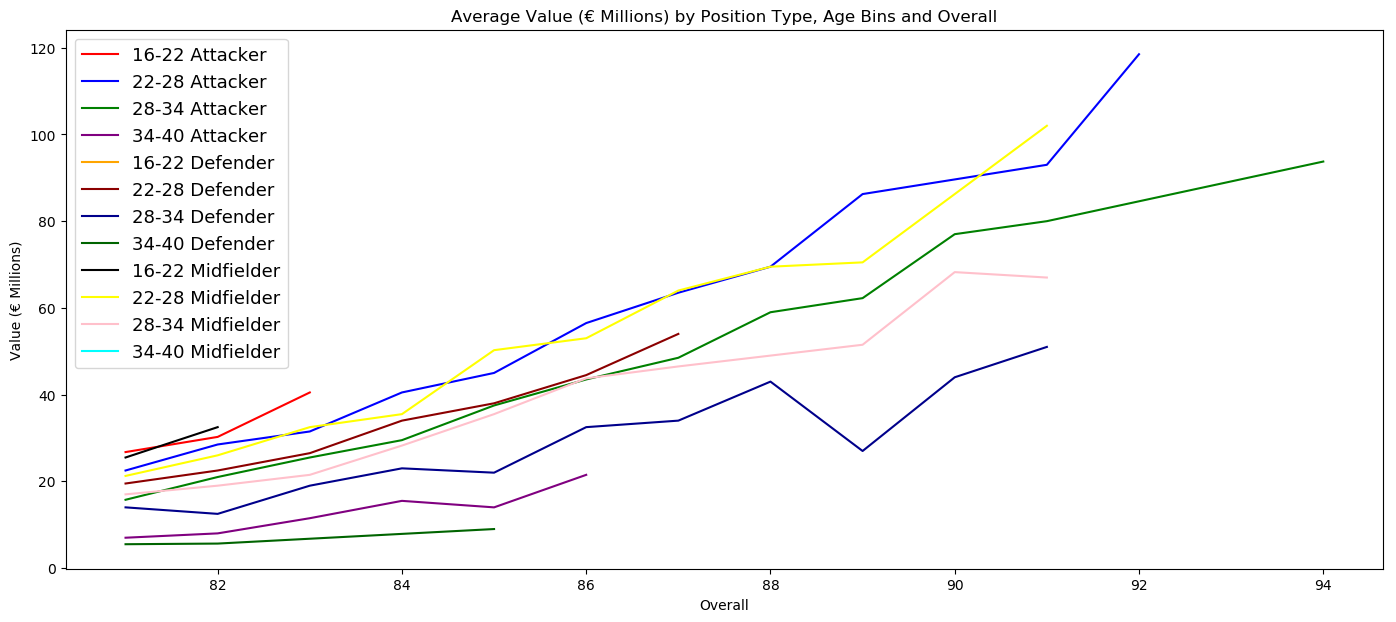

In [63]:
colorLineGraphGroup2(df[df["Overall"] > 80], "Position Type", "Age Bins", "Value (€ Millions)")

** Conclusion: ** We see that generally strikers have the highest average market value compared to both Midfielders and Defenders of the same age and overall. Players within the age range of 22-28 have the highest average market value for all overalls. The trend seems to be that strikers only earn more in the same overall and age but earn less compared to younger midfielders and defenders of the same overall.  

#### 4.11 b) How Wage is effected by Position, Age and Overall

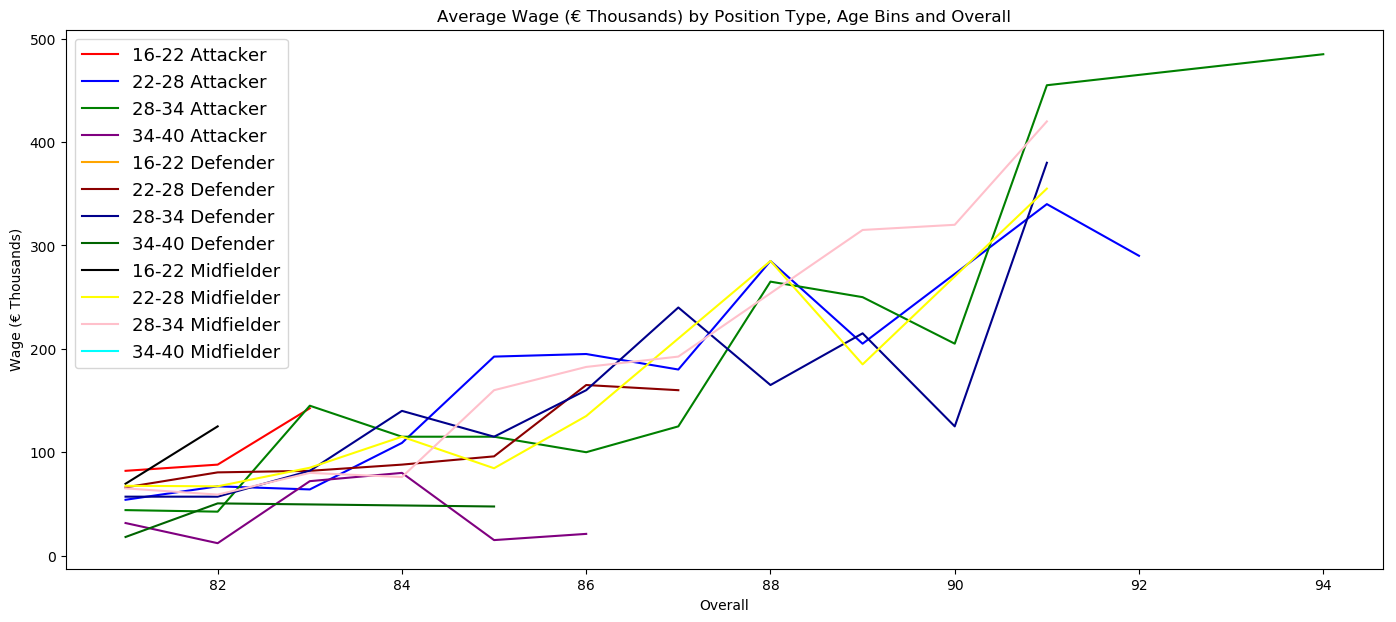

In [64]:
colorLineGraphGroup2(df[df["Overall"] > 80], "Position Type", "Age Bins", "Wage (€ Thousands)")

** Conclusion: ** We notice that the average wage of midfielders aged 28-34 is the highest for most overalls. We also see that strikers within age range 22-28 first have a higher wage than midfielders of a age range 28 - 34 and the same overall but then after overall 87 they start earning less than the same midfielders. 

In [65]:
def colorLineGraphGroup1(df, group1, var, loc = 'upper left'):
    ind=0
    plt.figure(figsize=(17,7))
    for k,i in df.groupby(group1):
        if(k != "Keeper"):
            if(len(i) != 0):
                x= []
                y= []
                for kee, ite in i.groupby("Overall"):
                        x.append(ite['Overall'].median())
                        y.append(ite[var].median())
                plt.plot(x,y, label = k, color = colors[ind])
                ind+=1
                if(ind >= len(colors)):
                    ind = 0
    plt.legend(prop={'size':15}, loc = loc) 
    plt.title("How " + var + " is effected by " + group1 +  " and Overall")
    plt.xlabel("Overall")
    plt.ylabel(var)
    plt.show()

#### 4.12 a) Variation of Wages in Clubs by Player Overall

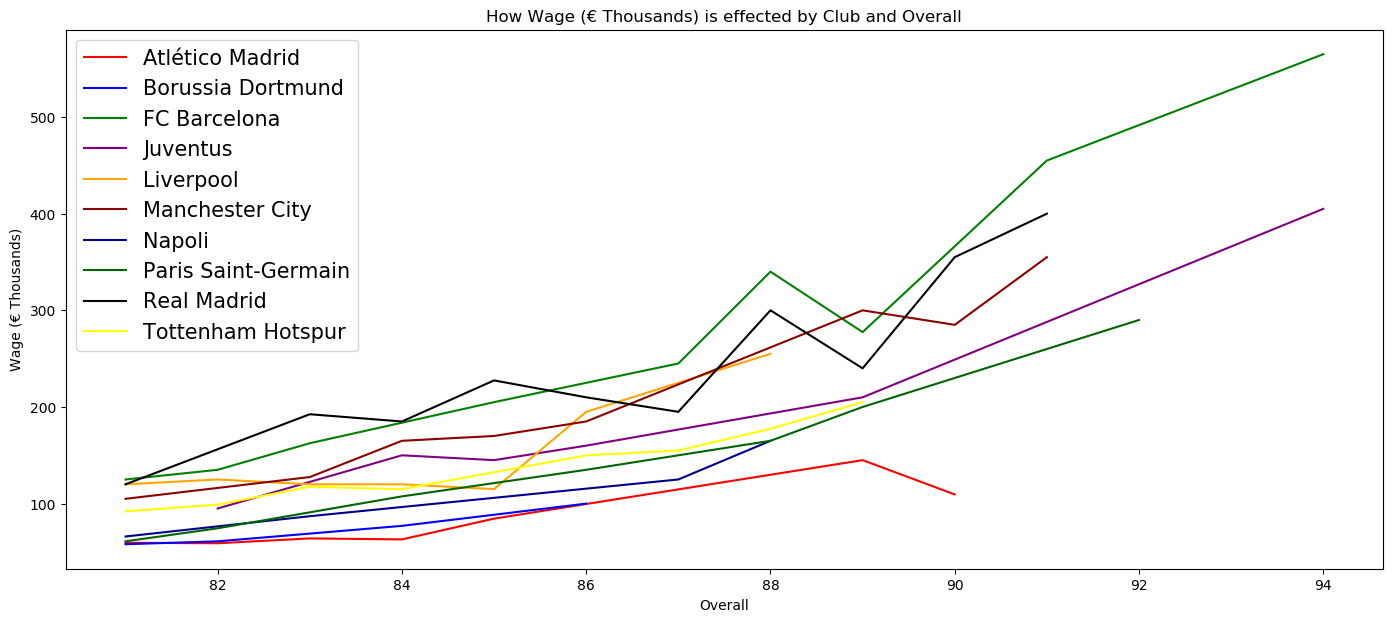

In [66]:
colorLineGraphGroup1(df_club[df_club["Overall"]>80], "Club", "Wage (€ Thousands)")

** Conclusion: ** It seems like PSG pays the most to its players for the same overall than other. PSG is followed by Real Madrid and then Manchester City as the highest payers. Atletico Madrid pays their players the least amount for the same overall.

#### 4.12 c) Variation of International Reputation by Club and Overall

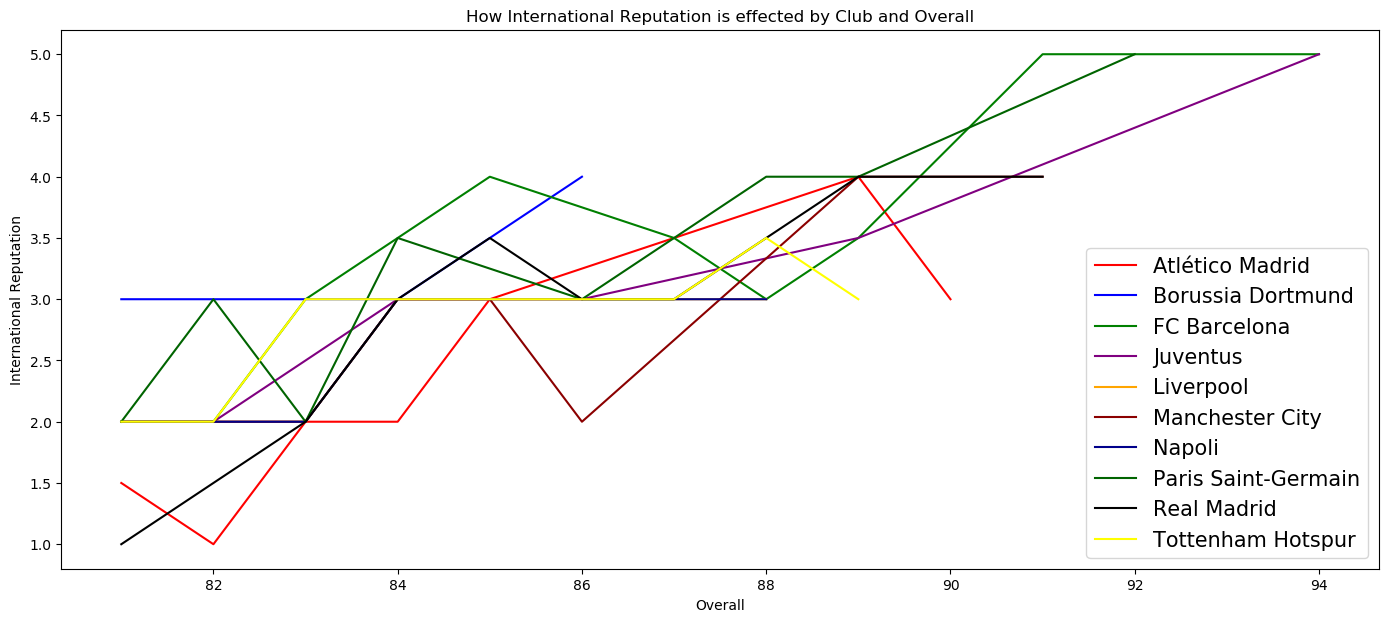

In [67]:
colorLineGraphGroup1(df_club[df_club["Overall"]>80], "Club", "International Reputation", loc = 'lower right')

** Conclusion: ** We see that there is an even distribution of famous players for most clubs. Bercelona, Juventus and PSG seem to have some of the most famous players, where as Atletico Madrid has few of the least famous players. 

## 5. Correlation

We are almost to the machine learning part! but before we do that we need to see which variables are correlated, because in some models like linear regression we do not want to predict a value using two features that are correlated, this can be a problem. Furthermore, we can only predict a variable by using features that it is correlated to so we need to see which features will be good to use in predicting an attribute.  

First let's see how overall is related to market value.

In [68]:
from numpy.polynomial.polynomial import polyfit # to create line of best fit

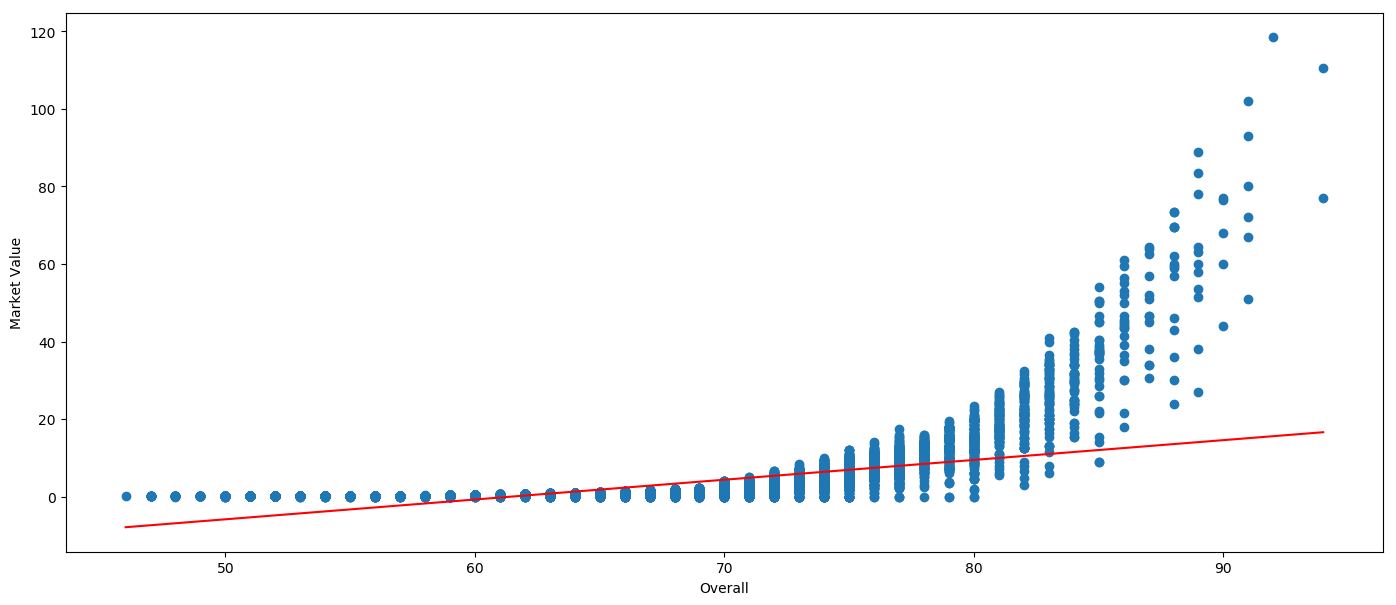

In [69]:
fig = plt.figure(figsize=(17,7))
plt.scatter(df['Overall'], df['Value (€ Millions)'])
b,m = polyfit(df['Overall'], df['Value (€ Millions)'], 1)
plt.plot(df['Overall'], b + np.array(m) * df['Overall'], '-',c='r')
plt.xlabel("Overall")
plt.ylabel("Market Value")
plt.show()

We see that as overall increases market value increases as well, however, we see that the line of best fit does not cover the meat of the data, every player that has an overall greater than 80 and Market value greater than 20 seems to be an outlier according to the plot above. Obviously, this is not the case. This is because market value for players with an overall less than 80 follows a different trend than the ones higher than 80, market value seems to increase very slowly if overall is less than 80 but if the overall is greater than 80 market value increases by a large amount, hence to get better results we can fit two different models one for overall's greater than 80 and one for overalls less than 80. (Note: We can fit models with all the data and still get good results (I tried it!!!) but since I am mostly interested in players with an overall greater than 80 I will only work with those entries).

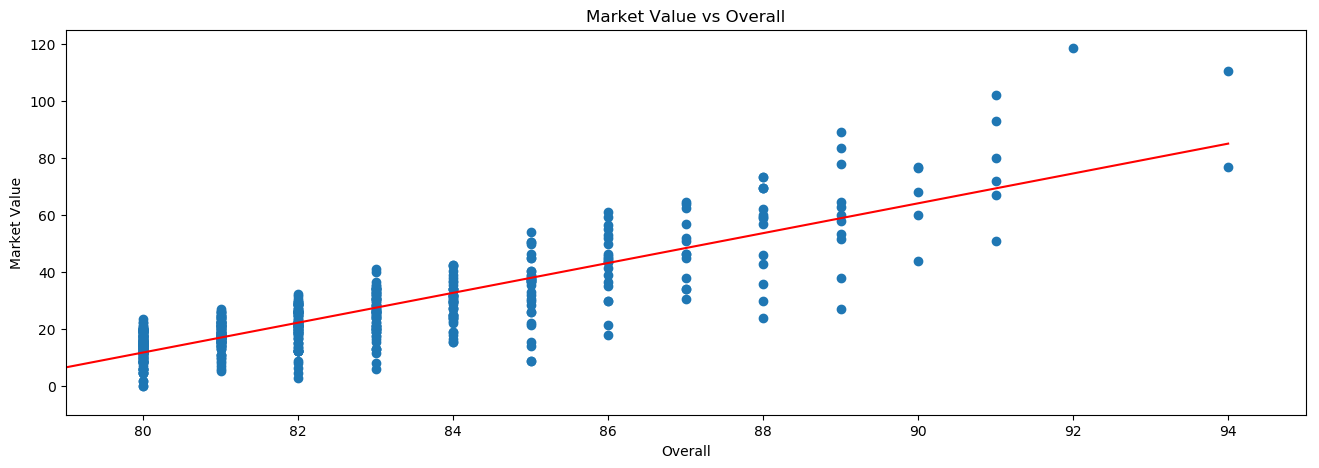

In [70]:
df_80 = df[df['Overall'] >= 80]
fig = plt.figure(figsize=(16,5))
plt.scatter(df_80['Overall'], df_80['Value (€ Millions)'])
b,m = polyfit(df_80['Overall'], df_80['Value (€ Millions)'], 1)
plt.plot(df['Overall'], b + np.array(m) * df['Overall'], '-',c='r')
plt.xlabel("Overall")
plt.xlim(79, 95)
plt.ylim(-10, 125)
plt.ylabel("Market Value")
plt.title("Market Value vs Overall")
plt.show()

We can now see a genral trend as overall increases Market value increases as well, so the two are correlated.

Now let's see how many samples we have to predict from.

In [71]:
len(df_80)

549

We have 548 samples which is a large enough amount for us to accurately make predictions.

Let's check the same for Wage as well.

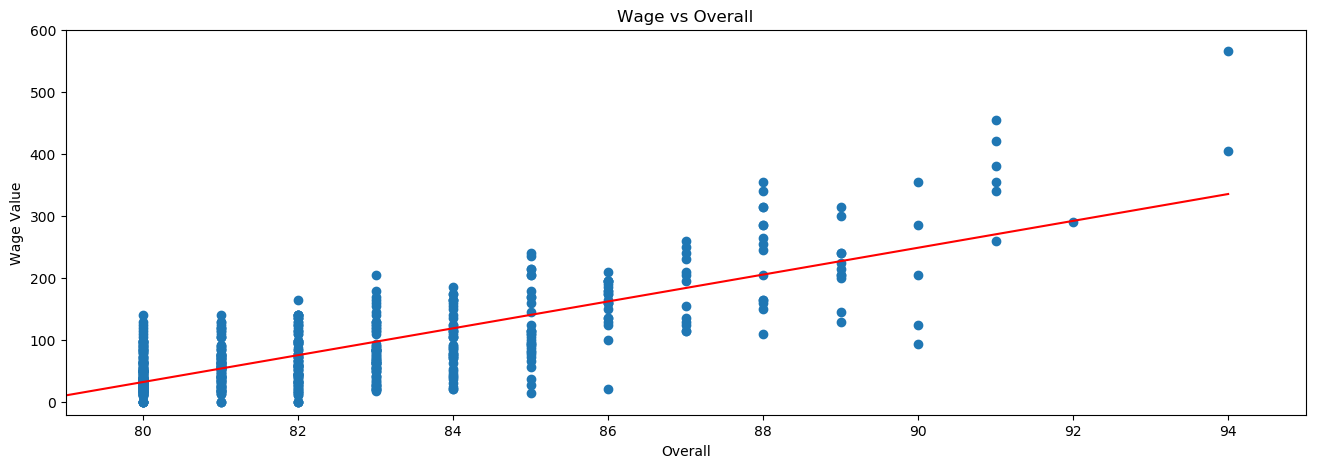

In [72]:
df_80 = df[df['Overall'] >= 80]
fig = plt.figure(figsize=(16,5))
plt.scatter(df_80['Overall'], df_80['Wage (€ Thousands)'])
b,m = polyfit(df_80['Overall'], df_80['Wage (€ Thousands)'], 1)
plt.plot(df['Overall'], b + np.array(m) * df['Overall'], '-',c='r')
plt.xlabel("Overall")
plt.xlim(79, 95)
plt.ylim(-20, 600)
plt.ylabel("Wage Value")
plt.title('Wage vs Overall')
plt.show()

There seems to be only one outlier, the player with an overall of 94 and wage greater than 500. So let us remove him from this dataset.

In [73]:
df_80 = df_80[df_80['Wage (€ Thousands)'] < 500] # dropping outlier

Next, we also saw in 4.11 c) that wage and market value are effected by position as well, so we will take that into account when fitting our model.

Now let's explore which other variables have an effect on market value and wage.

In [74]:
# This function draws a correlation heatmap between all the numeric variables in the dataframe.
# data represents that dataframe to be plotted. vmax represents the size of the correlation color bar. 
def drawCorrHeatMap(data, vmax):
    str_list = [] # empty list to contain columns with strings (words)
    for colname, colvalue in data.iteritems():
        if type(colvalue[2]) == str:
             str_list.append(colname)
    # Get to the numeric columns by inversion            
    num_list = data.columns.difference(str_list) 
    # Create Dataframe containing only numerical features
    data_num = data[num_list]
    f, ax = plt.subplots(figsize=(20, 11))
    plt.title('Pearson Correlation of Numerical Features')
    # Draw the heatmap using seaborn
    sns.heatmap(data_num.astype(float).corr(), linewidths=0.25, vmax=vmax, 
                square=True, cmap="cubehelix_r", linecolor='k', annot=True)
    plt.show()

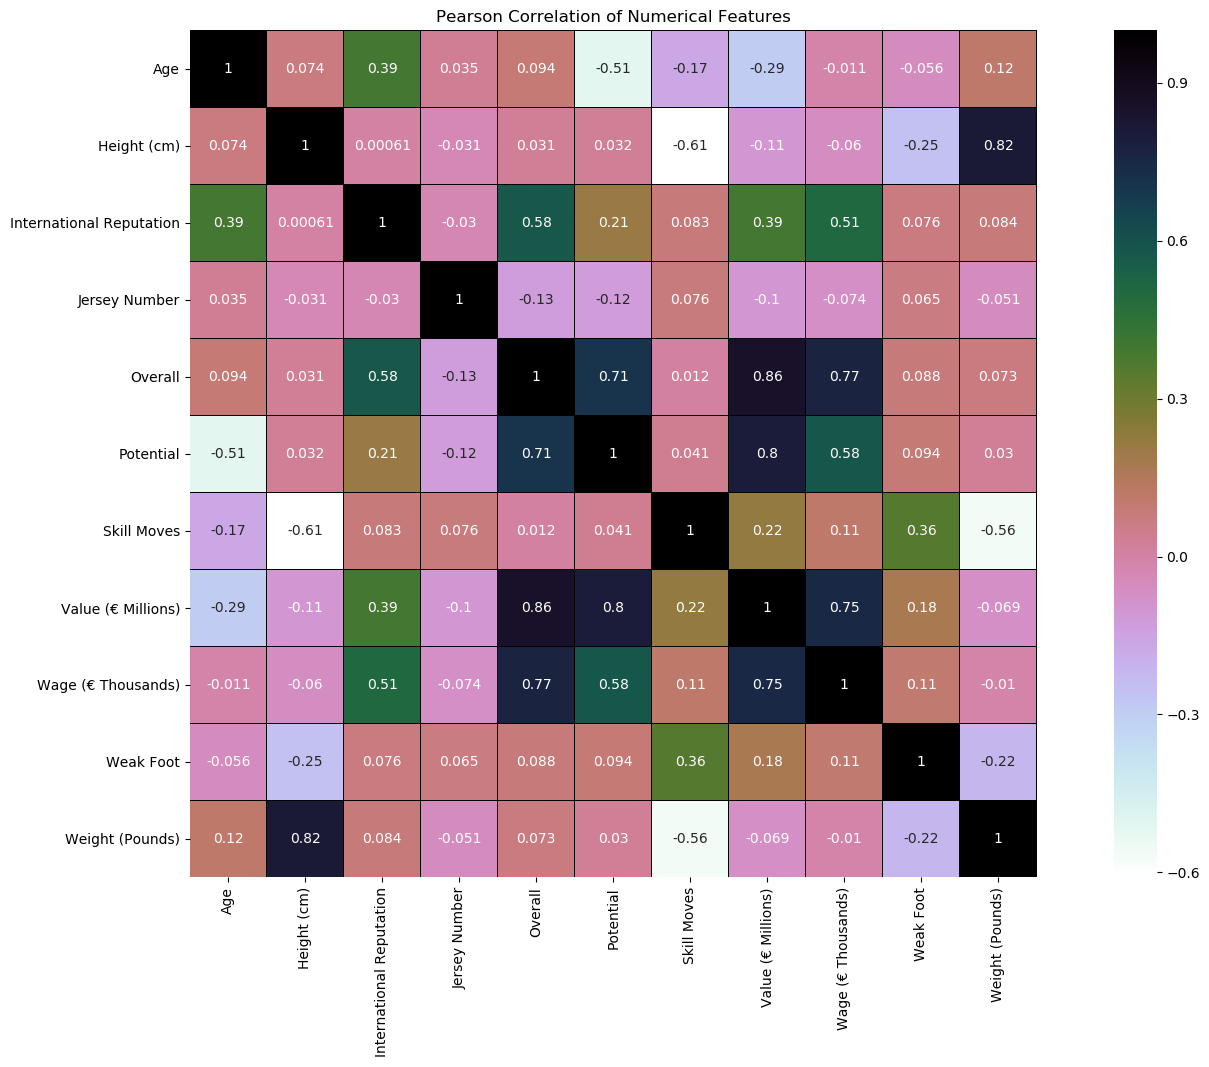

In [75]:
drawCorrHeatMap(df_80[['Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value (€ Millions)', 'Wage (€ Thousands)', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Position', 'Jersey Number', 'Height (cm)', 'Weight (Pounds)']], vmax = 1)

We see that market value is correlated to age, International Reputation, Overall, Potential and wage as well.      
Overall and Potential are highly coorelated.      
It is also seen that Wage is positively correlated to International Reputation alongside Overall and Potential.       
Another interesting correlation is that age and international reputation are somewhat correlated (0.39) but not enough to throw off our models.        
We also see that height and weight are negatively correalted with skill moves, meaning the taller and heavier the person is the less they are skilled in terms of skill moves.        
SKill moves also have a small effect on value as well as does weak foot. And neither weak foot and overall nor skill moves and overall are correlated. 

We know that position has an effect on wage and value, so let us create dummy variables for that as well in order to use it when performing machine learning.

In [76]:
df_80 = pd.get_dummies(df_80, columns=["Position Type"])

In [77]:
df_80.head(2)

Name  Age Nationality  Overall  Potential  \
1  Cristiano Ronaldo   33    Portugal       94         94   
2          Neymar Jr   26      Brazil       92         93   

                  Club  Value (€ Millions)  Wage (€ Thousands) Preferred Foot  \
1             Juventus                77.0               405.0          Right   
2  Paris Saint-Germain               118.5               290.0          Right   

   International Reputation            ...             GKKicking  \
1                       5.0            ...                  15.0   
2                       5.0            ...                  15.0   

   GKPositioning GKReflexes Release Clause      Age Bins  Strength Bins  \
1           14.0       11.0        €127.1M  (27.6, 33.4]   (65.0, 81.0]   
2           15.0       11.0        €228.1M  (21.8, 27.6]   (33.0, 49.0]   

   Position Type_Attacker  Position Type_Defender  Position Type_Keeper  \
1                       1                       0                     0   
2                       1                       0                     0   

   Position Type_Midfielder  
1                         0  
2                         0  

[2 rows x 84 columns]

Now we have dummy variables for each position type (3 more columns).

## 6. Machine Learning

I will predict Market Value and Wage based using the features mentioned above. I will fit multiple models and see which model gives us the best predictions.

Below are functions to help us display how well our model is doing. 

I will train and test the models in two seperate ways, after splitting the data in to a training and testing set.
1. Perform [cross validation]() on the testing set, to see how well the model trains. (We would usually use Cross validation on the entire dataset rather than using it after splitting the datasets, but just to compare the models' R squared value (after it has been trained on the traninig dataset) with the score of cross validation, I will perform cross validation on the training dataset.)
2. Predicting on the testing set and then displaying the predictor error plot and the distribution of the predicted values vs the distribution of the original values (done through a kernel density plot).

In [78]:
from sklearn.metrics import mean_squared_error, r2_score # To check if we have a good model 
from sklearn.model_selection import cross_val_score # To check cross validation score (how well our model is doing)
from yellowbrick.regressor import PredictionError # to create a plot that  shows the actual targets from the dataset 
            # against the predicted values generated by our model. This allows us to see how much variance is in the model

In [79]:
def performCrossVal(model, x, y, cv):
    scores = cross_val_score(model, x, y, cv=cv)
    print("Score: %0.2f (+/- %0.2f) for model from k fold cross-validation" % (scores.mean(), scores.std() * 2))

In [80]:
def displayModelStats(model, xTrain, yTrain, xTest, yTest):
    visualizer = PredictionError(model)
    visualizer.fit(xTrain, yTrain)
    print("R-Squared Value for model (on testing data): " , visualizer.score(xTest, yTest))
    print("MSE Value for model (on testing data): ", (mean_squared_error(yTest, visualizer.predict(xTest))))
    visualizer.poof()
    sns.set(rc={'figure.figsize':(15,5)})
    sns.kdeplot(yTest,  label = 'Actual')
    sns.kdeplot(visualizer.predict(xTest),  label = 'Predictions')
    plt.show()

##### Which Features are significant and should be used?

In order to see which of the above mentioned features are siginificant and have an effect on the target variable (vaue and wage) we will use mututal information regression. This is because mututal information can indentify non linear relationships between features and the target variables where as linear regression can not.

In [81]:
from sklearn.feature_selection import mutual_info_regression # mutual info regression

In [82]:
cols = ['Age', 'Overall', 'Potential', 'International Reputation',
 'Weak Foot', 'Skill Moves','Position Type_Keeper', 
 'Position Type_Midfielder', 'Position Type_Attacker', 'Position Type_Defender']
X = df_80[cols]
YVal = df_80['Value (€ Millions)']
YWage = df_80['Wage (€ Thousands)']

In [83]:
print("Mutual Info Regression Scores for Market Value\n")
mi_scores = mutual_info_regression(X, YVal)
for i in range(len(cols)):
    print('Feature',cols[i])
    print('     MI Score:',round(mi_scores[i],3))

Mutual Info Regression Scores for Market Value

Feature Age
     MI Score: 0.47
Feature Overall
     MI Score: 0.678
Feature Potential
     MI Score: 0.909
Feature International Reputation
     MI Score: 0.075
Feature Weak Foot
     MI Score: 0.0
Feature Skill Moves
     MI Score: 0.034
Feature Position Type_Keeper
     MI Score: 0.006
Feature Position Type_Midfielder
     MI Score: 0.007
Feature Position Type_Attacker
     MI Score: 0.026
Feature Position Type_Defender
     MI Score: 0.01


The above scores show that Age, Overall and Potential are the best preedictors of Market value as they share a large amount of mutual information with market value. Now we know that potential and overall are correlated, so we should only use one of them when making predictions in our model, since Potential has a higher score I will use that. International Reputation, skill moves and position types do not share much mututal information with Market Value.

In [84]:
colVal = ['Age', 'Potential'] # Features to predict Market Value Data
XVal = df_80[colVal] # Getting Features from Dataset
YVal = df_80['Value (€ Millions)'] # Values to Predict

In [85]:
print("Mutual Info Regression Scores for Wage\n")
mi_scores = mutual_info_regression(X, YWage)
for i in range(len(cols)):
    print('Feature',cols[i])
    print('     MI Score:',round(mi_scores[i],3))

Mutual Info Regression Scores for Wage

Feature Age
     MI Score: 0.082
Feature Overall
     MI Score: 0.416
Feature Potential
     MI Score: 0.237
Feature International Reputation
     MI Score: 0.17
Feature Weak Foot
     MI Score: 0.0
Feature Skill Moves
     MI Score: 0.007
Feature Position Type_Keeper
     MI Score: 0.0
Feature Position Type_Midfielder
     MI Score: 0.0
Feature Position Type_Attacker
     MI Score: 0.0
Feature Position Type_Defender
     MI Score: 0.06


We see that Overall, Potential and International Reputation are the features that effect Wage the most. Since overall and potential are correlated I will use Overall as a feature in the Wage models as it has a higher MI score.

In [86]:
colWage = ['Overall', 'International Reputation'] # Features to predict Market Value Data
XWage = df_80[colWage] # Getting Features from Dataset
YWage = df_80['Wage (€ Thousands)'] # Values to Predict

#### Splitting the Data

Below is a function that will help us split the data.

In [87]:
from sklearn.model_selection import train_test_split # library to split the data for us. 

# Below is a function that takes in a dataset and splits it into training and testing data respectively
# Data is the dataframe to select data from. X are the predictors (features), y is the response variable. 
def splitData(data, x, y, log = False):
    if(log):
        y = np.log(data[y])
    else:
        y= data[y]
    X_train, X_test, Y_train, Y_test = train_test_split(data[x], y, 
                                                        random_state=42)

    #Let's check the shape of the split data as a precaution
    print("X_train shape: {}".format(X_train.shape))
    print("Y_train shape: {}".format(Y_train.shape))

    print("X_test shape: {}".format(X_test.shape))
    print("Y_test shape: {}".format(Y_test.shape))
    return X_train, X_test, Y_train, Y_test

In [88]:
df_80TrainXVal, df_80TestXVal, df_80TrainYVal, df_80TestYVal = splitData(df_80, colVal, 
                                                             'Value (€ Millions)')
df_80TrainXWage, df_80TestXWage, df_80TrainYWage, df_80TestYWage = splitData(df_80, colWage, 
                                                             'Wage (€ Thousands)')

X_train shape: (411, 2)
Y_train shape: (411,)
X_test shape: (137, 2)
Y_test shape: (137,)
X_train shape: (411, 2)
Y_train shape: (411,)
X_test shape: (137, 2)
Y_test shape: (137,)


### 6.1 LinearRegression 

In [89]:
from sklearn.linear_model import LinearRegression # LinearRegression model

##### a) Predicting Market Value

Score: 0.57 (+/- 0.22) for model from k fold cross-validation
R-Squared Value for model (on testing data):  0.709770654203
MSE Value for model (on testing data):  83.7253125025


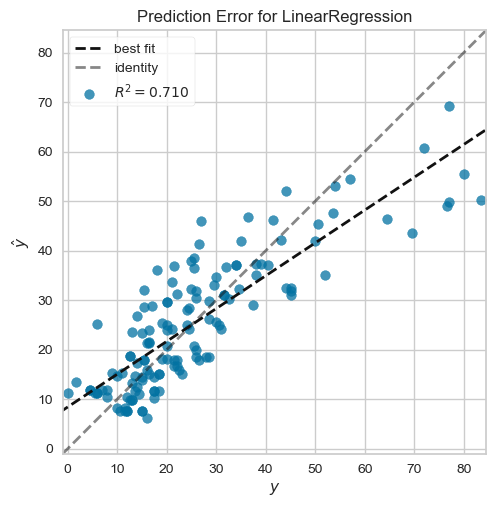

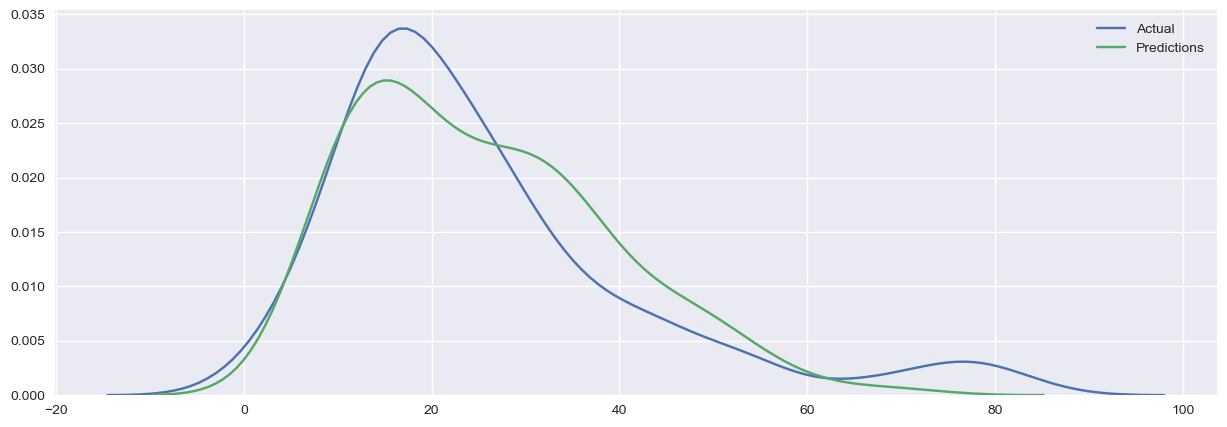

In [90]:
reg = LinearRegression() #Create regression model
performCrossVal(reg, df_80TrainXVal, df_80TrainYVal, 5)
displayModelStats(reg, df_80TrainXVal, df_80TrainYVal, df_80TestXVal, df_80TestYVal)

** Model Performance: ** 
We see that this model performs well, but is average. It has an R square value of 0.71 which is acceptable but not as high as we would want it to be. It's MSE value is 83 which again is again acceptable but not as low as we would want it.
The model in the cross validation phase with the training data predicted the values with a score of 0.57 and an error (variation in performance) of 0.22. 

#### b) Predicting Wage

Score: 0.49 (+/- 0.21) for model from k fold cross-validation
R-Squared Value for model (on testing data):  0.626261622462
MSE Value for model (on testing data):  2446.20651081


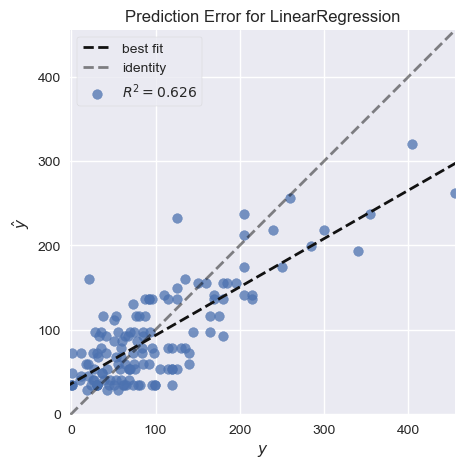

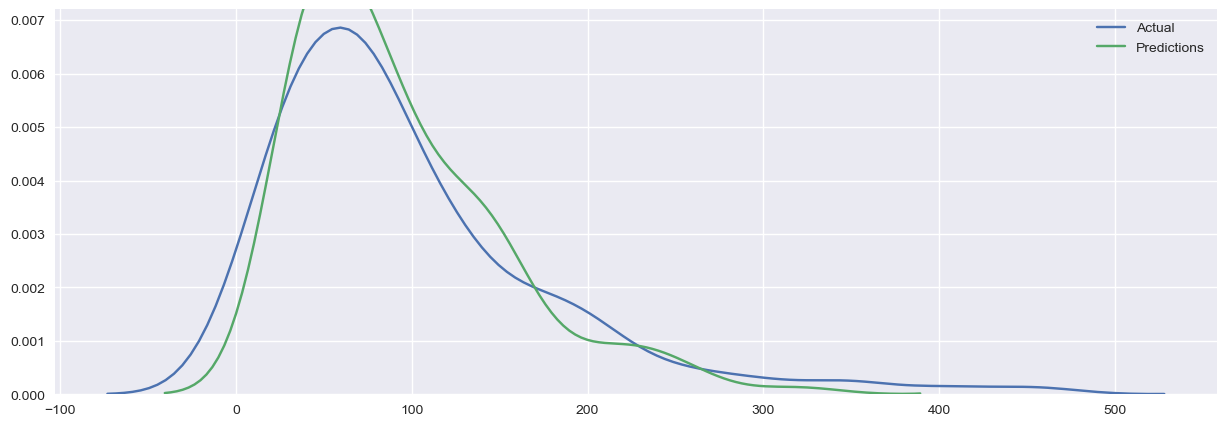

In [91]:
reg = LinearRegression() # Create regression model
performCrossVal(reg, df_80TrainXWage, df_80TrainYWage, 5)
displayModelStats(reg, df_80TrainXWage, df_80TrainYWage, df_80TestXWage, df_80TestYWage)

** Model Performance: **
This model does not perform well, it has an R square value of 62% which is not high and its MSE value is greater than 2000 which is extremely higher than what we would like it to be. The Prediction Error Graph and the performance graph hint towards this model not performing well as well as the error is very high and a lot of variance.
The model with cross validation predicted the values with a score of 0.49 and an error (variation in performance) of 0.21. 

## 6.2 Random Forest Regressor

#### a) Predicting Market Value

In [92]:
from sklearn.ensemble import RandomForestRegressor 

C:\Users\Paracha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Paracha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Paracha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Paracha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Paracha\Anaconda3\lib\site-packages\sklearn\ensemble\forest

Score: 0.76 (+/- 0.09) for model from k fold cross-validation
R-Squared Value for model (on testing data):  0.785305945329
MSE Value for model (on testing data):  61.9349045161


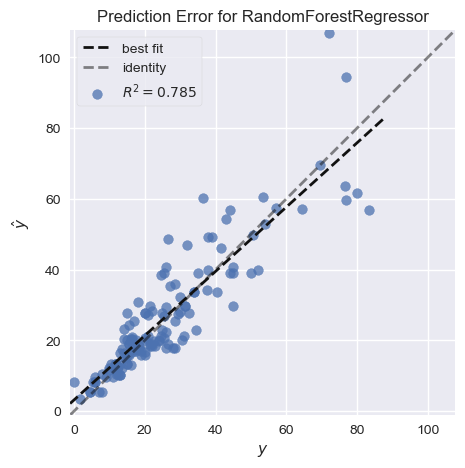

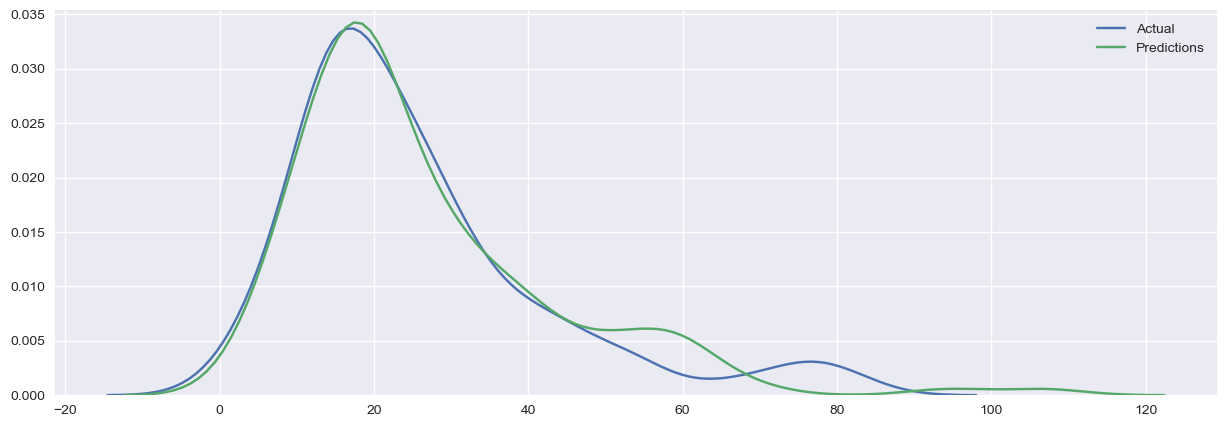

In [93]:
rfr = RandomForestRegressor()
performCrossVal(rfr, df_80TrainXVal, df_80TrainYVal, 5)
displayModelStats(rfr, df_80TrainXVal, df_80TrainYVal, df_80TestXVal, df_80TestYVal)

** Model Performance: ** 
The model performs well it has a high r squared value of 0.78 and a relatively low MSE value of 62, which suggests that the model has fit well. Also, we see in the Prediction Error graph that the model fits well for most values.
The model in the cross validation phase predicted the values with a score of 0.76 and an error (variation in performance) of 0.09. 

#### b) Predicting Wage

C:\Users\Paracha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Paracha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Paracha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Paracha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Paracha\Anaconda3\lib\site-packages\sklearn\ensemble\forest

Score: 0.48 (+/- 0.38) for model from k fold cross-validation
R-Squared Value for model (on testing data):  0.666345821263
MSE Value for model (on testing data):  2183.84590248


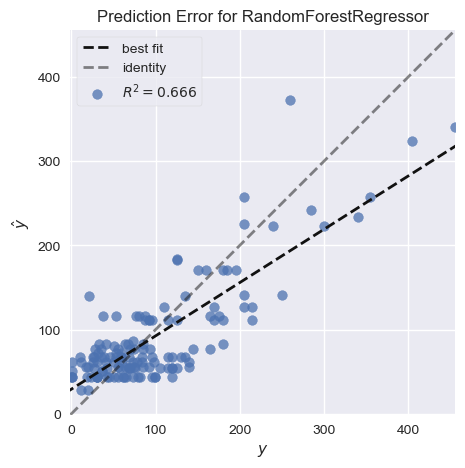

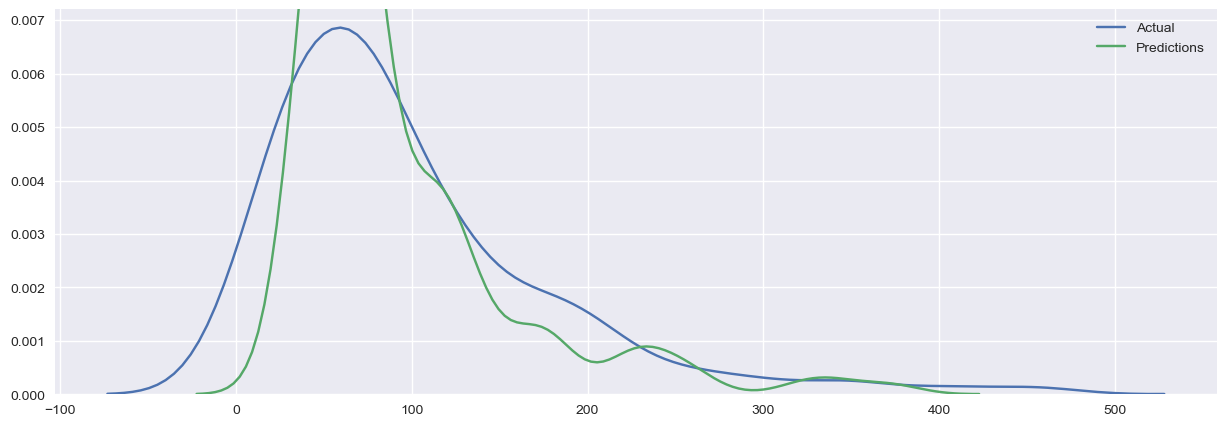

In [94]:
rfr = RandomForestRegressor()
performCrossVal(rfr, df_80TrainXWage, df_80TrainYWage, 5)
displayModelStats(rfr, df_80TrainXWage, df_80TrainYWage, df_80TestXWage, df_80TestYWage)

** Model Performance: ** 
This model did not perform as well, it has an R squared value of 66% and a very high MSE (greater than 2000). 
The model predicted the values with a score of 0.48 and an error (variation in performance) of 0.35. 

## 6.3 K-Nearest Neighbors

In [95]:
from sklearn.neighbors import KNeighborsRegressor

##### a) Predicting Market Value

Score: 0.79 (+/- 0.08) for model from k fold cross-validation
R-Squared Value for model (on testing data):  0.784447792727
MSE Value for model (on testing data):  62.1824642336


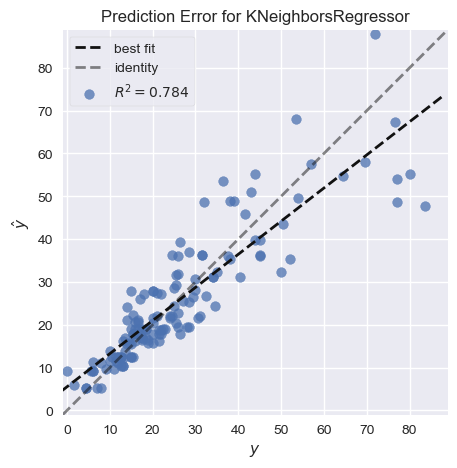

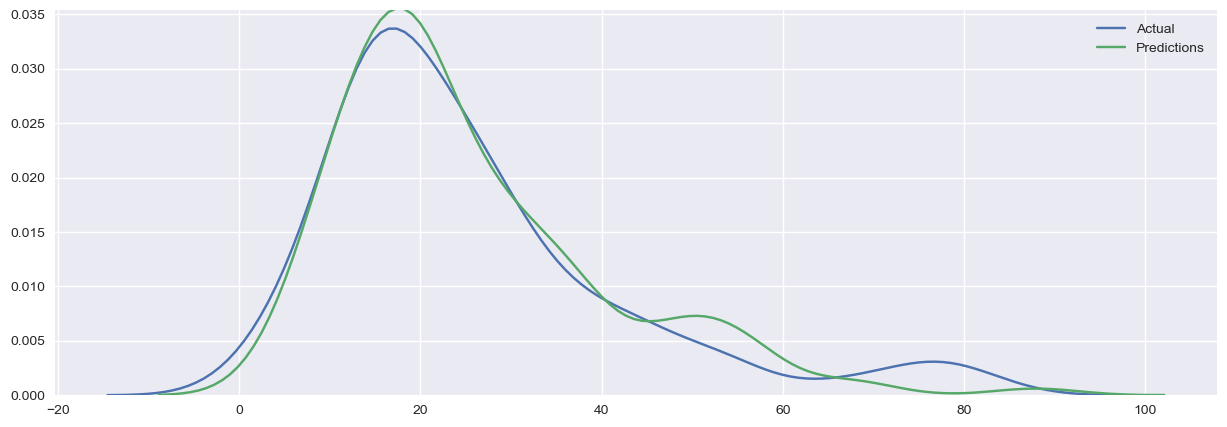

In [96]:
knn = KNeighborsRegressor(n_neighbors=5)
performCrossVal(knn, df_80TrainXVal, df_80TrainYVal, 5)
displayModelStats(knn, df_80TrainXVal, df_80TrainYVal, df_80TestXVal, df_80TestYVal)

    
** Model Performance: ** This model performed well, it has a R squared value of 78% and a low MSE of 62.      
 The model predicted the values with a score of 0.79 and an error (variation in performance) of 0.08. 

##### b) Predicting Wage

Score: 0.44 (+/- 0.36) for model from k fold cross-validation
R-Squared Value for model (on testing data):  0.589839991132
MSE Value for model (on testing data):  2684.59474453


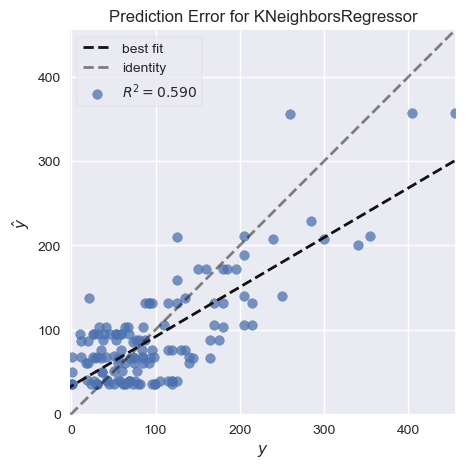

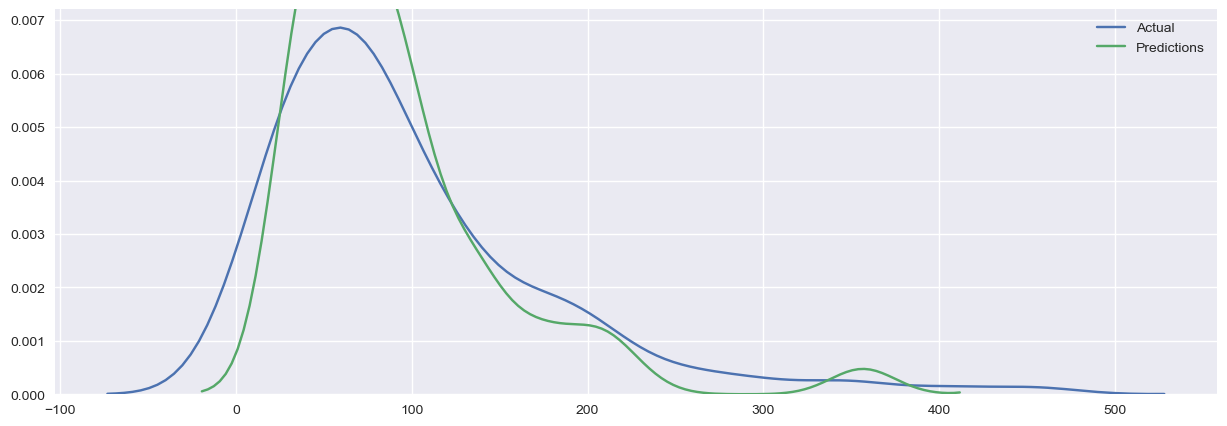

In [97]:
knn = KNeighborsRegressor(n_neighbors=5)
performCrossVal(knn, df_80TrainXWage, df_80TrainYWage, 5)
displayModelStats(knn, df_80TrainXWage, df_80TrainYWage, df_80TestXWage, df_80TestYWage)

** Model Performance: ** The model predicted the values with a score of 0.44 and an error (variation in performance) of 0.36 in the cross validation phase. It has an R squared value of 0.59 (not as high as we would like it to be) and a very high MSE of 2684. 

## 6.4 Decision Tree

In [98]:
from sklearn.tree import DecisionTreeRegressor

#### a) Predicting Market Value

Score: 0.68 (+/- 0.06) for model from k fold cross-validation
R-Squared Value for model (on testing data):  0.642218557334
MSE Value for model (on testing data):  103.212729962


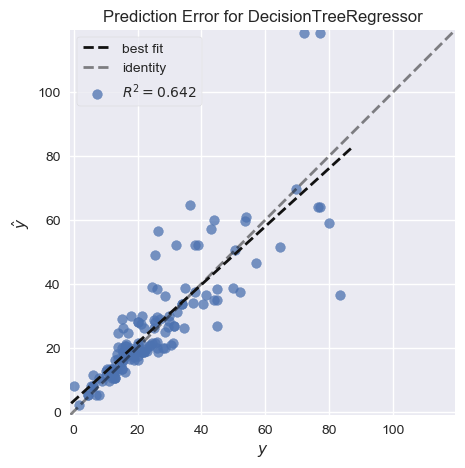

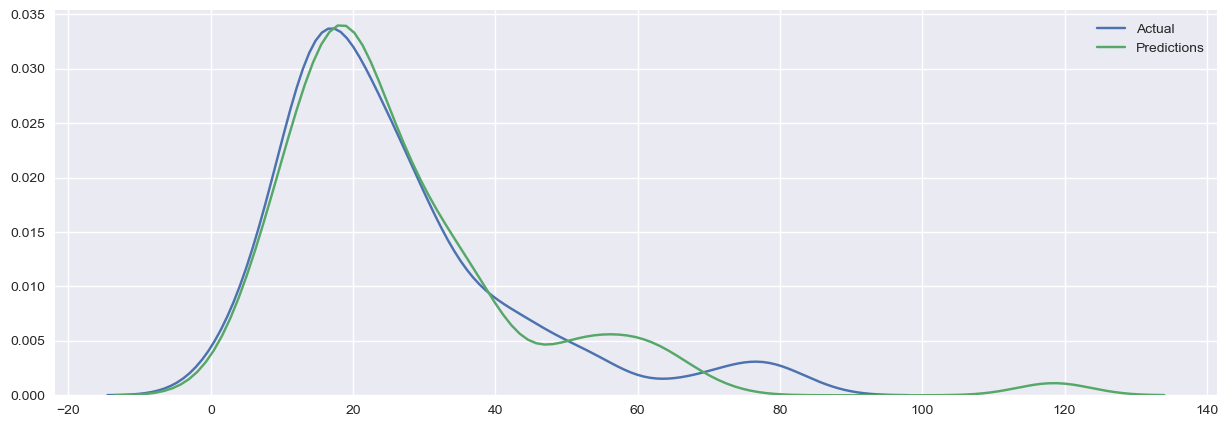

In [99]:
dt = DecisionTreeRegressor()
performCrossVal(dt, df_80TrainXVal, df_80TrainYVal, 5)
displayModelStats(dt, df_80TrainXVal, df_80TrainYVal, df_80TestXVal, df_80TestYVal)

** Model Performance: ** 
Model performance is mediocre, it has a r squared of 0.64 and an MSE of 103.  
The model predicted the values with a score of 0.69 and an error (variation in performance) of 0.08 in cross validation. 

##### b) Predicting Wage

Score: 0.49 (+/- 0.37) for model from k fold cross-validation
R-Squared Value for model (on testing data):  0.653684018042
MSE Value for model (on testing data):  2266.720414


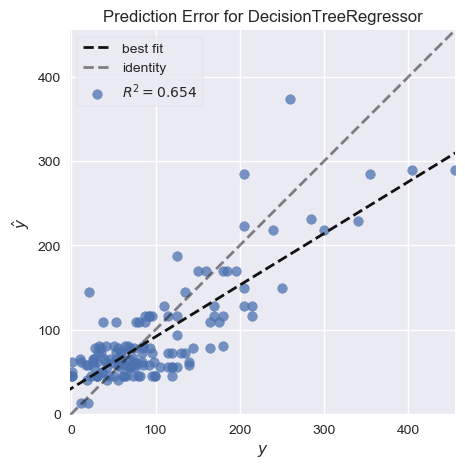

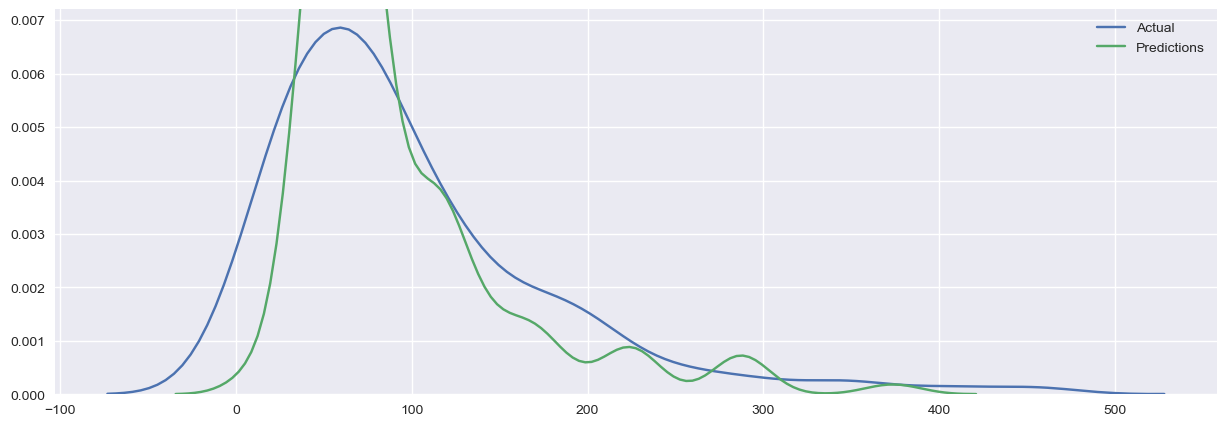

In [100]:
dt = DecisionTreeRegressor()
performCrossVal(dt, df_80TrainXWage, df_80TrainYWage, 5)
displayModelStats(dt, df_80TrainXWage, df_80TrainYWage, df_80TestXWage, df_80TestYWage)

** Model Performace: **
Model performance is mediocre, it has a relatively high MSE (2266) and an okay R squared value (0.65%)
The model predicted the values with a score of 0.49 and an error (variation in performance) of 0.37 in corss validation. 

## 6.5 Best Models

The best model to predict Market Value (based off of Age and Potential) was our KNN model. It has a high R Squared value of 0.78 and a low MSE of 62 (Random Forest was a close second, but I chose the KNN model because it performed better during the cross validation phase. Note that there is no right answer here the performance of both models is similar and picking Random Forest would by no means be a bad choice). 

None of the models we fitted do a particularly good job of predicting the wage of players (based off of Overall and International Reputation), however, out of the ones we fitted the best one was the Random Forest Regressor as it had an R squared value of 0.65 and a relatively low MSE of 2183 (which was better than our decison tree models' 2266 even though it had a very similar R-squared value). 

We can tune the hyperparaneters of both models using techniques like [grid search]() to get better results. This I will not do in this tutorial due to time and computational constraints.

## 7. Summary and Conclusion

We started this tutorial by pre processing the data, we changed string formats, we removed outliers and looked at the distribution of the data. We then moved onto performing EDA where looked at the distribution of stats like Free Kick Accuracy, Skill Moves and Passing Ability for each position and the top 10 clubs and nations in the world. We also looked at how market value and wage changed based off of Overall for different ages, positions and clubs. In the last portion of the tutorial we looked at the correlation among our variables and performed machine learning. We fitted multiple models to predict Overall and Wage based off important features that effected them. We fit a really good model for predicting Overall but were not able to do so for Wage, hence the Best model we fit for Wage (RandomForestRegressor) needs to be tuned. 

For the conclusive bit here are some of the conclusions we reach from our EDA (this list is not exhaustive of all the conclusions):
1. Attackers are the most skilled players (in terms of skill moves)
2. Brazil has the most amount of skillful players (in terms of skill moves)
3. Midifielders have the highest FKAccuracy and hence are the best fk takers
4. Barcelona has the best free kick taking ability and their top 5 free kick takers have a higher average than any other team.
5. Spain is the nation with the best passing ability and Barcelona is the team with the best pasing ability
6. England and Brazil are the fastest international sides in world football.
7. BVB has the abilit to be the fastest club in the world.
8. Strikers are paid more on average than midfielders and defenders of the same age and overall

Lastly, we can now accurately predict a player's market value given their potential and age and we can also get a good sense of what their wage should be. Using the same techniques above we can also fit models to predict other stats that have a correlation among them. For example we can predict which position a player would best be suited for given all of their stats. Furthermore, several other models and techniques exist that we can try out to get better models. 

This tutorial is a good way for people who do not follow football (soccer) that closely to learn how different stats effect a players overall and their market value. The EDA/Data Viz part above can also give people a good idea of how different statistics differ by different groupings and different features.

And that concludes our tutorial! Thank you for reading, I hope you enjoyed it. Any feedback, positive or negative, is welcome.